In [1]:
library(rdmc)
library(tidyverse)
library(ape)
theme_set(cowplot::theme_cowplot(15))
library(patchwork)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

source("../color_df.R")
color_df <-
    color_df %>% 
    mutate(
        ssp_pop = pop,
        pop = str_remove_all(ssp_pop, "(LR_|Teo_|random1_|random2_)")
    ) %>% 
    dplyr::select(-ssp_pop) %>% 
    distinct()
color_df

Loading required package: MASS

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: purrr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: rlang


Attaching package: ‘rlang’


The following object is masked from ‘package:magrittr’:

    set_names


The following objects are masked from ‘package:purrr’:

    %@%, as_function, flatten, flatten_chr, flatten_dbl, flatten_int,
    flatten_lgl, flatten_raw, invoke, list_along, modify, prepend,
    splice


── Attaching packages ───────────────────────────────

pop               color           
1 Los_Guajes        mediumaquamarine
2 Crucero_Lagunitas gold            
3 El_Rodeo          darkorange      
4 Amatlan_de_Canas  cornflowerblue  
5 San_Lorenzo       purple          
6 Palmar_Chico      violetred       
7 random            grey

In [2]:
plot_rdmc <- function(file, cle_low = -10){
    
    sweep_file <- vroom::vroom(file, delim = "\t")
    
    stopifnot(nrow(sweep_file) > 0)
    all_mods <- 
        sweep_file  %>%  
        filter(!is.na(cle), !is.na(neut_cle)) %>%  
        group_by(model) %>% 
        mutate(mcle = max(cle, na.rm = T) - neut_cle)
  
    best_mcle <- all_mods %>%
      group_by(model) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      ungroup()  %>%
      arrange(desc(mcle))

    (best_mod <- best_mcle %>% slice(1) %>% pull(model))

    
    pos_plot <- all_mods %>%
      group_by(selected_sites, model) %>%
      filter(model == best_mod) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      filter(mcle > cle_low) %>%   
      ggplot(aes(selected_sites, mcle, colour = model)) +
      geom_line() +
      geom_point() +
      geom_hline(yintercept = 0, lty = 2) +  
      xlab("Position") +
      ylab("Composite likelihood") +
      scale_color_brewer(palette = "Set1")


    #visualize likelihood surface wrt selection coefficients
    sel_plot <- all_mods %>%
      group_by(sels, model) %>%
      filter(model == best_mod) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      filter(mcle > cle_low) %>%   
      ggplot(aes(log10(sels), mcle, colour = model)) +
      geom_line() +
      geom_point() +
      ylab("Composite likelihood") +
      xlab("Selection coefficient") +
      scale_color_brewer(palette = "Set1") 

    if (best_mod == "standing"){

        #visualize likelihood surface wrt age
        a  <- all_mods %>%
          group_by(times, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(log10(times), mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Age") +
          scale_color_brewer(palette = "Set1") 


        #visualize likelihood surface wrt age
        b <- all_mods %>%
          group_by(gs, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(gs, mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Initial allele frequency") +
          scale_color_brewer(palette = "Set1") 

        pos_plot + sel_plot + (a | b) + plot_layout(nrow = 3)

    } else if(best_mod == "migration"){
        
         a  <- all_mods %>%
          group_by(migs, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(log10(migs), mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Migration rate") +
          scale_color_brewer(palette = "Set1") 

        b  <- all_mods %>%
          group_by(sources, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(factor(sources), mcle, colour = model)) +
          geom_point(size = 3) +
          ylab("Composite likelihood") +
          xlab("Source pop") +
          scale_color_brewer(palette = "Set1") 

        pos_plot + sel_plot + (a | b) + plot_layout(nrow = 3)

    }

}

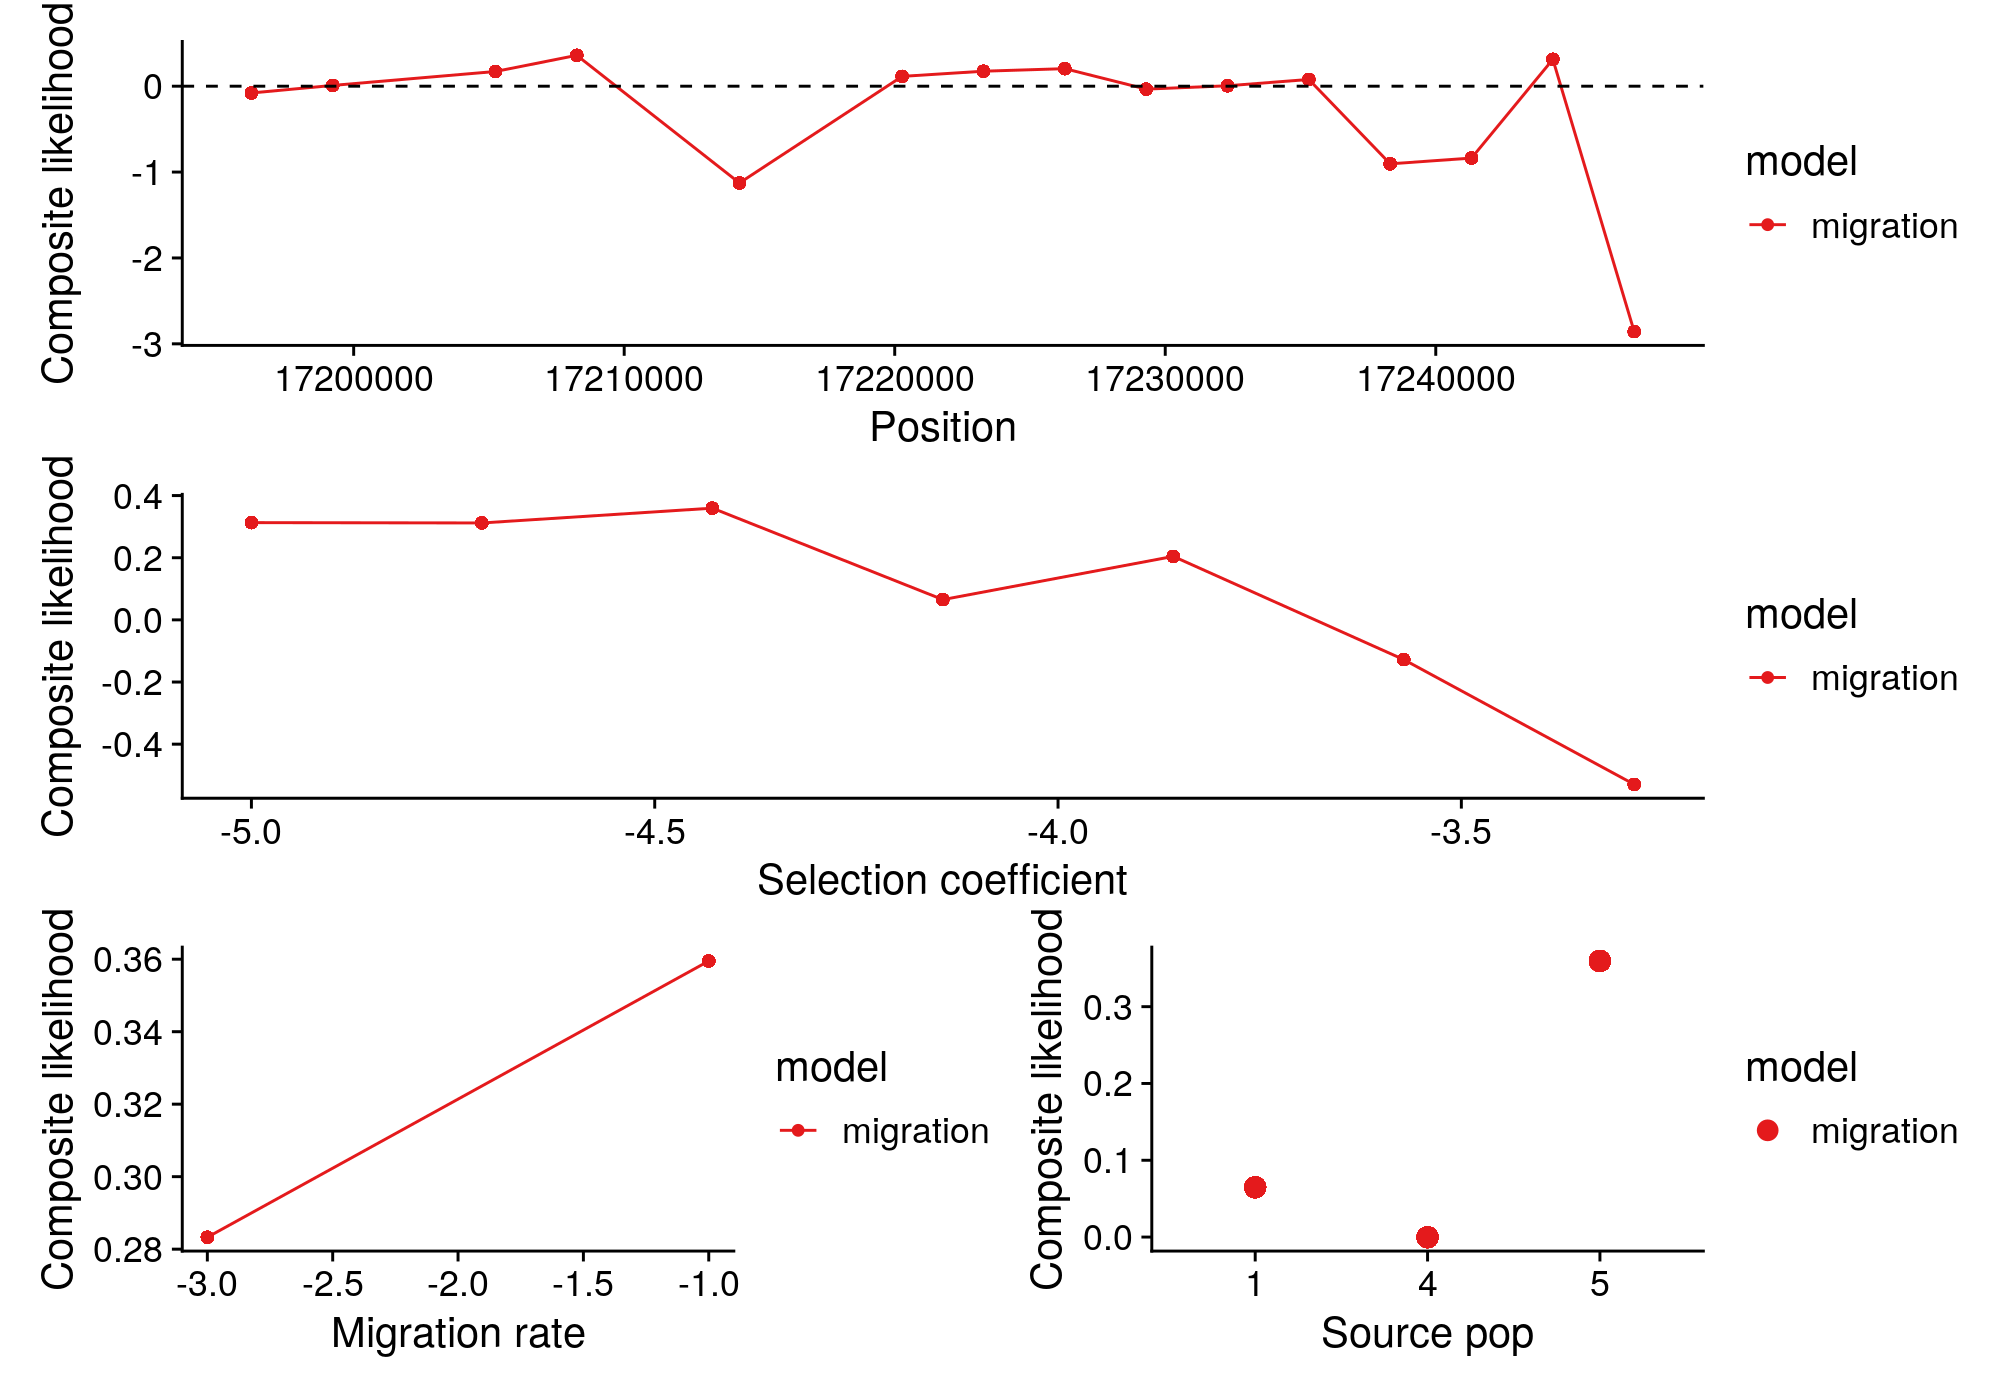

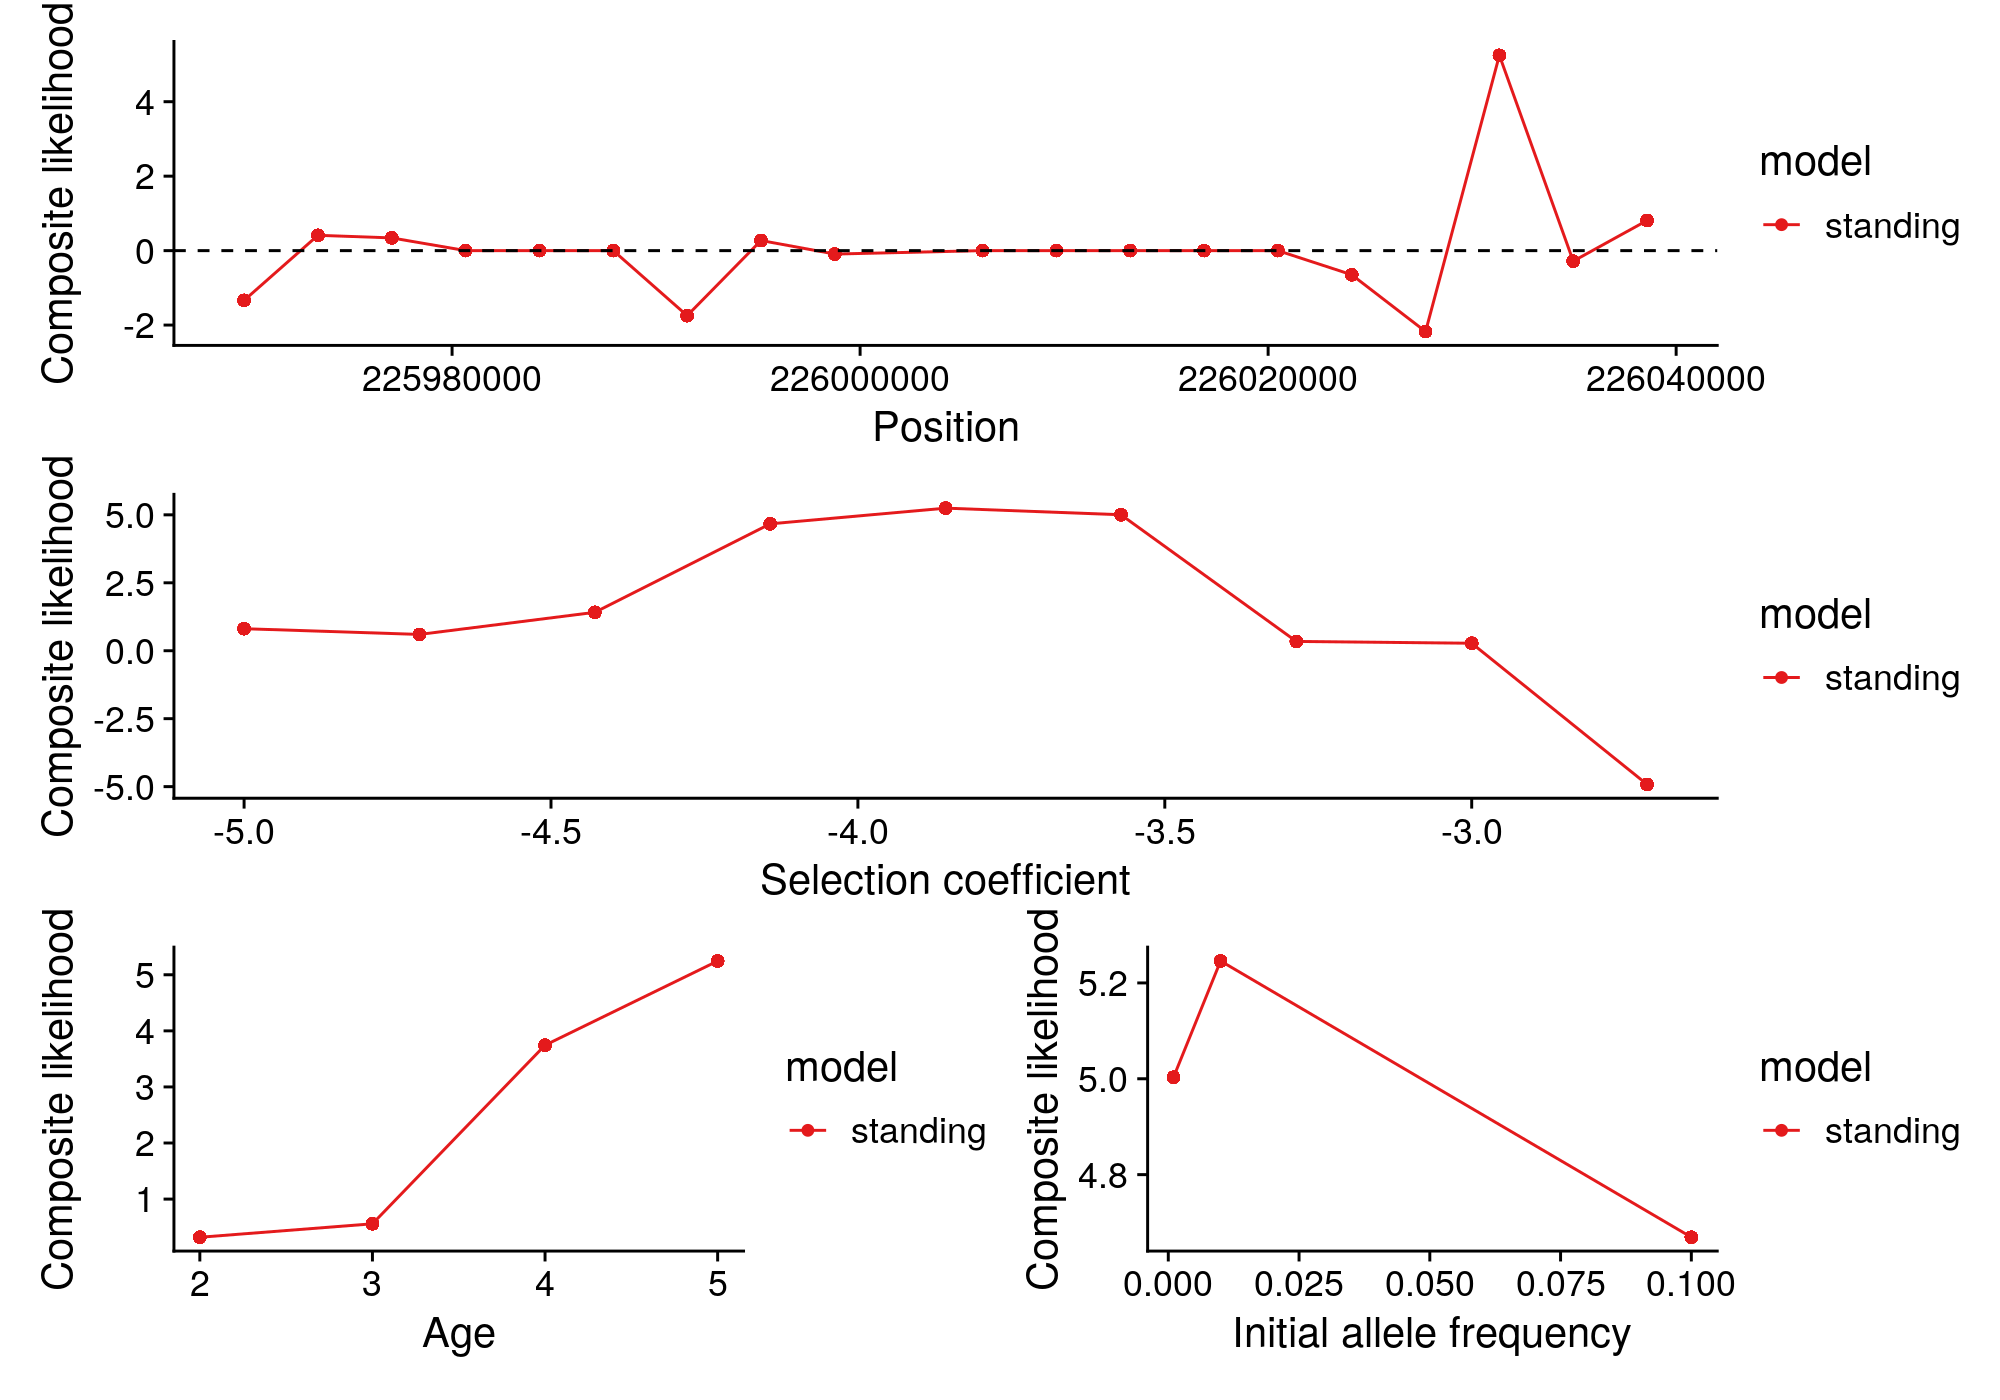

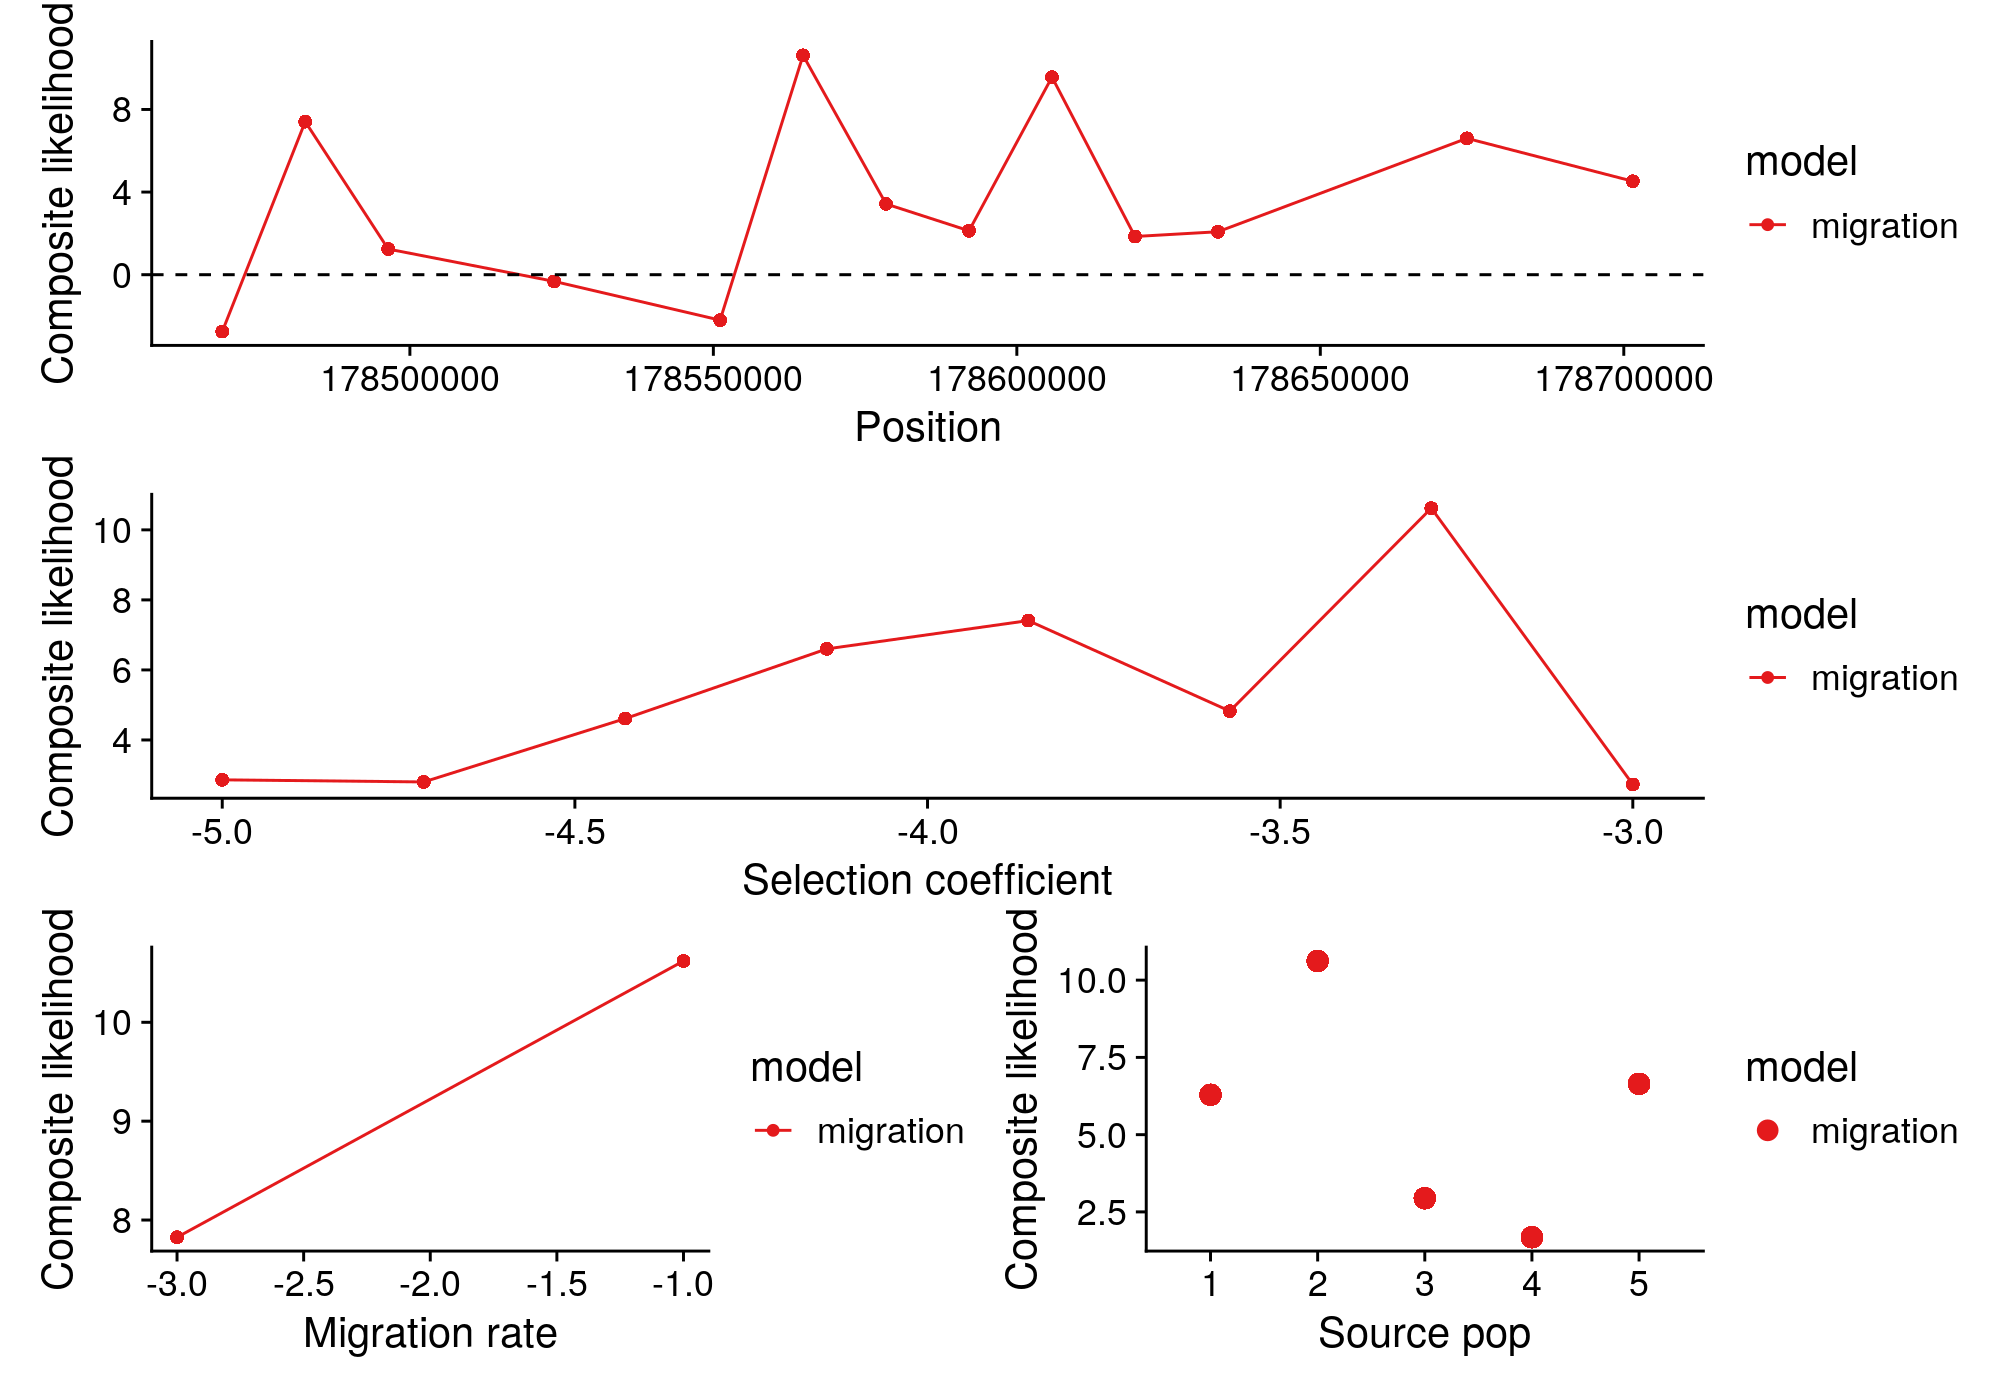

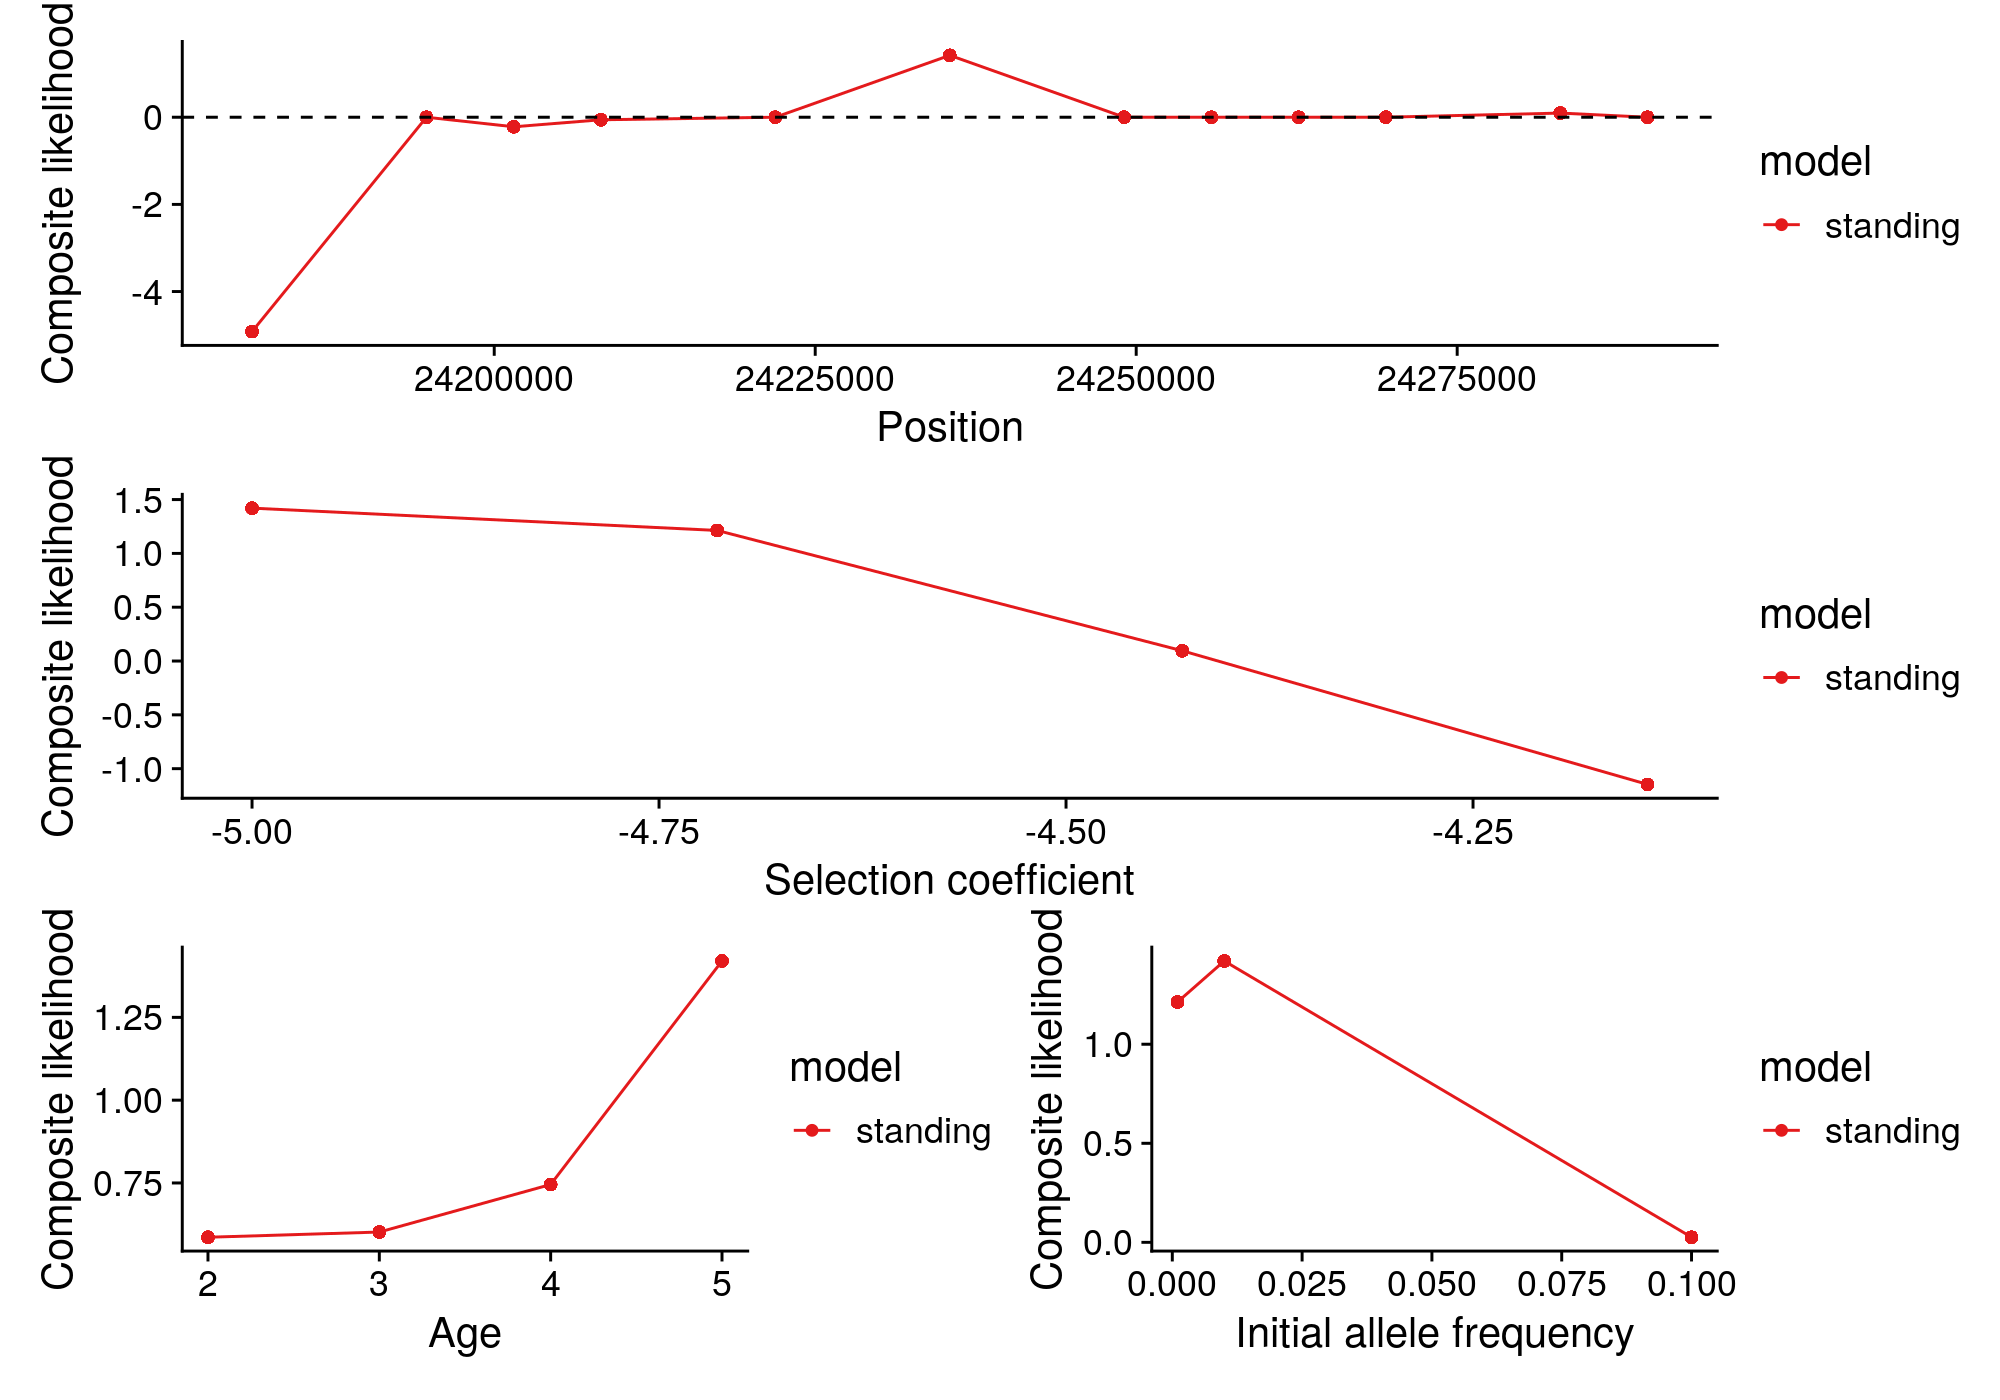

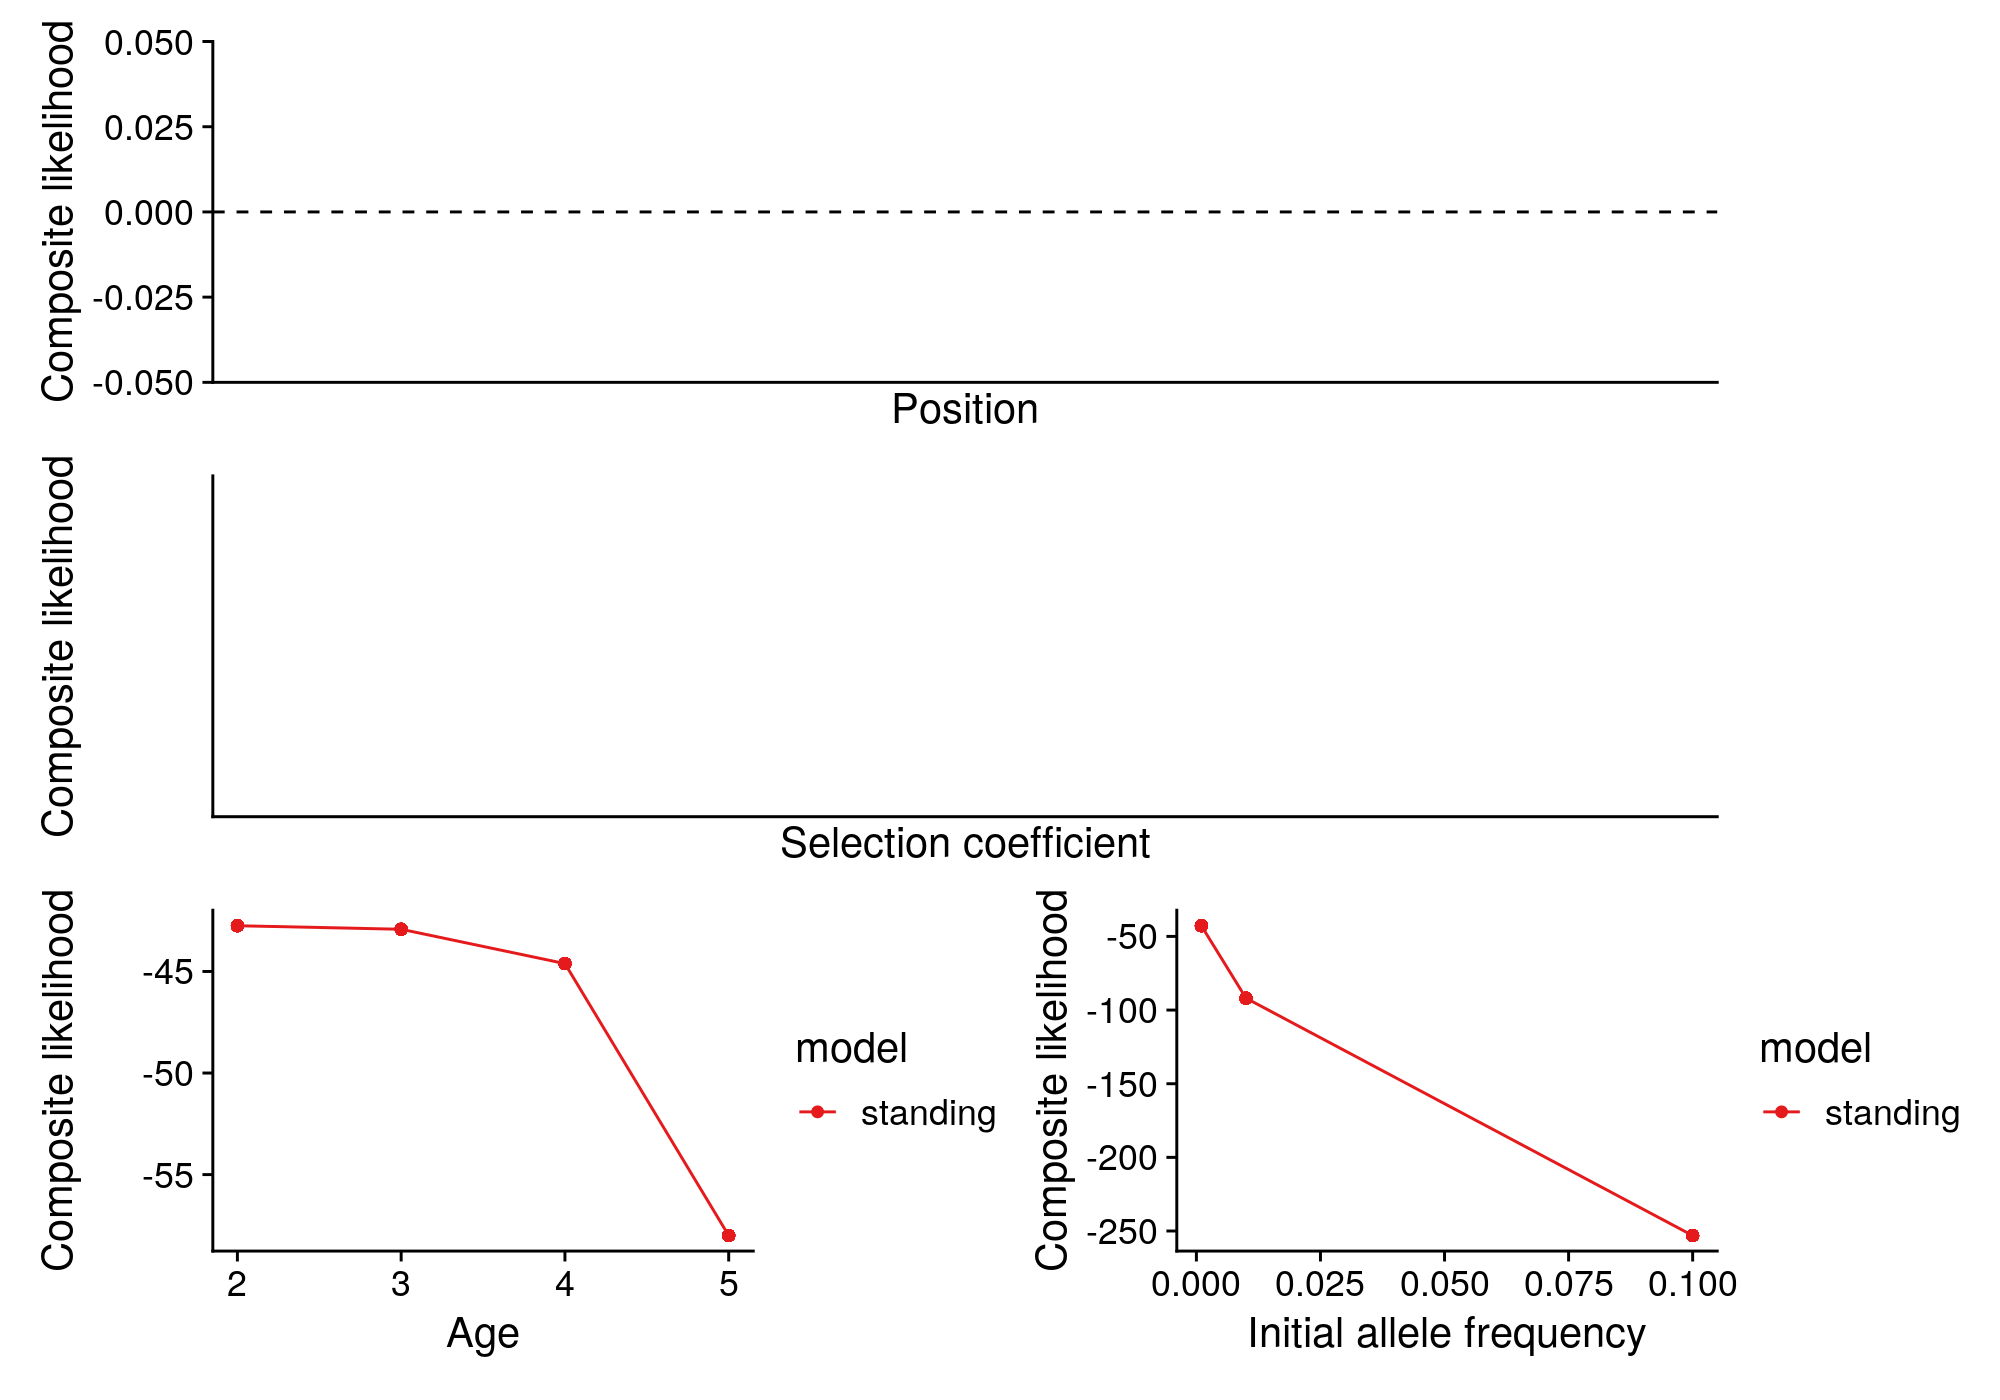

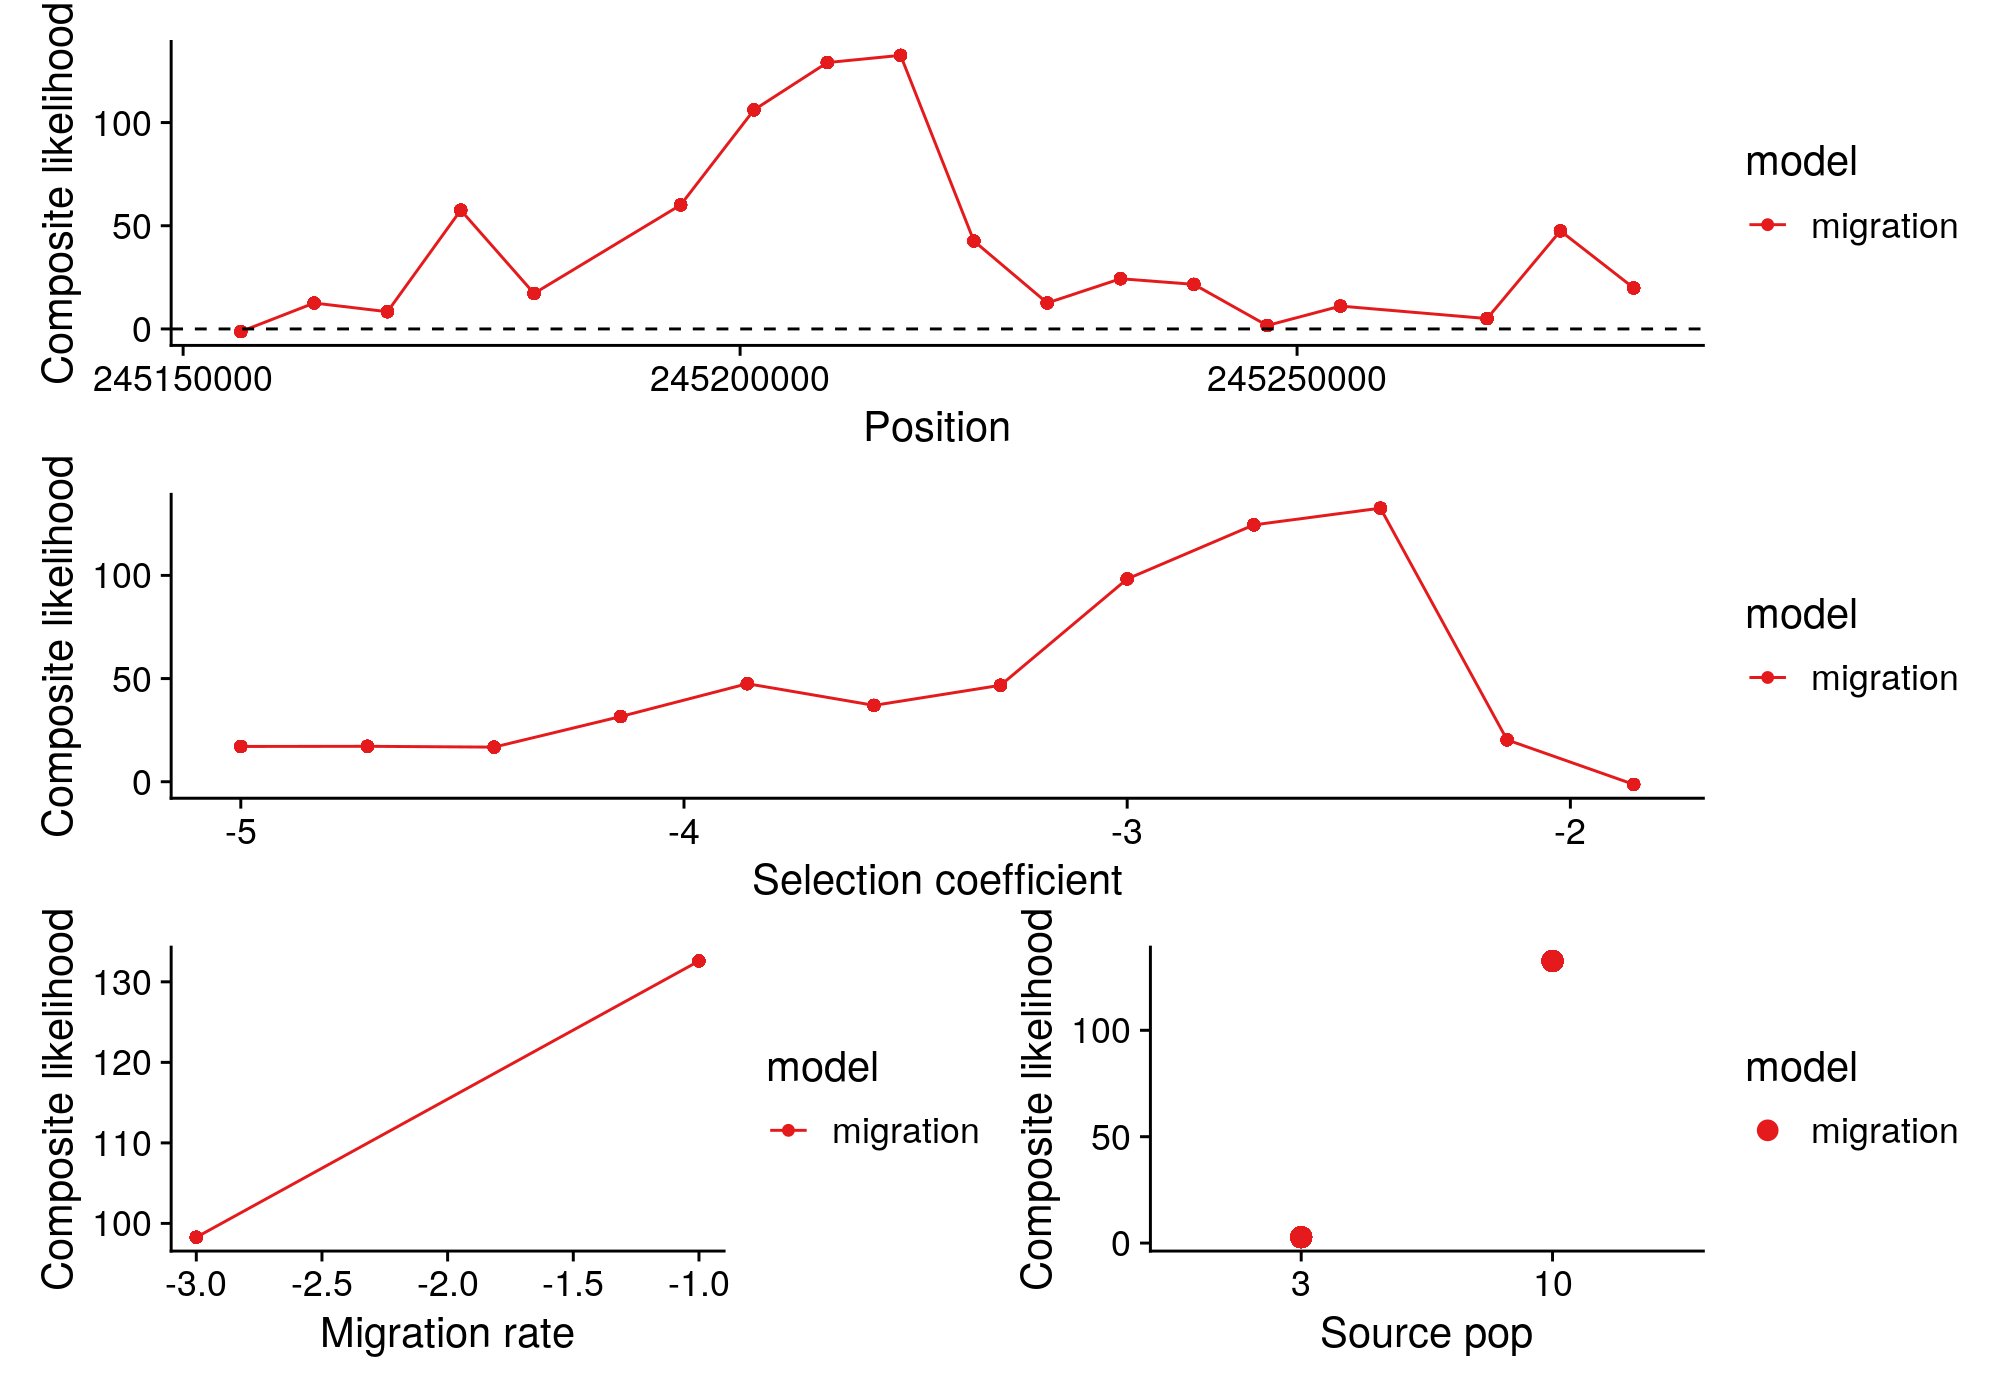

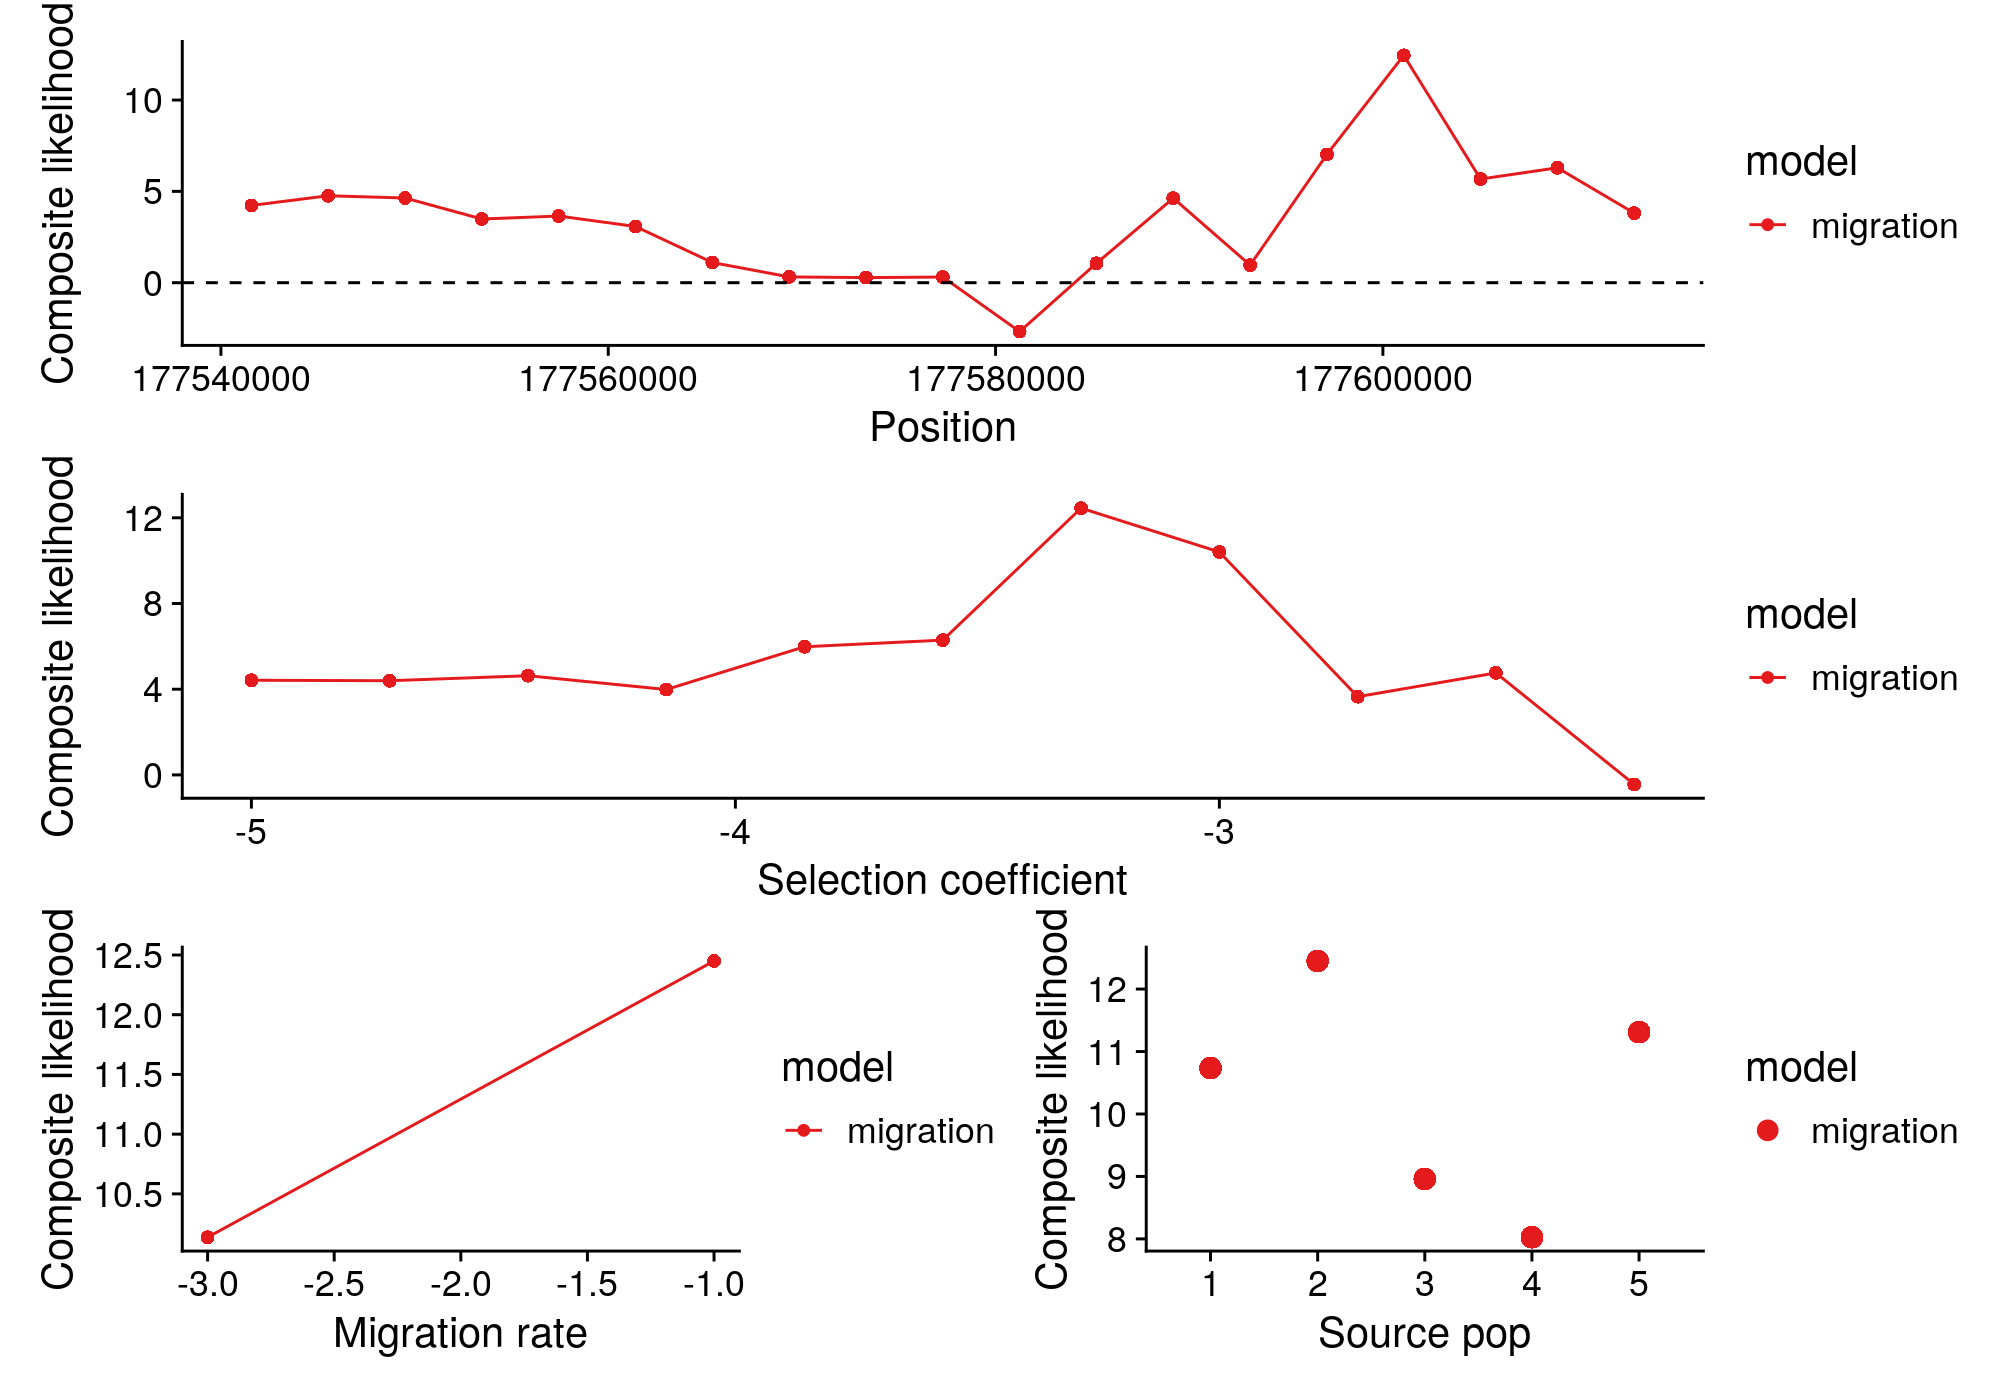

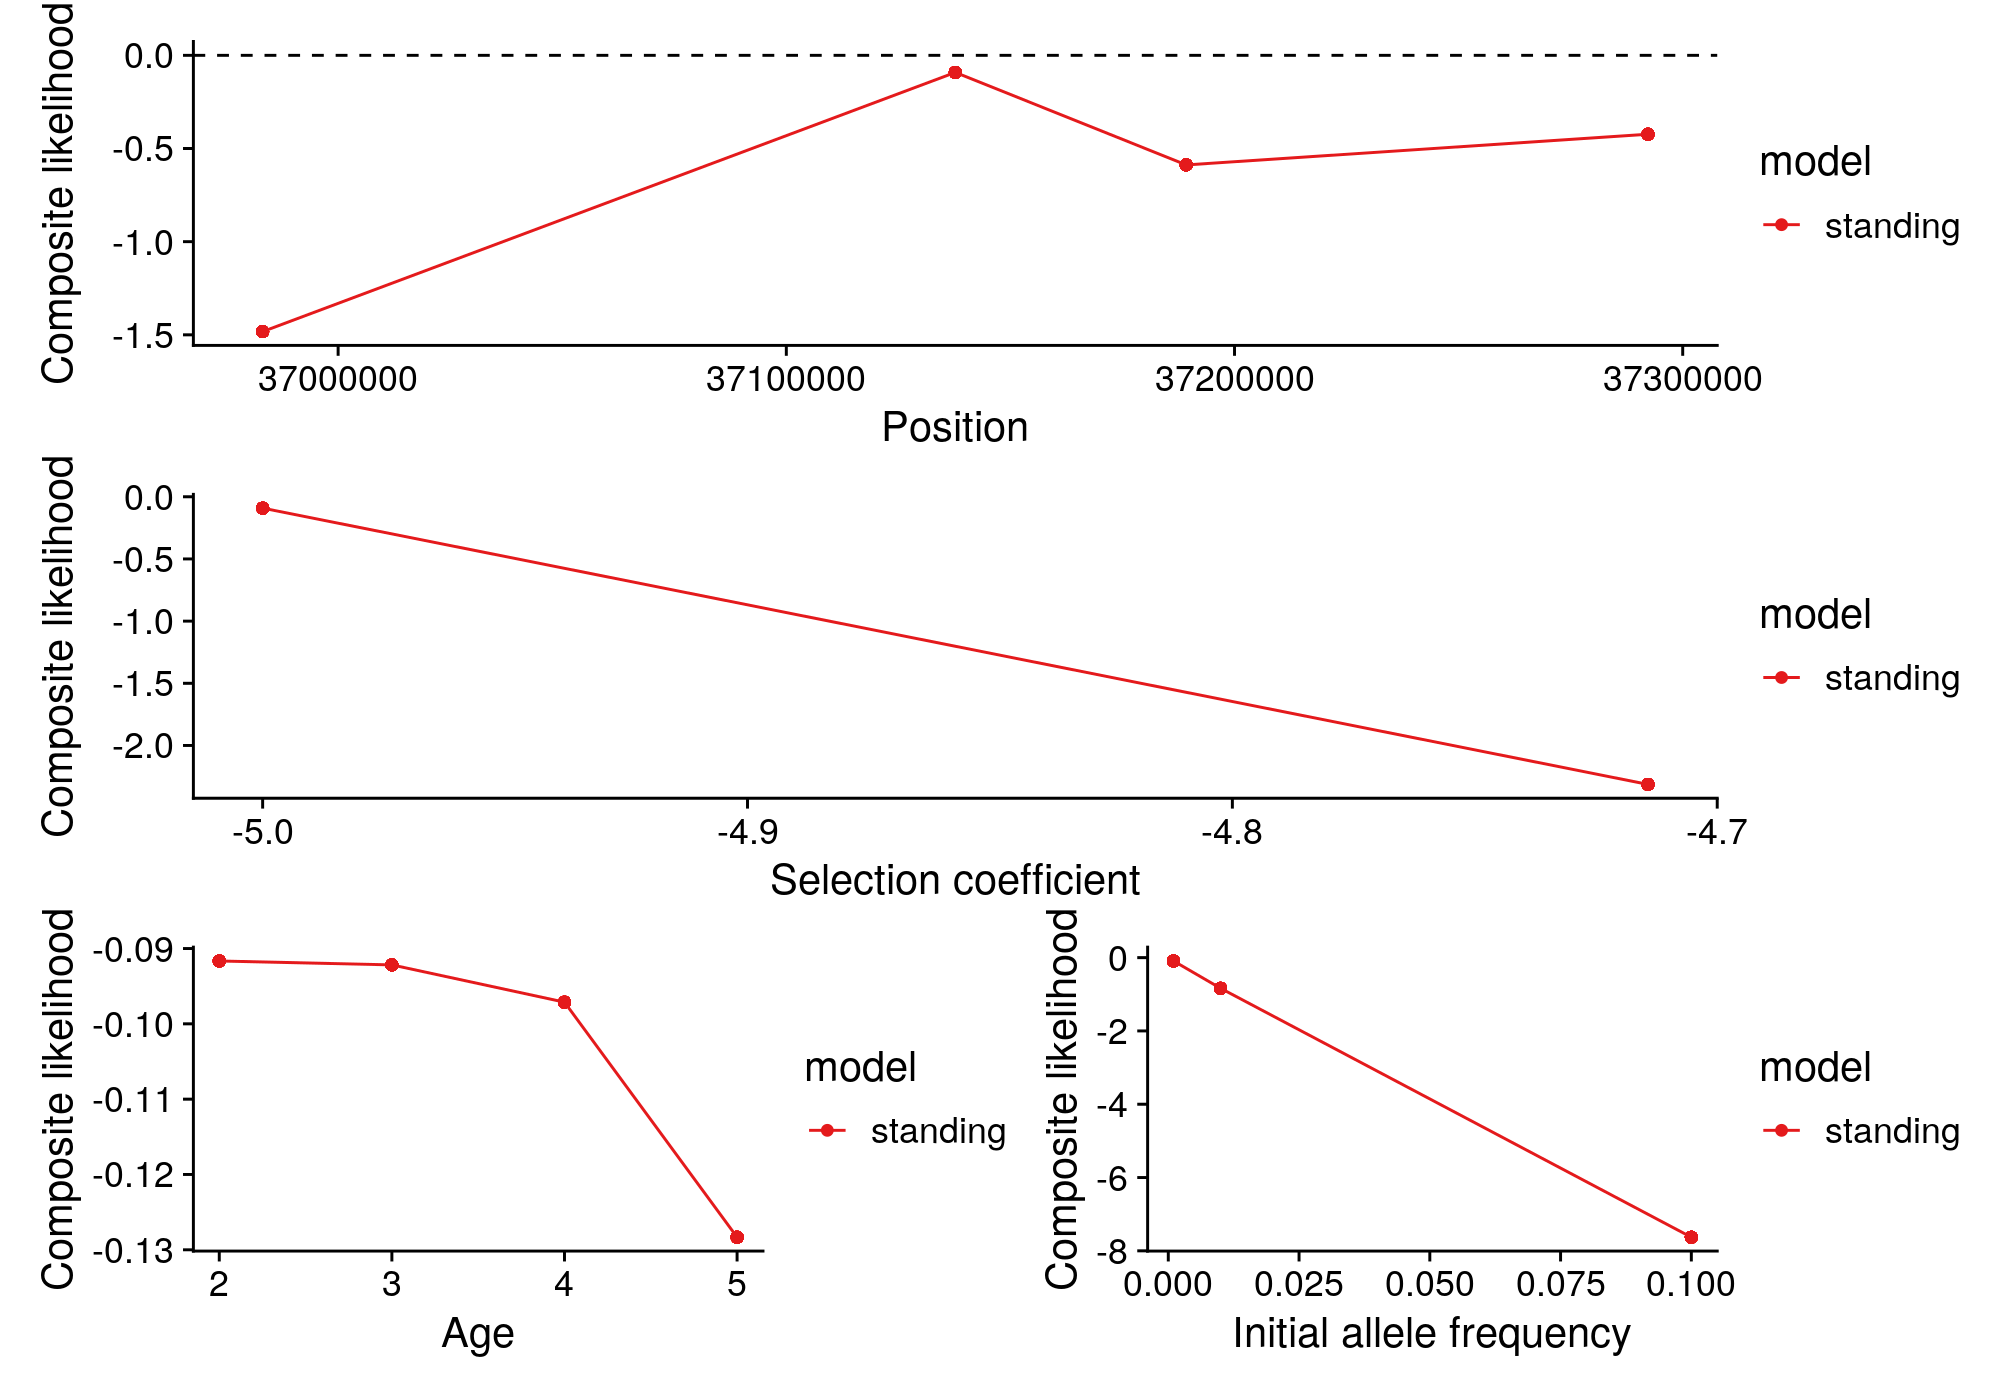

$`../data/rdmc/fitted/v5--sweep_chr2--0--243675191_start17193207_end17250825_pops1-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr5--0--226353449_start225969203_end226038663_pops9-10.txt`

$`../data/rdmc/fitted/v5--sweep_chr5--0--226353449_start178445072_end178721068_pops1-2-3-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr3--0--238017767_start24173175_end24310387_pops9-10.txt`

$`../data/rdmc/fitted/v5--sweep_chr3--0--238017767_start105400493_end105486189_pops3-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr4--0--250330460_start245154300_end245280298_pops3-10.txt`

$`../data/rdmc/fitted/v5--sweep_chr4--0--250330460_start177514007_end177623052_pops1-2-3-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr7--0--185808916_start36519516_end37499434_pops1-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr5--0--226353449_start130306677_end130442314_pops1-2-3-4-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr4--0--250330460_start41610465_end42192462_pops2-3-4.txt`


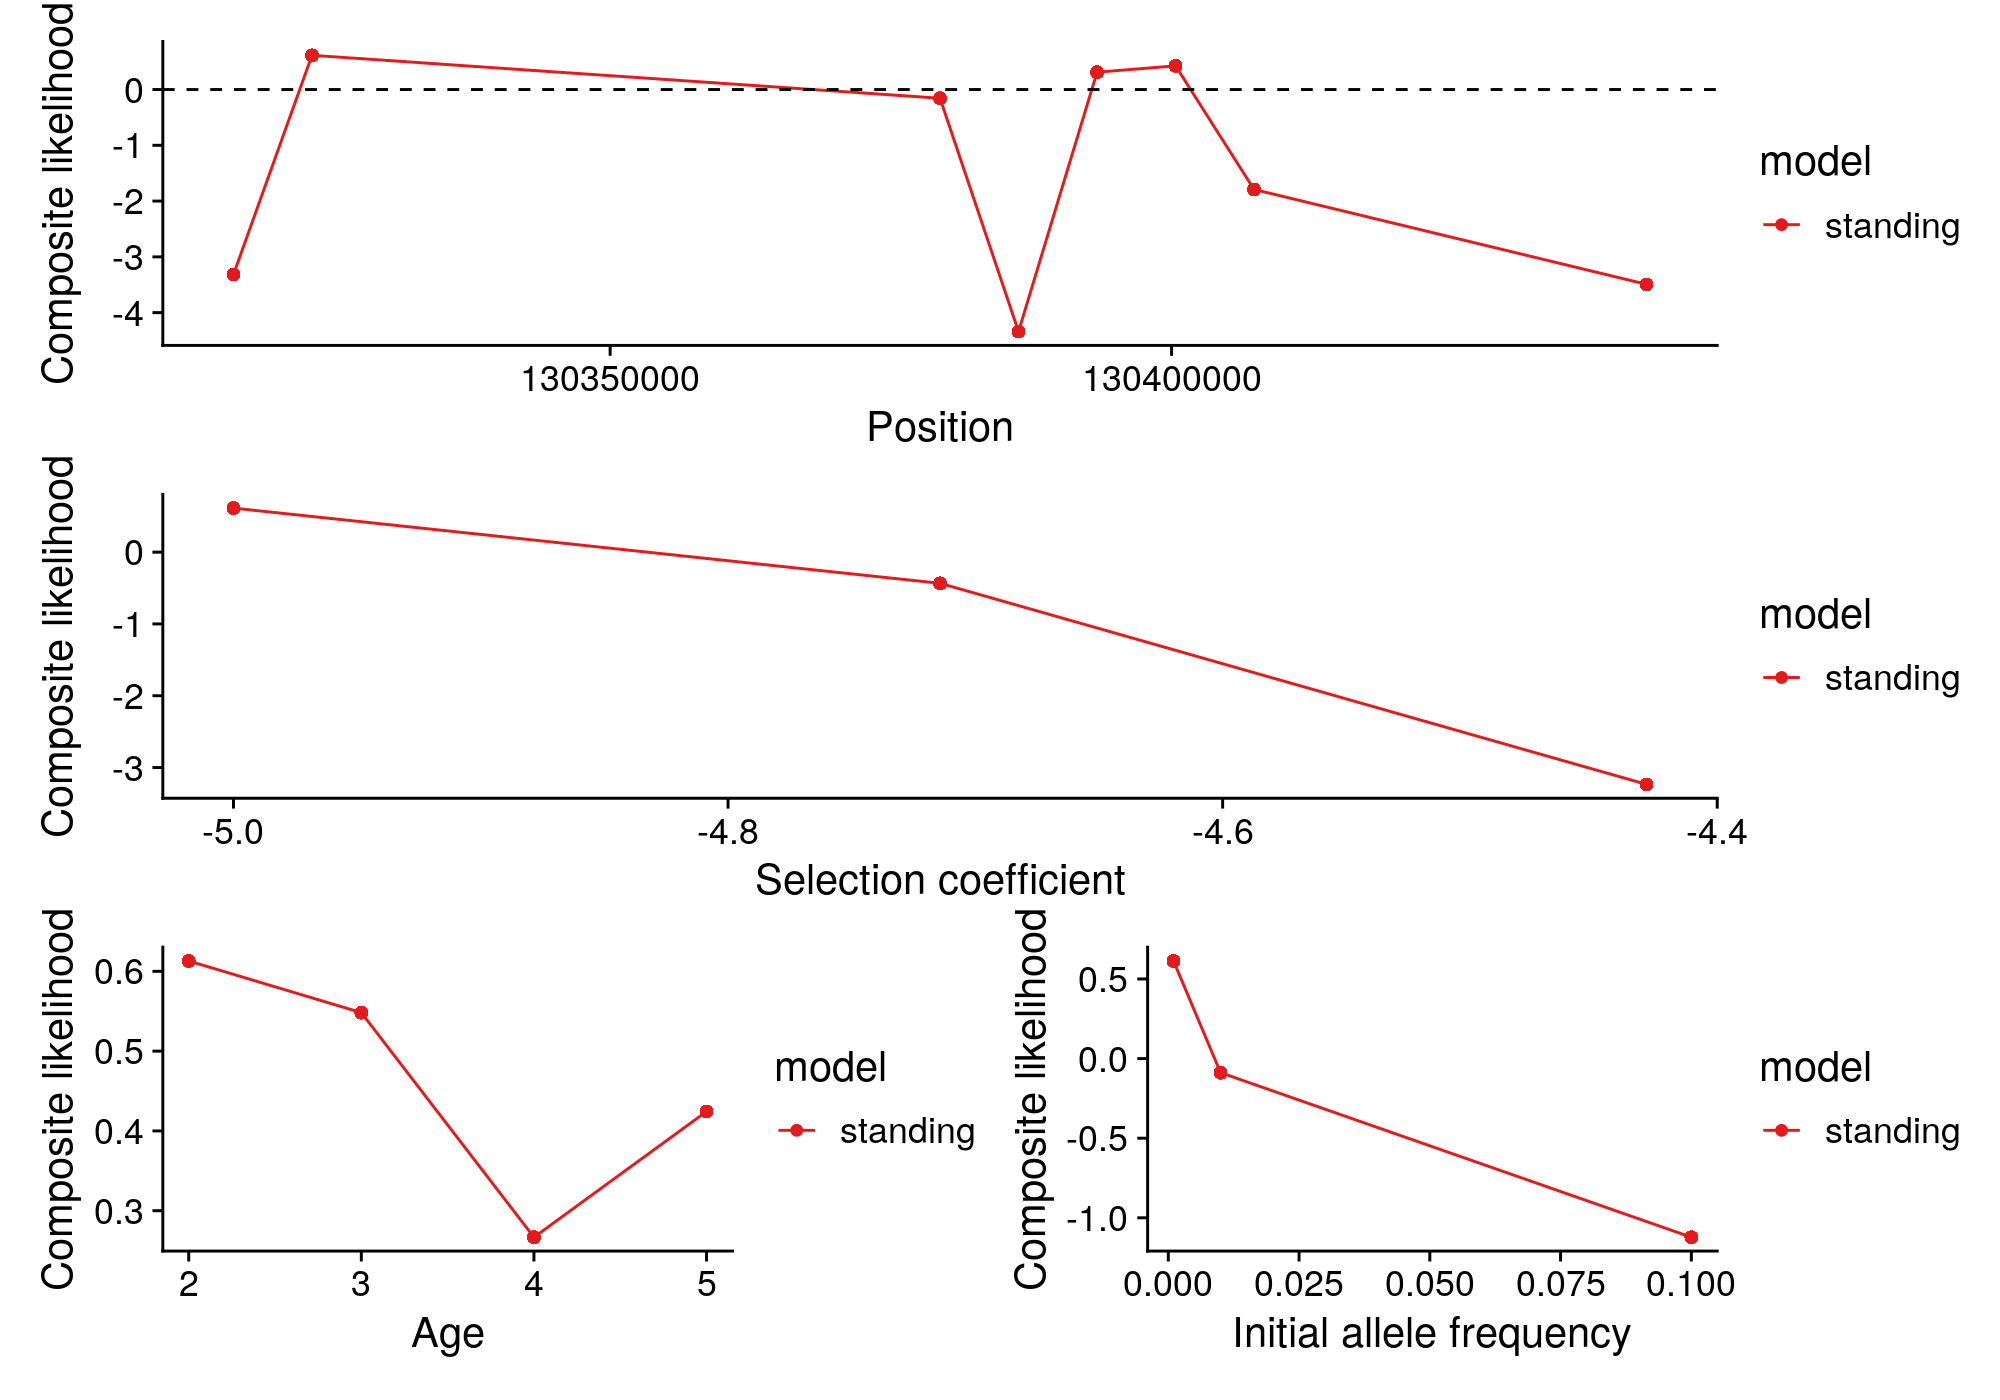

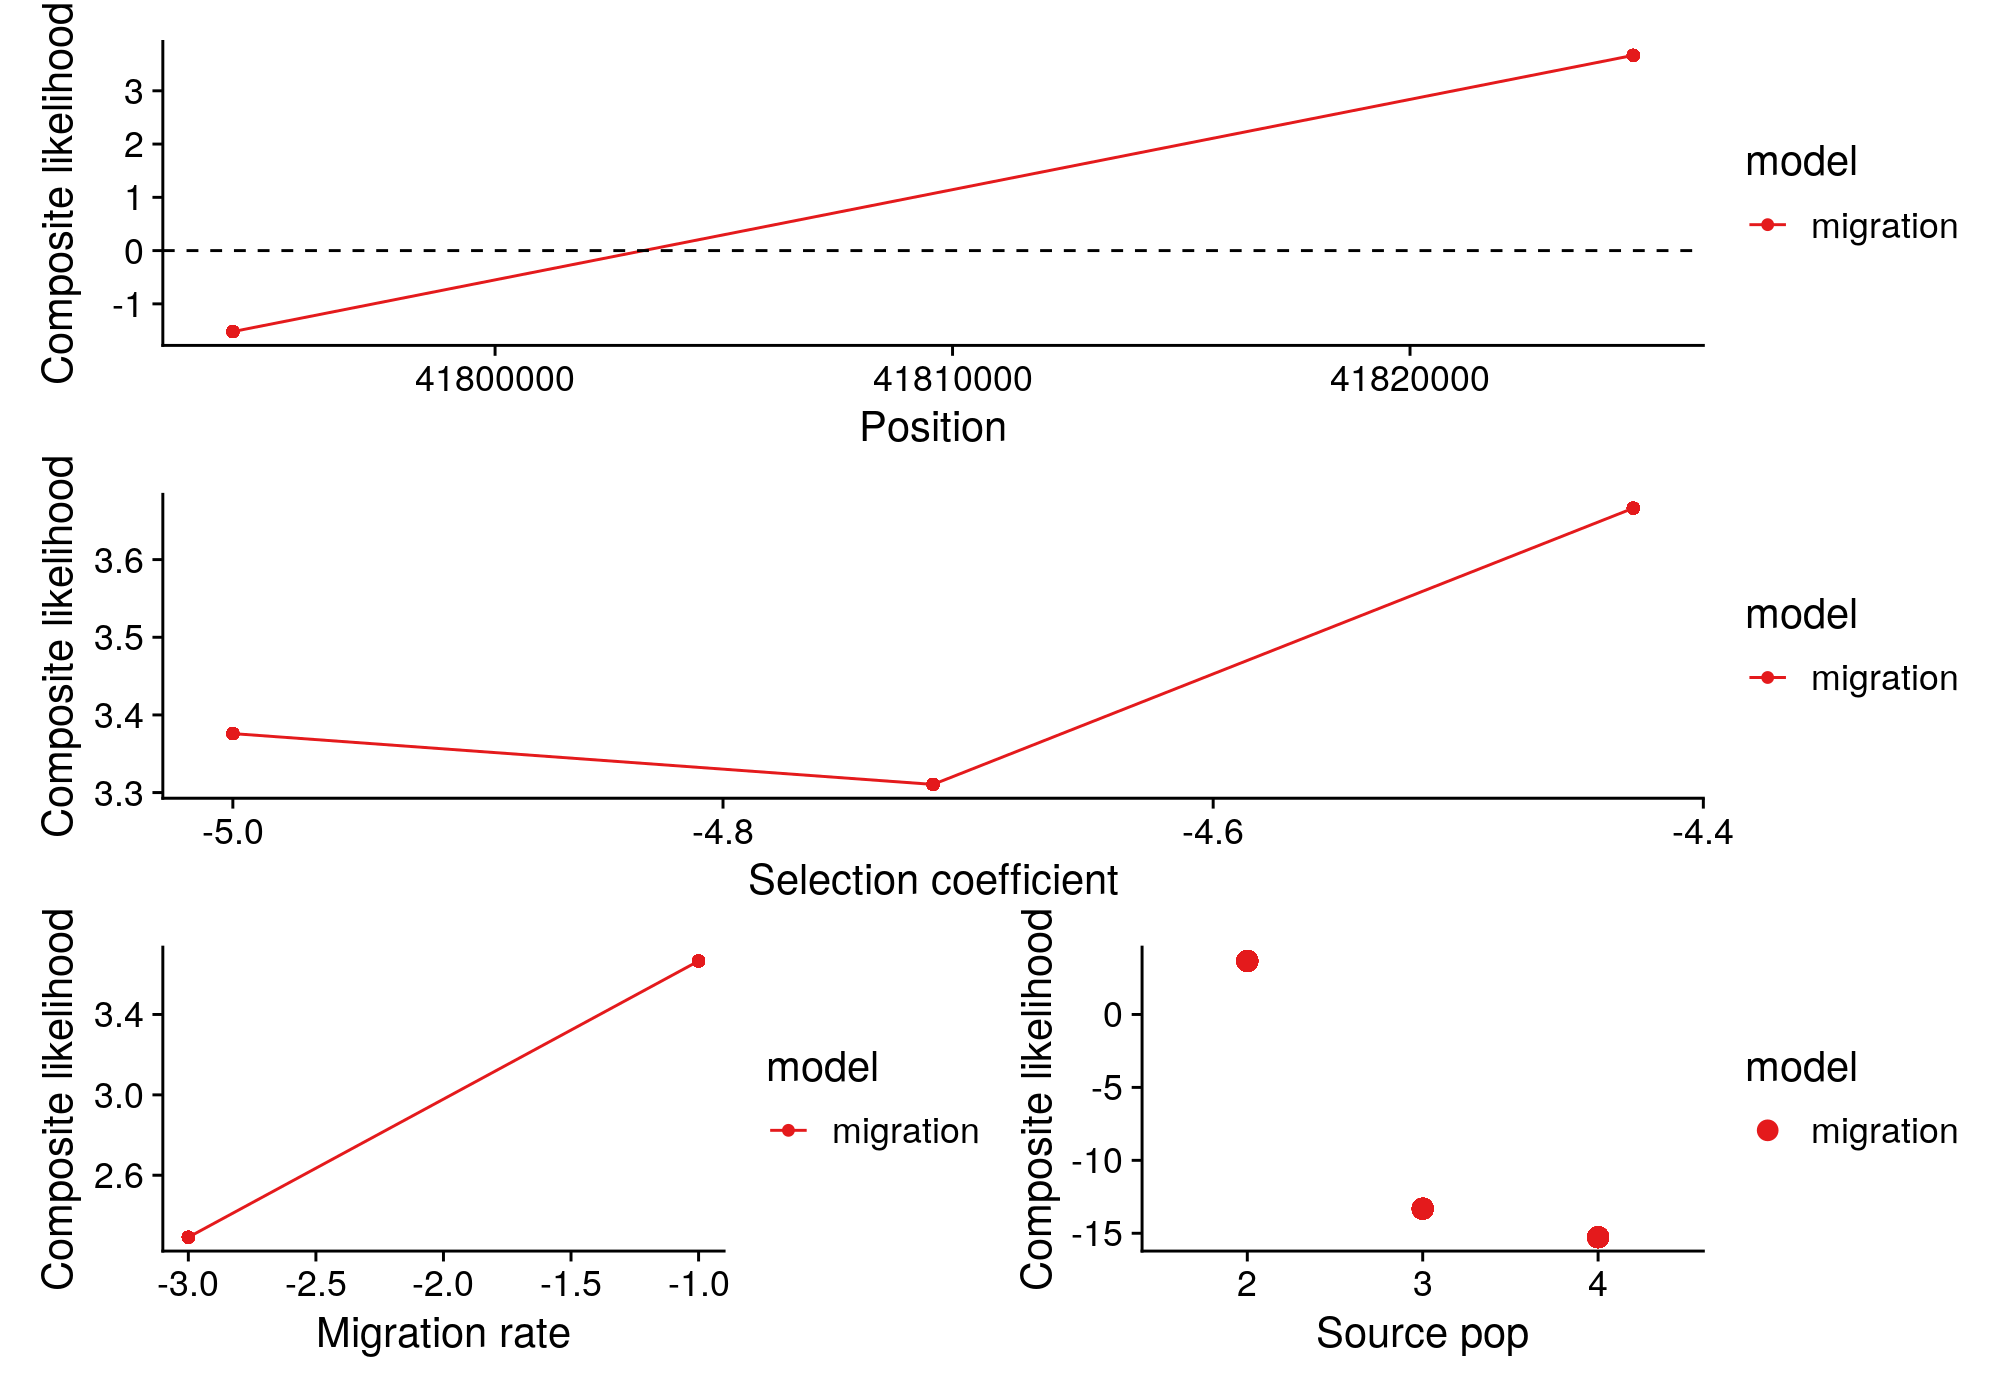

In [3]:
suppressMessages(

fs::dir_ls(path = "../data/rdmc/fitted/") %>% 
    sample(size = 10, replace = FALSE) %>% 
    map(~ {
        #print(.x)
        plot_rdmc(.x, cle_low = -5)
    })
    
)

In [172]:
all_mods <- vroom::vroom("../data/rdmc/fitted/v5--sweep_chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt", delim = "\t")

range(vroom::vroom("../data/rdmc/fitted/v5--sweep_chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt", delim = "\t")$cle, na.rm = T)


all_mods %>%
    filter(is.na(cle))

Rows: 7,500
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 7,500
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



[1] 253673.0 307712.2

selected_sites sels         cle
1    95932377       1.000000e-05 NA 
2    95932377       1.000000e-05 NA 
3    95932377       1.000000e-05 NA 
4    95932377       1.000000e-05 NA 
5    95932377       1.000000e-05 NA 
6    95932377       1.000000e-05 NA 
7    95932377       1.000000e-05 NA 
8    95932377       1.000000e-05 NA 
9    95932377       1.000000e-05 NA 
10   95932377       1.000000e-05 NA 
11   95932377       1.000000e-05 NA 
12   95932377       1.000000e-05 NA 
13   95932377       1.930698e-05 NA 
14   95932377       1.930698e-05 NA 
15   95932377       1.930698e-05 NA 
16   95932377       1.930698e-05 NA 
17   95932377       1.930698e-05 NA 
18   95932377       1.930698e-05 NA 
19   95932377       1.930698e-05 NA 
20   95932377       1.930698e-05 NA 
21   95932377       1.930698e-05 NA 
22   95932377       1.930698e-05 NA 
23   95932377       1.930698e-05 NA 
24   95932377       1.930698e-05 NA 
25   95932377       3.727594e-05 NA 
26   95932377       3.727594e-05 NA 
27   95932377       3.727594e-05 NA 
28   95932377       3.727594e-05 NA 
29   95932377       3.727594e-05 NA 
30   95932377       3.727594e-05 NA 
⋮    ⋮              ⋮            ⋮  
5897 96702868       0.01389495   NA 
5898 96702868       0.01389495   NA 
5899 96702868       0.01389495   NA 
5900 96702868       0.02682696   NA 
5901 96702868       0.02682696   NA 
5902 96702868       0.02682696   NA 
5903 96702868       0.02682696   NA 
5904 96702868       0.02682696   NA 
5905 96702868       0.02682696   NA 
5906 96702868       0.02682696   NA 
5907 96702868       0.02682696   NA 
5908 96702868       0.02682696   NA 
5909 96702868       0.05179475   NA 
5910 96702868       0.05179475   NA 
5911 96702868       0.05179475   NA 
5912 96702868       0.05179475   NA 
5913 96702868       0.05179475   NA 
5914 96702868       0.05179475   NA 
5915 96702868       0.05179475   NA 
5916 96702868       0.05179475   NA 
5917 96702868       0.05179475   NA 
5918 96702868       0.10000000   NA 
5919 96702868       0.10000000   NA 
5920 96702868       0.10000000   NA 
5921 96702868       0.10000000   NA 
5922 96702868       0.10000000   NA 
5923 96702868       0.10000000   NA 
5924 96702868       0.10000000   NA 
5925 96702868       0.10000000   NA 
5926 96702868       0.10000000   NA 
     locus                                                                                            
1    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
2    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
3    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
4    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
5    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
6    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
7    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
8    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
9    data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
10   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
11   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
12   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
13   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
14   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
15   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95932363_end96702958_pops1-2-4-5-9-10.txt
16   data/rdmc/sweep_freq/v5--sweep--chr3--0--238017767_start95

In [173]:

suppressWarnings(
suppressMessages(

top_models_df <- fs::dir_ls(path = "../data/rdmc/fitted/") %>% 
    map_df(~{
            sweep_file <- vroom::vroom(.x, delim = "\t")
            if(nrow(sweep_file) > 0){
                sweep_file %>% 
                #filter(!is.na(cle), !is.na(neut_cle), !neut_cle %in% c(-Inf, Inf), !cle %in% c(-Inf, Inf)) %>%  
                group_by(model) %>%
                filter(cle == max(cle, na.rm=T)) %>%
                mutate(mcle = cle - neut_cle) %>%
                ungroup() %>%
                mutate(mcle_delta = mcle - max(mcle, na.rm=T)) %>%
                arrange(desc(mcle)) %>%  
                slice(1) %>% 
                mutate(file_name = .x)
            } else{
                tibble()
            }
            
    }) %>% 
    mutate(populations = sel_pop_ids) %>% 
    mutate(populations = str_remove_all(populations, "data/raisd/"),
           populations = str_remove_all(populations, ".corrected_block_outliers_merged.txt"),
           populations = str_replace_all(populations, "random1", "RANDOM1"),
           populations = str_replace_all(populations, "random2", "RANDOM2"),
           type = case_when(
               grepl("LR", populations) & grepl("Teo", populations) ~ "both",
               grepl("LR", populations) & !grepl("Teo", populations) ~ "Landraces",
               !grepl("LR", populations) & grepl("Teo", populations) ~ "Teosinte",
               TRUE ~ "nan"
    ),
        pop_count = str_count(populations, ";")+1,
        Landraces_count = str_count(populations, "LR"),
        Teosinte_count =  str_count(populations, "Teo")        
        )
    
))

In [174]:
top_models_df  <- top_models_df %>% mutate(model2 = ifelse(mcle < 0, "neutral", model))

model2      n()
1 independent   7
2 migration   482
3 neutral     339
4 standing    264

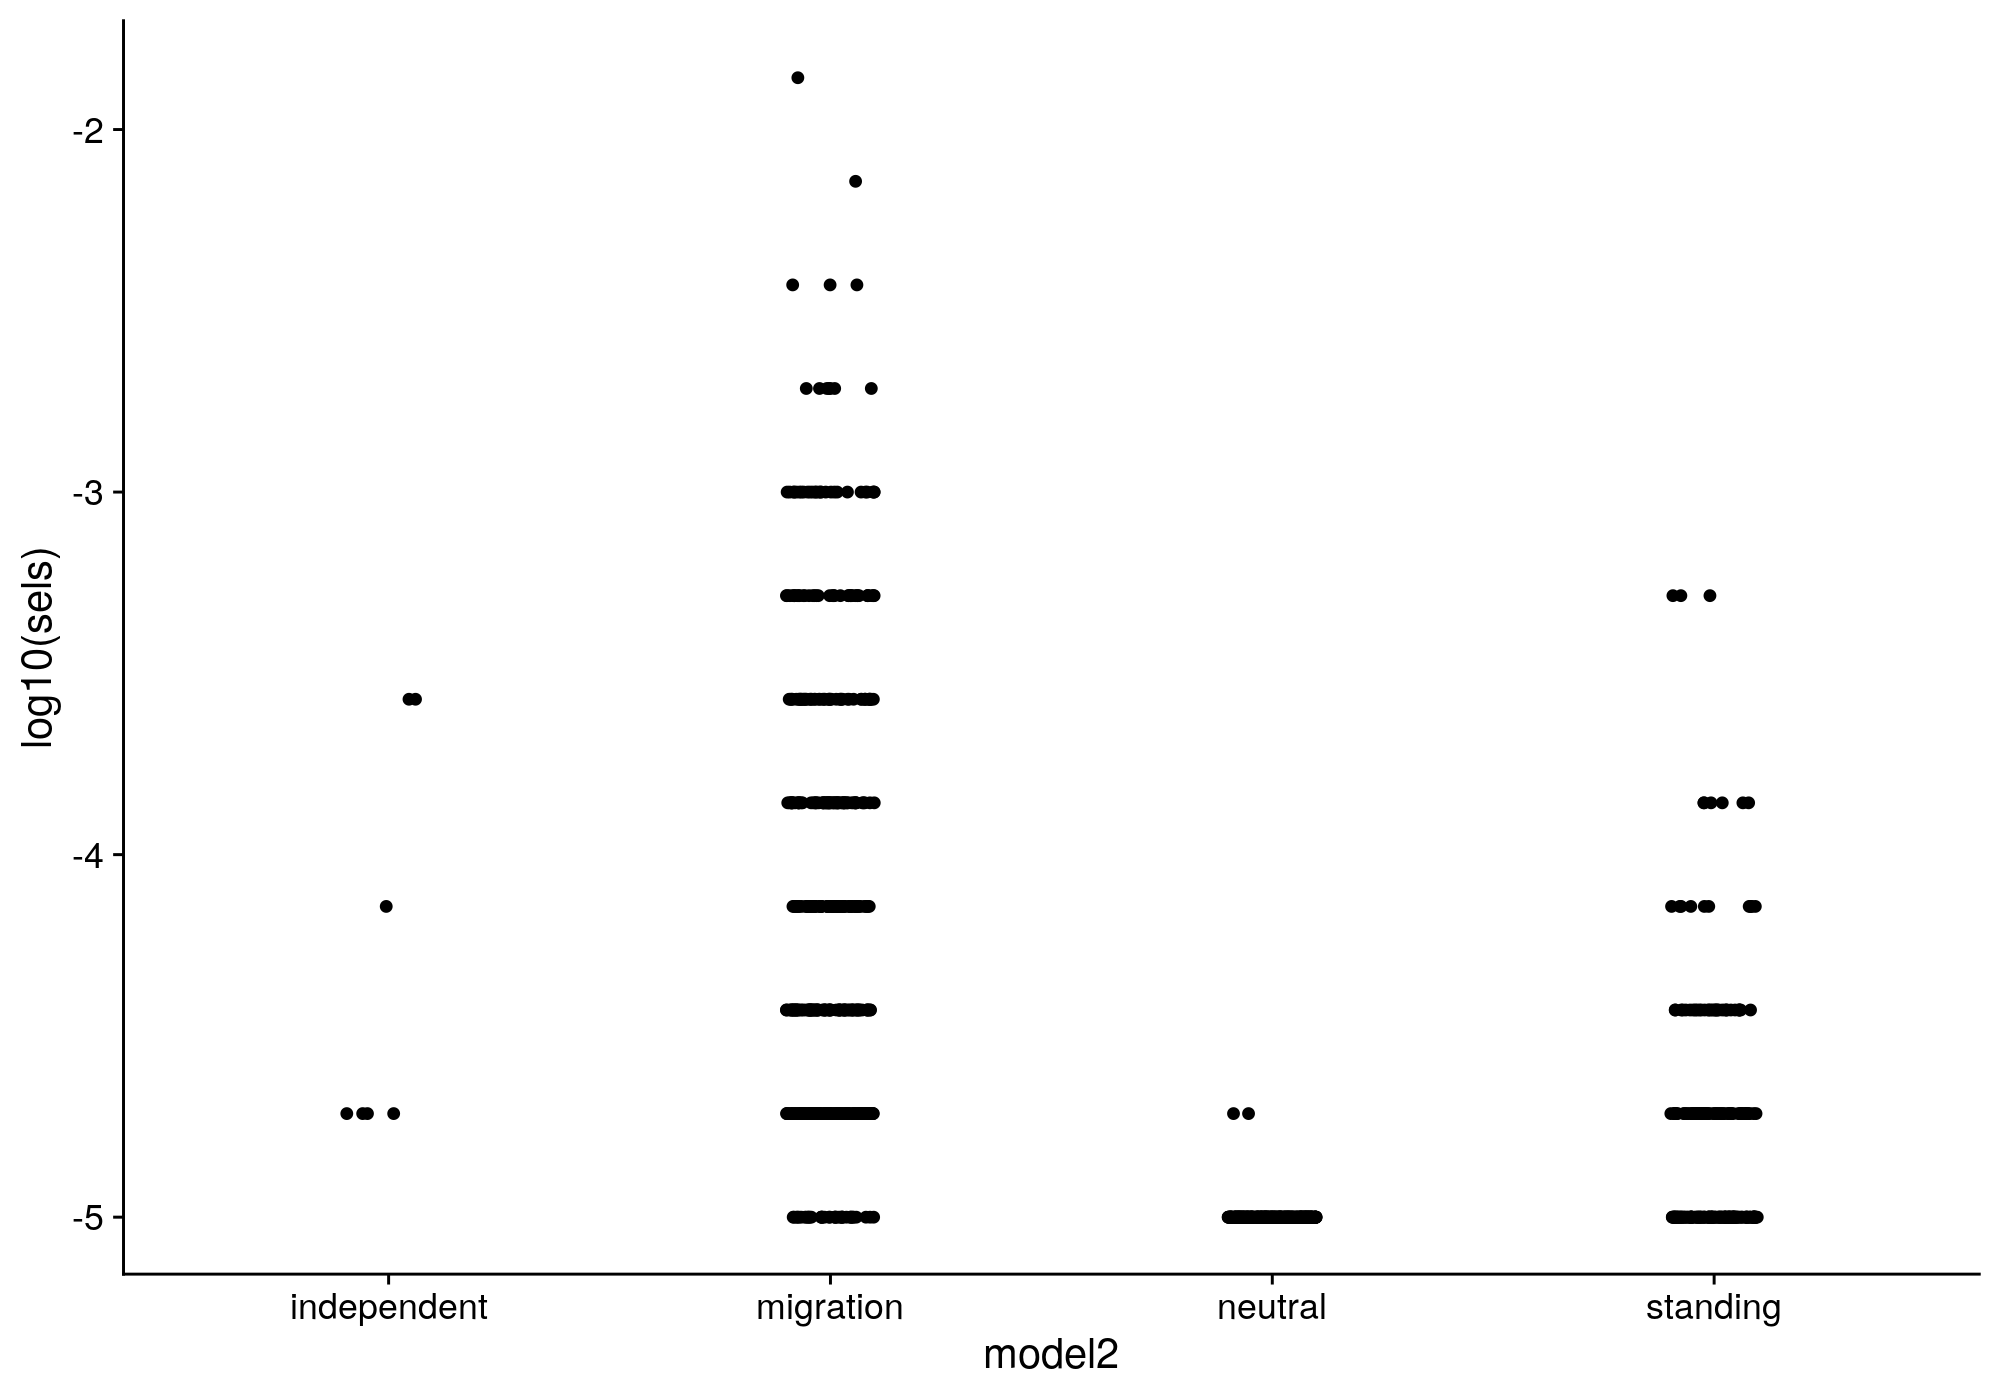

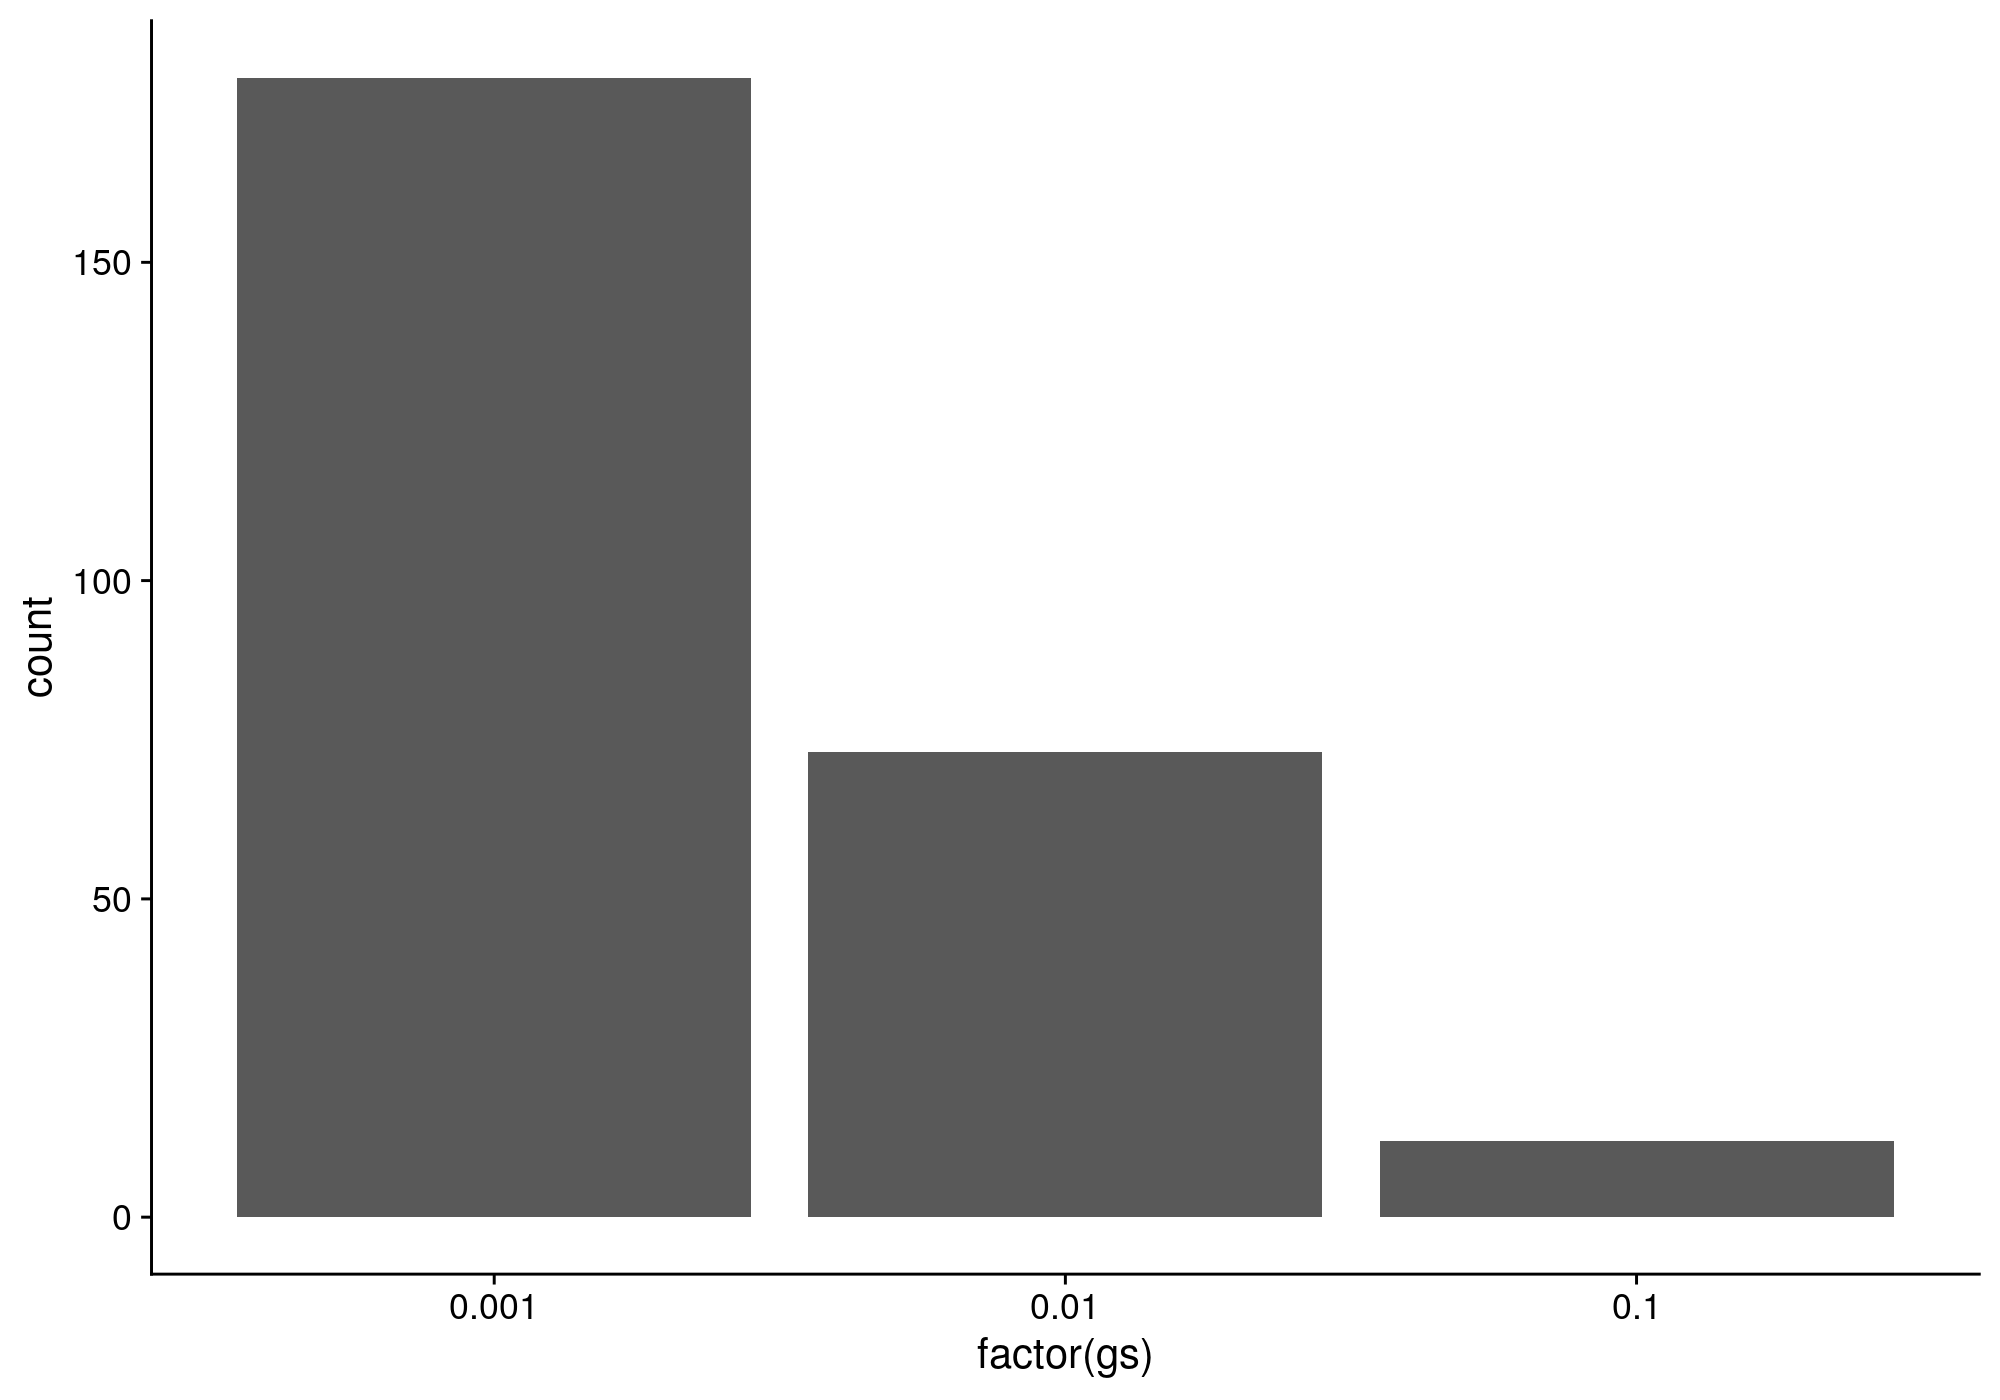

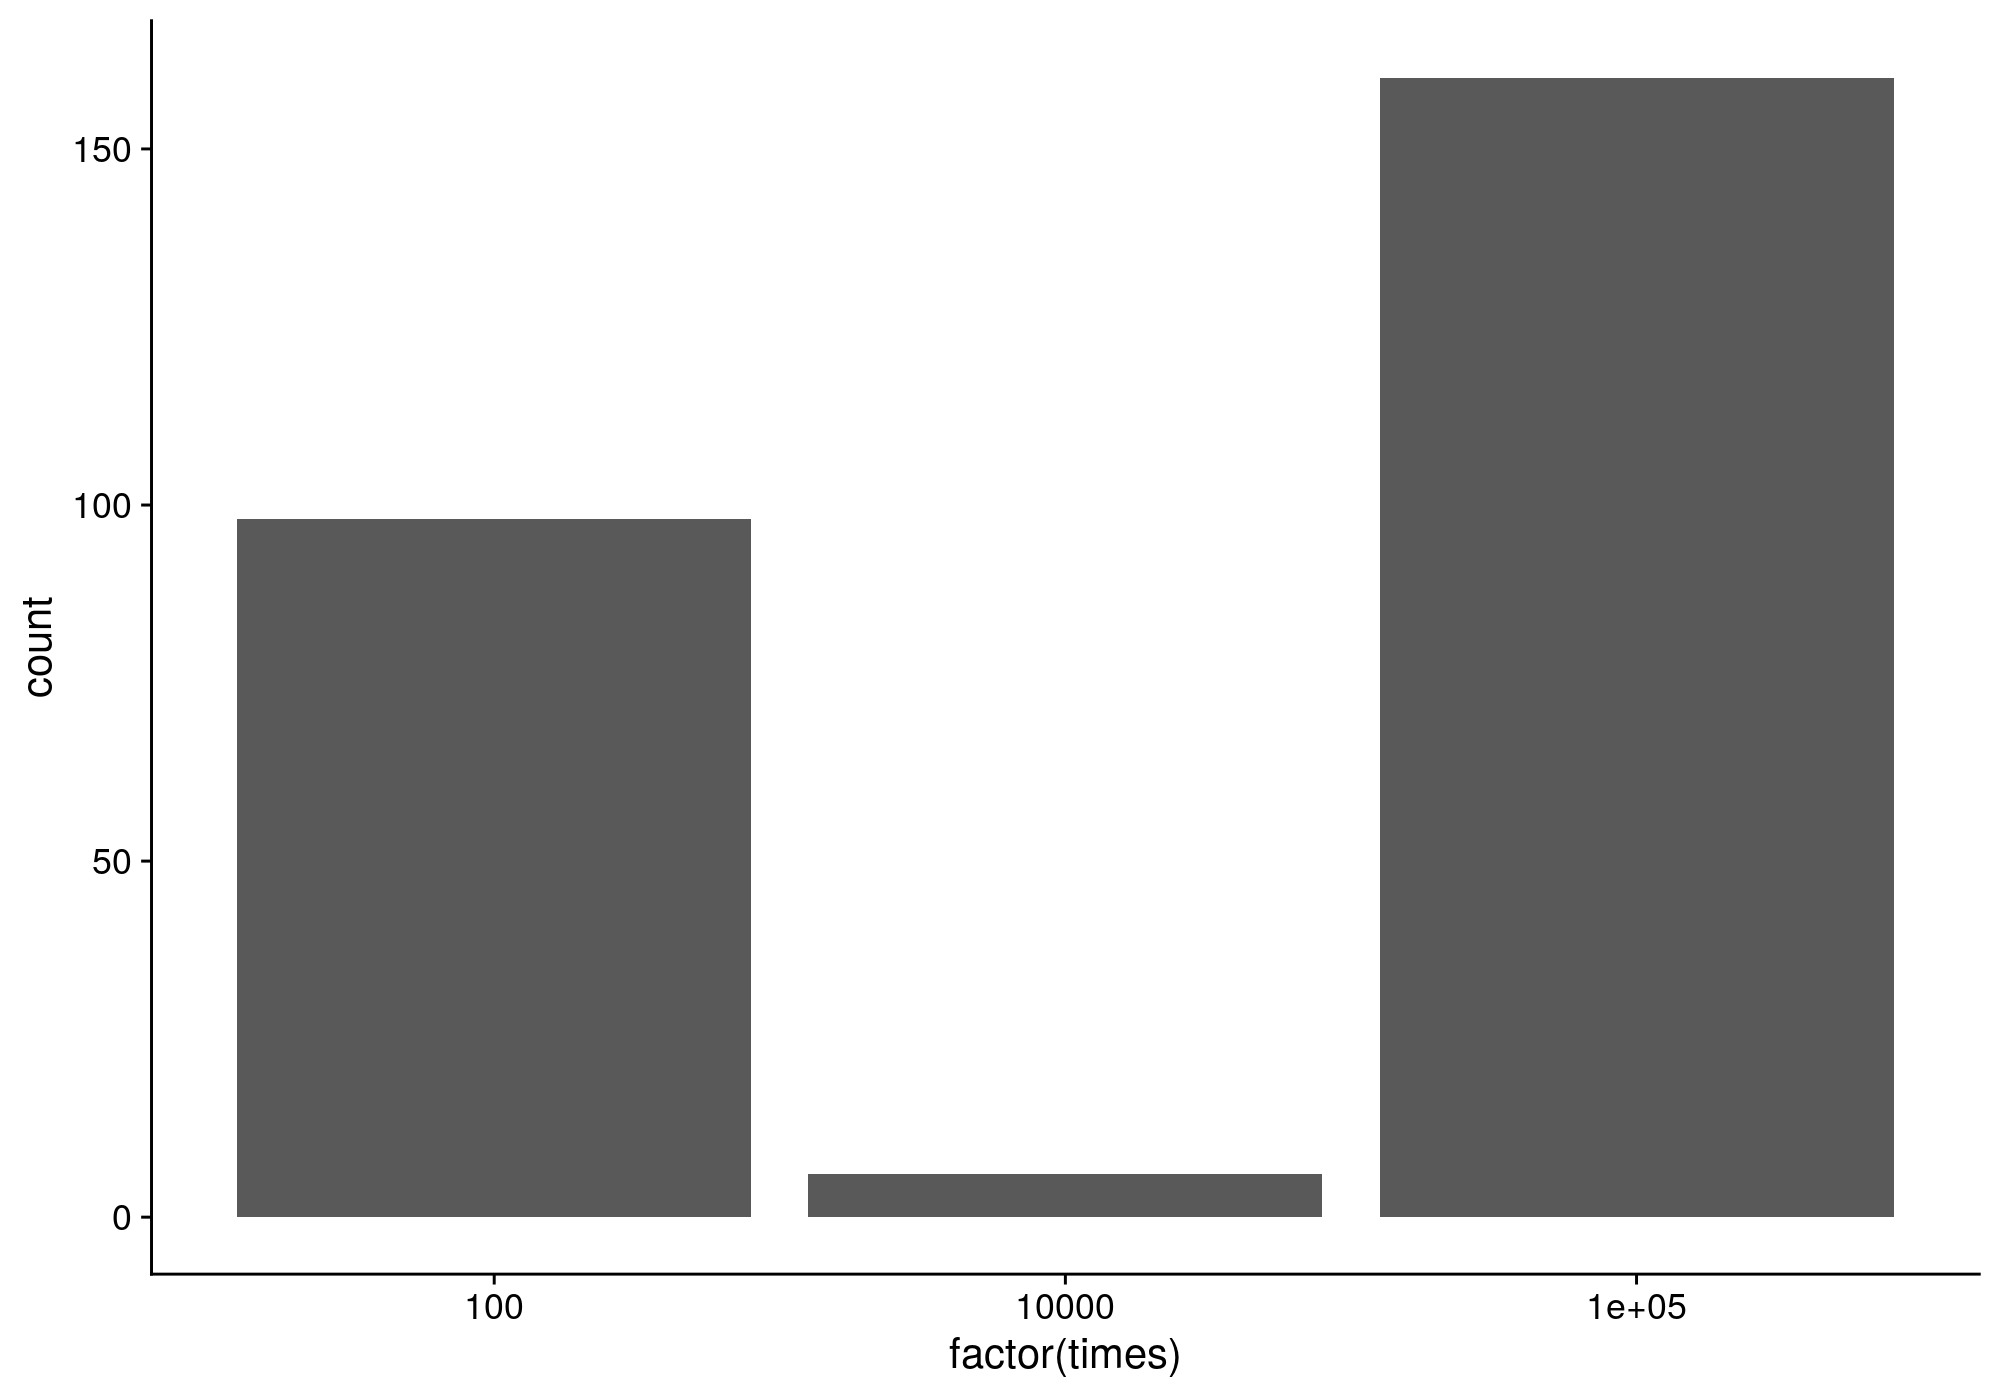

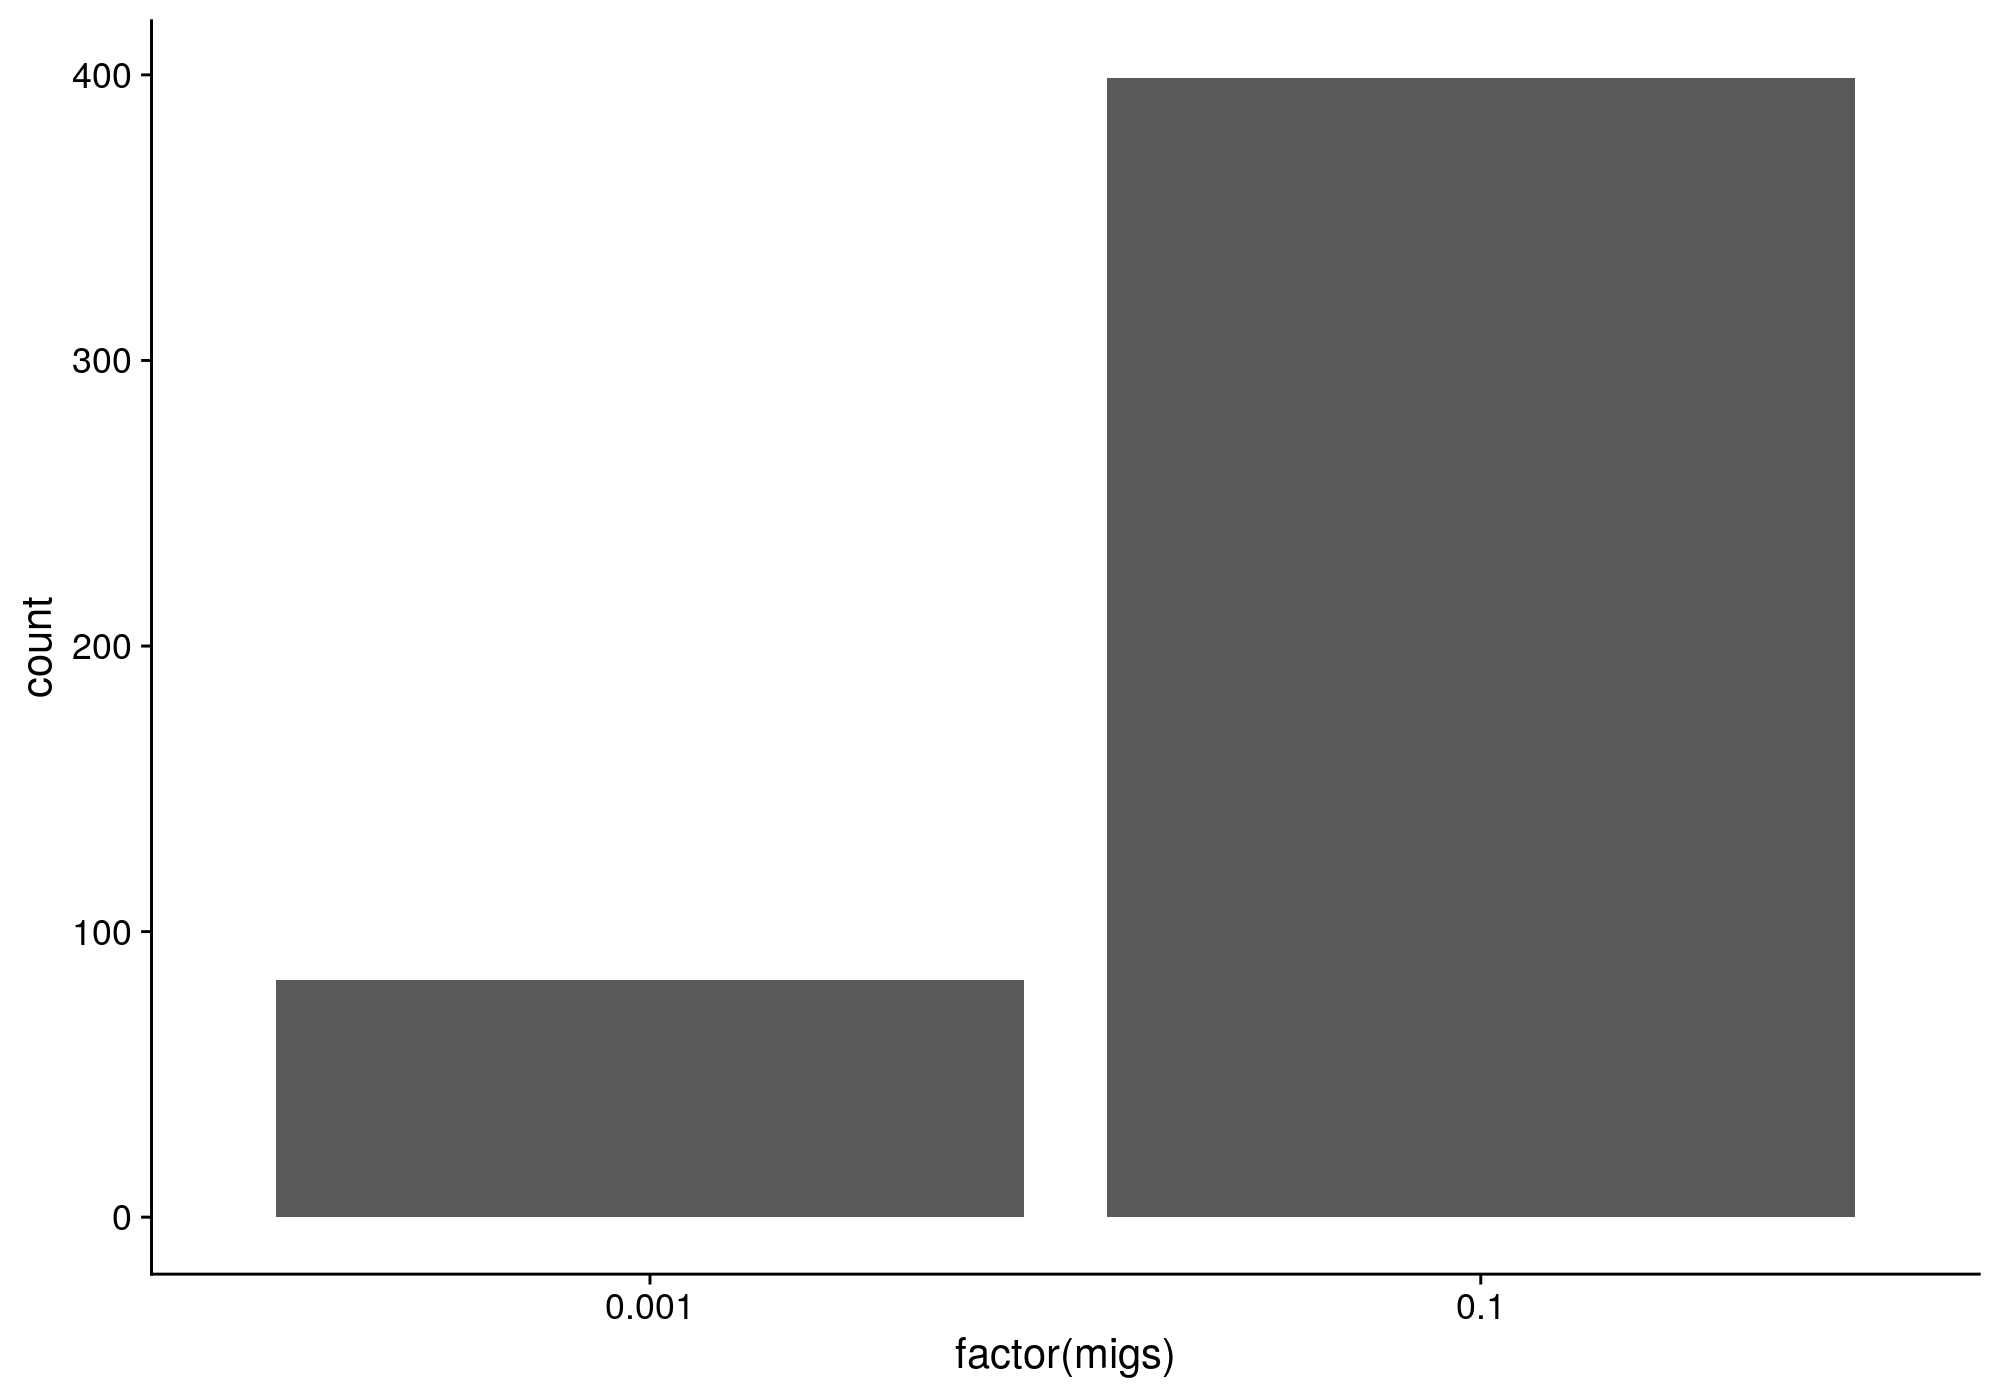

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 rows containing missing values (geom_point).”


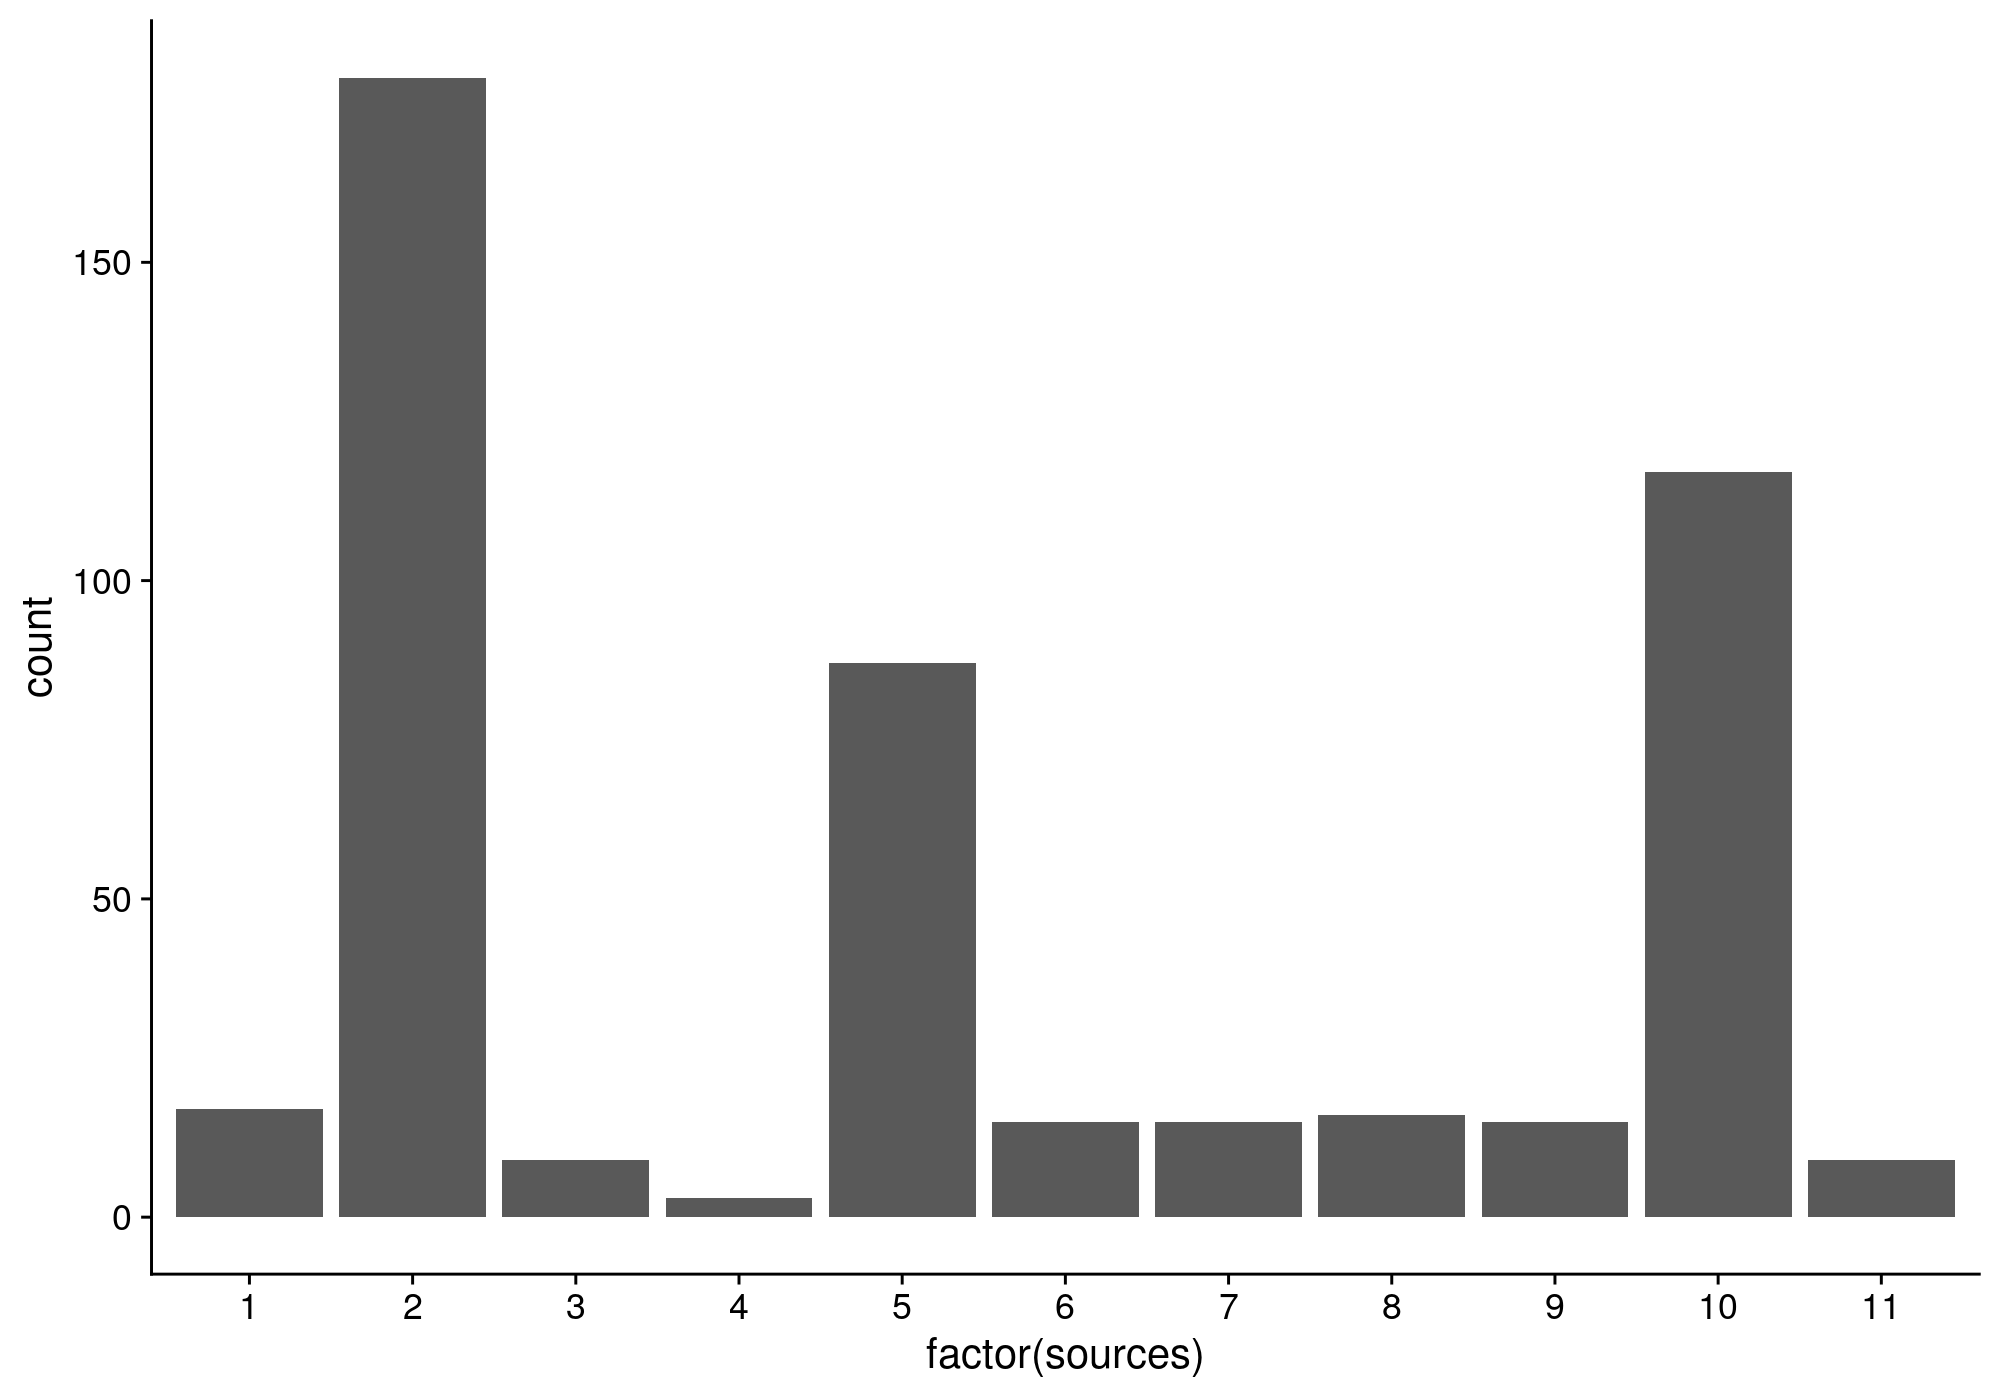

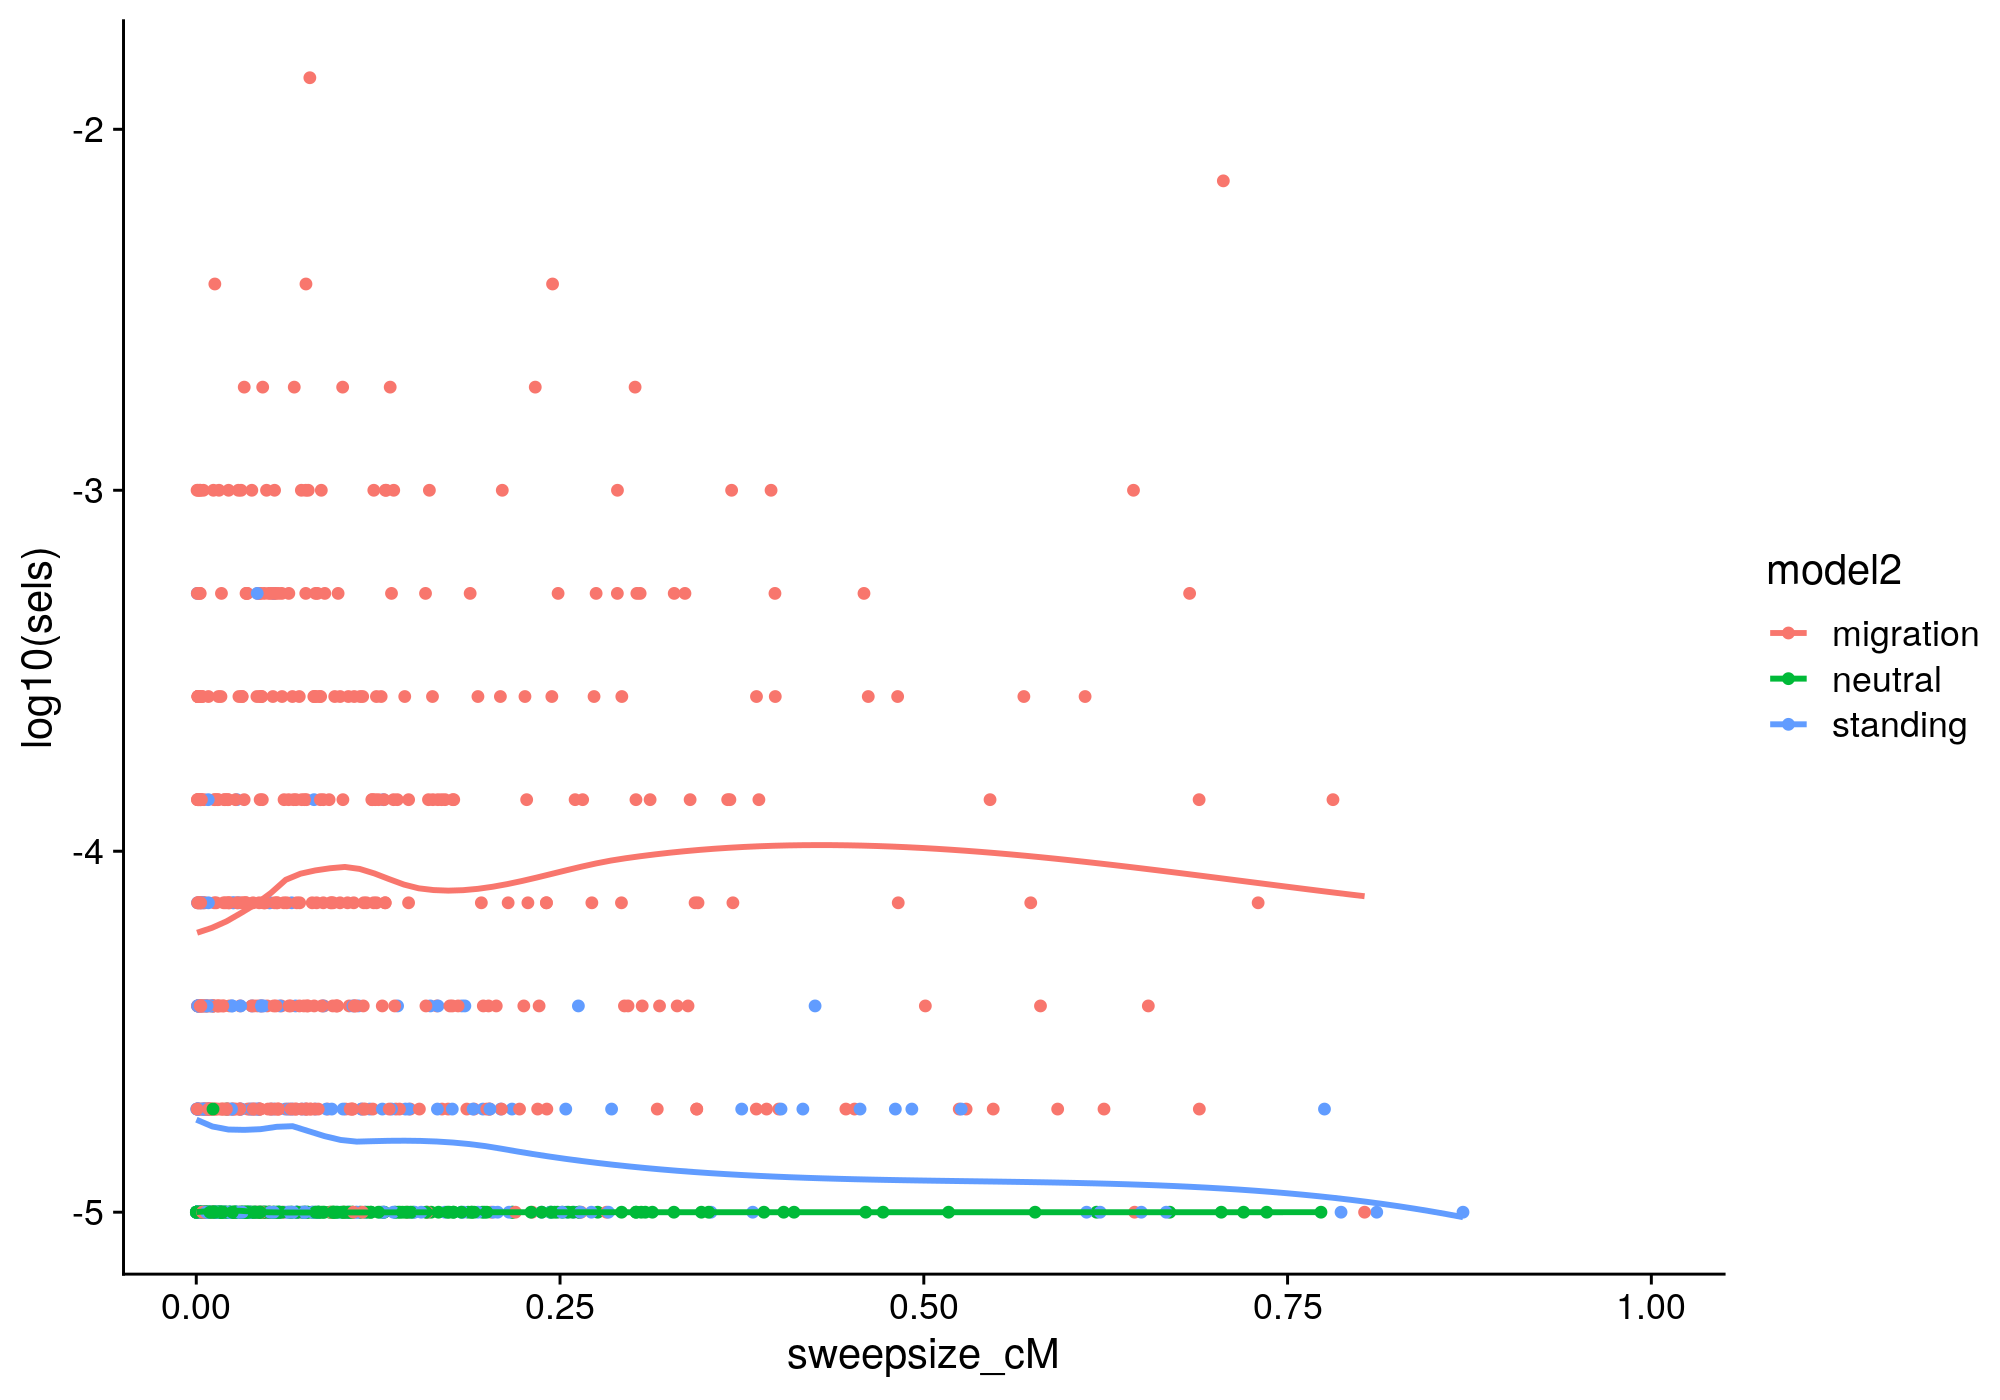

In [175]:

top_models_df %>%
    group_by(model2) %>% 
    summarise(n())

top_models_df %>% 
    ggplot(aes(model2, log10(sels))) +
    geom_jitter(width = 0.1, height = 0)

top_models_df %>%
    filter(model2 == "standing") %>% 
    ggplot(aes(factor(gs))) +
    geom_bar(stat = "count")

top_models_df %>%
    filter(model2 == "standing") %>% 
    ggplot(aes(factor(times))) +
    geom_bar(stat = "count")


top_models_df %>%
    filter(model2 == "migration") %>% 
    ggplot(aes(factor(migs))) +
    geom_bar(stat = "count")


top_models_df %>%
    filter(model2 == "migration") %>% 
    ggplot(aes(factor(sources))) +
    geom_bar(stat = "count")


top_models_df %>%
    filter(model2 != "independent") %>% 
    ggplot(aes(sweepsize_cM, log10(sels), colour = model2)) +
    geom_point() +
    geom_smooth(se = F) +
    xlim(0, 1)


`geom_smooth()` using formula 'y ~ x'



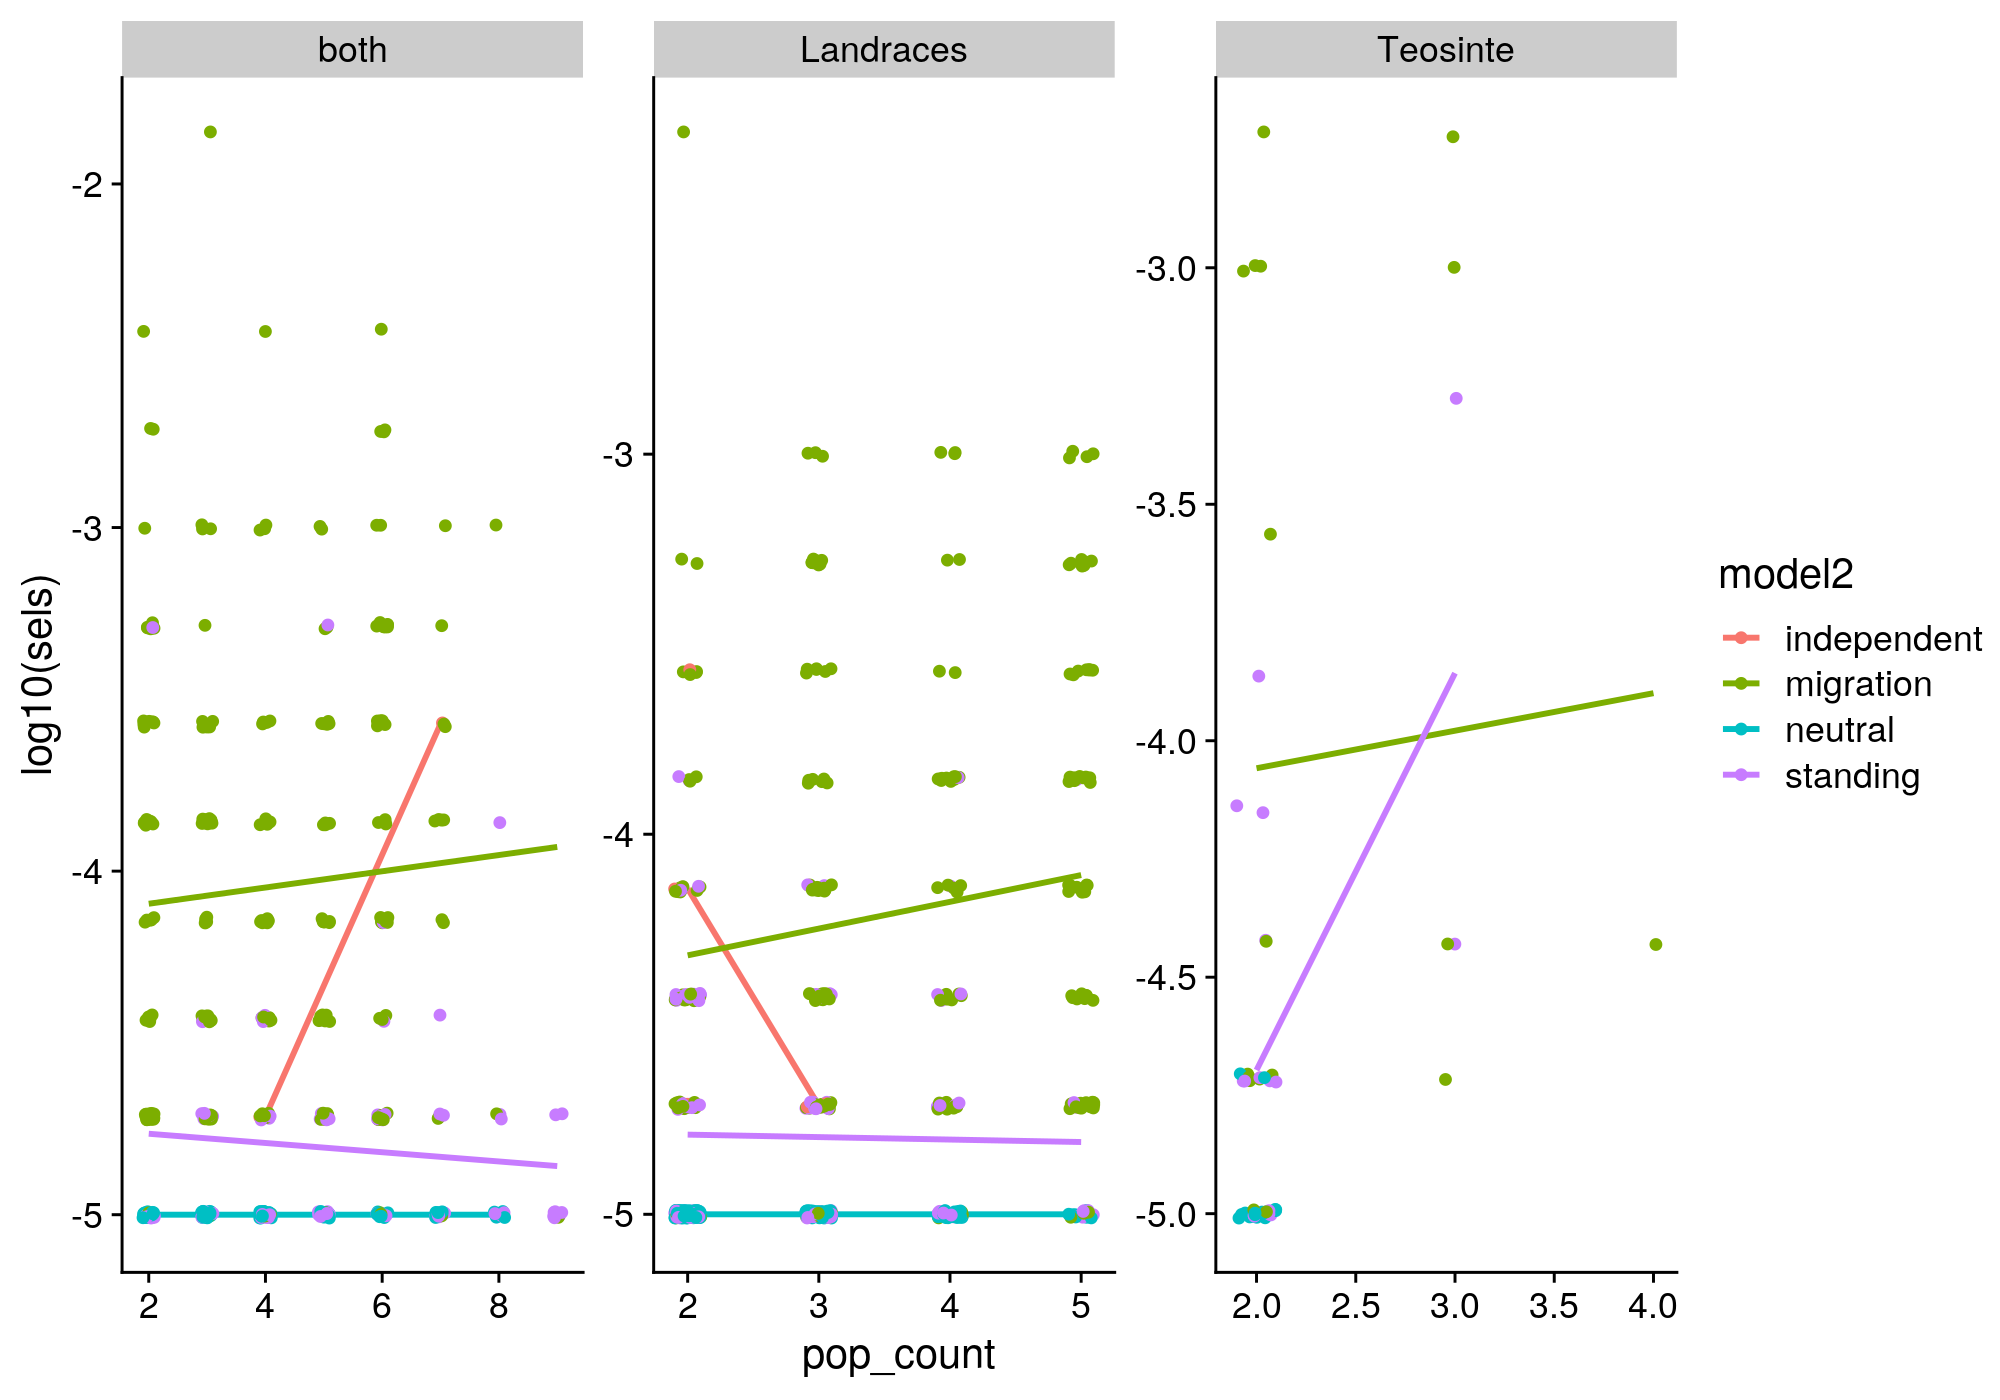

In [176]:
top_models_df %>%
    ggplot(aes(pop_count, log10(sels), colour = model2)) +
    geom_smooth(method = "lm", se = F) +
    geom_jitter(height = 0.01, width = 0.1) +
    facet_wrap(~type, scale = "free")

Warning message in cor.test.default(top_models_df$sweepsize_cM, top_models_df$n_snps, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  top_models_df$sweepsize_cM and top_models_df$n_snps
S = 57525949, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.734938 


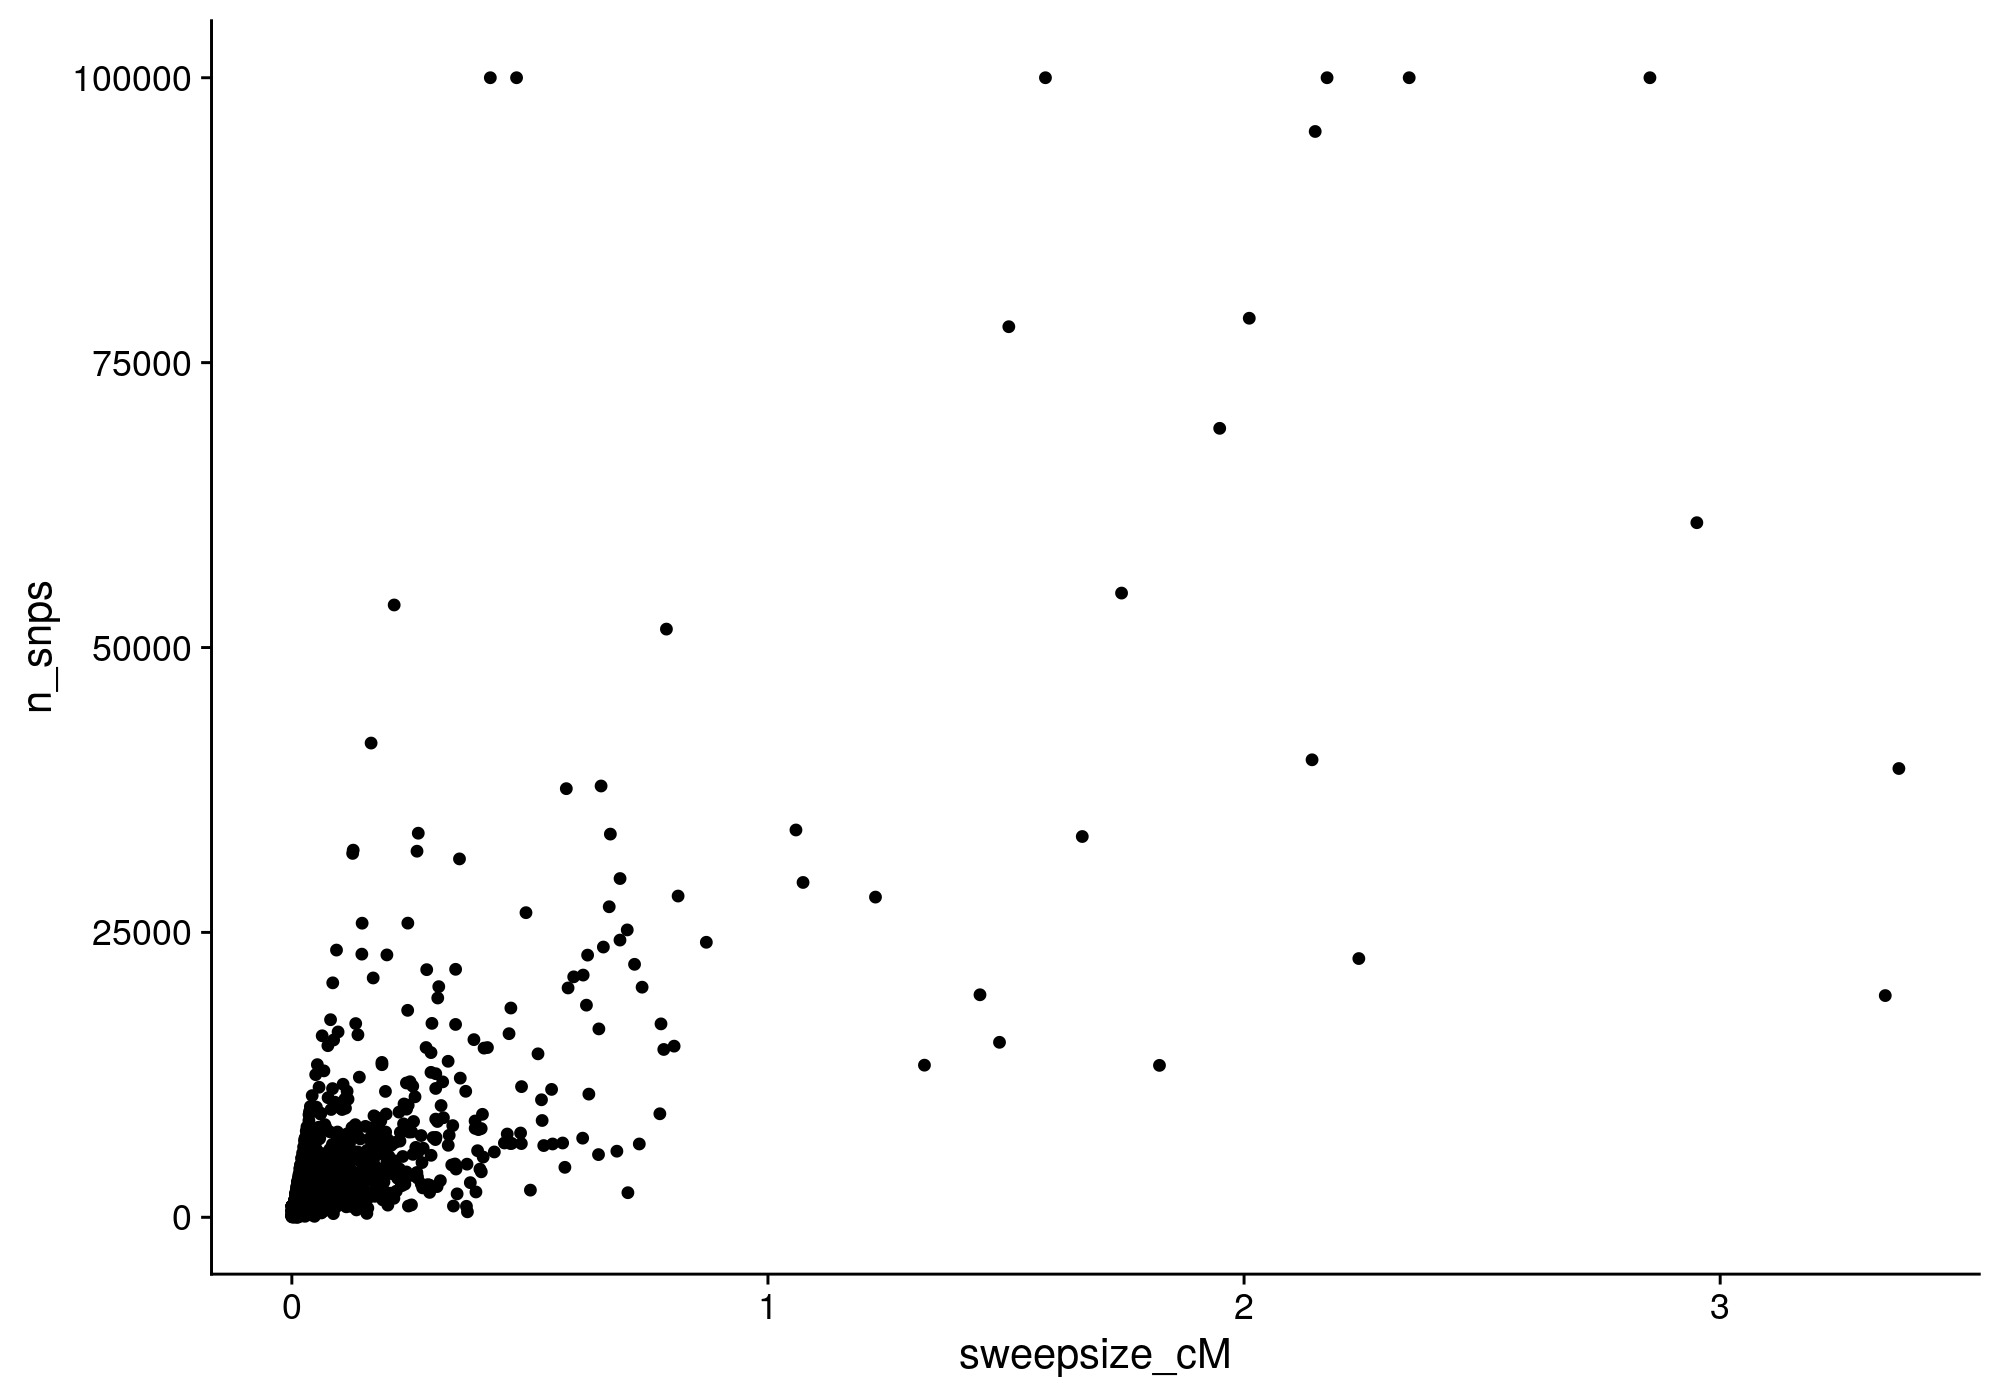

In [177]:
top_models_df %>% 
    ggplot(aes(sweepsize_cM, n_snps)) +
    geom_point()
    #geom_hline(yintercept = c(1e3, 1e4))

cor.test(top_models_df$sweepsize_cM, top_models_df$n_snps, method = "spear")

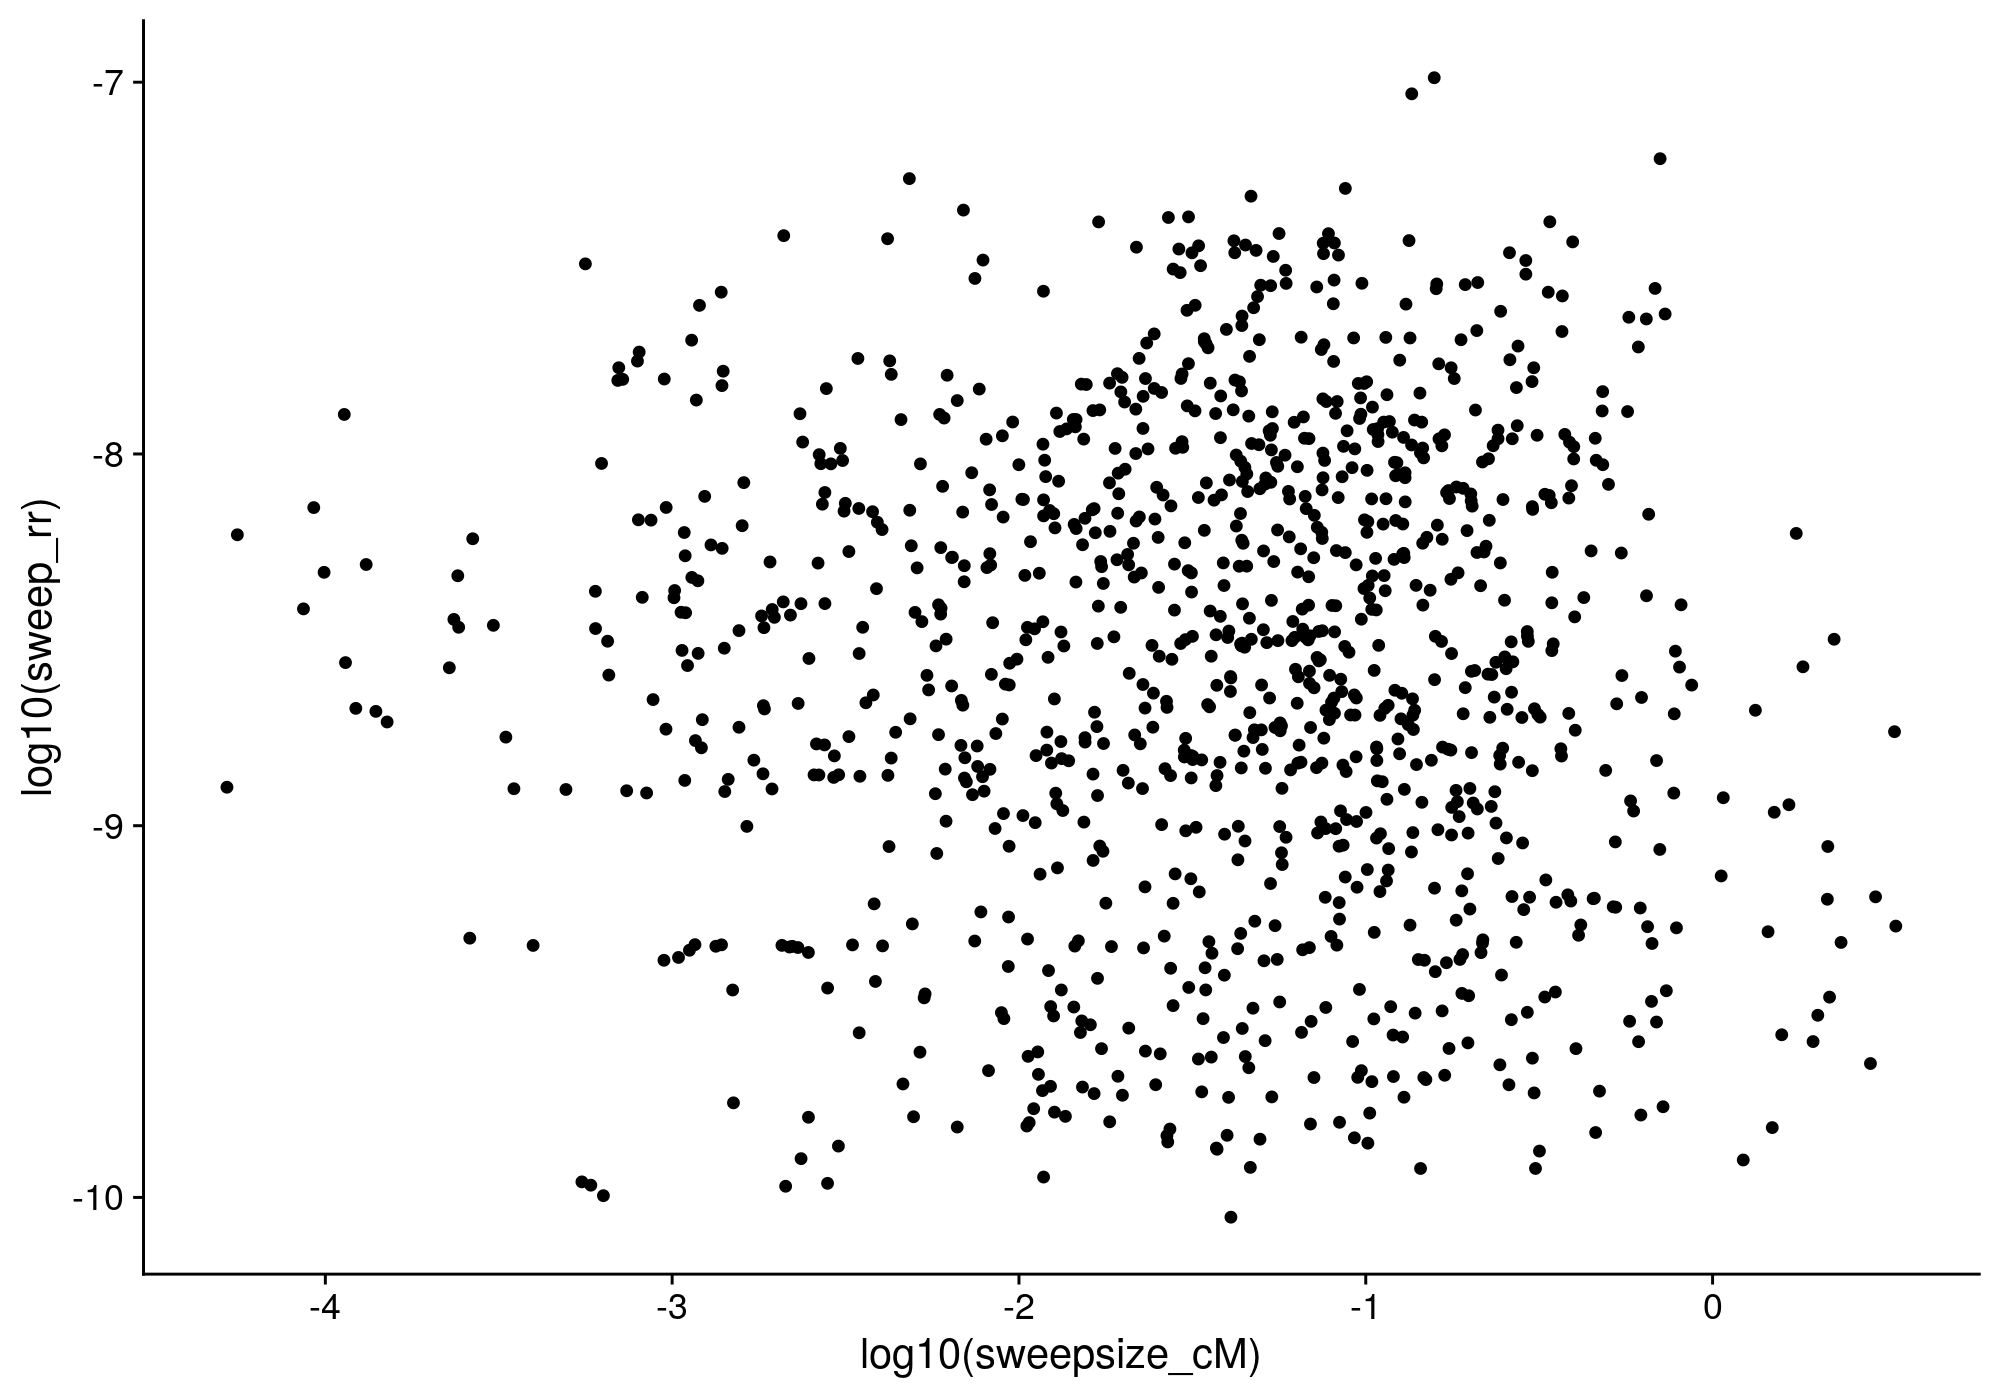

In [178]:
top_models_df %>% 
    ggplot(aes(log10(sweepsize_cM), log10(sweep_rr))) +
    geom_point()



[1] 11

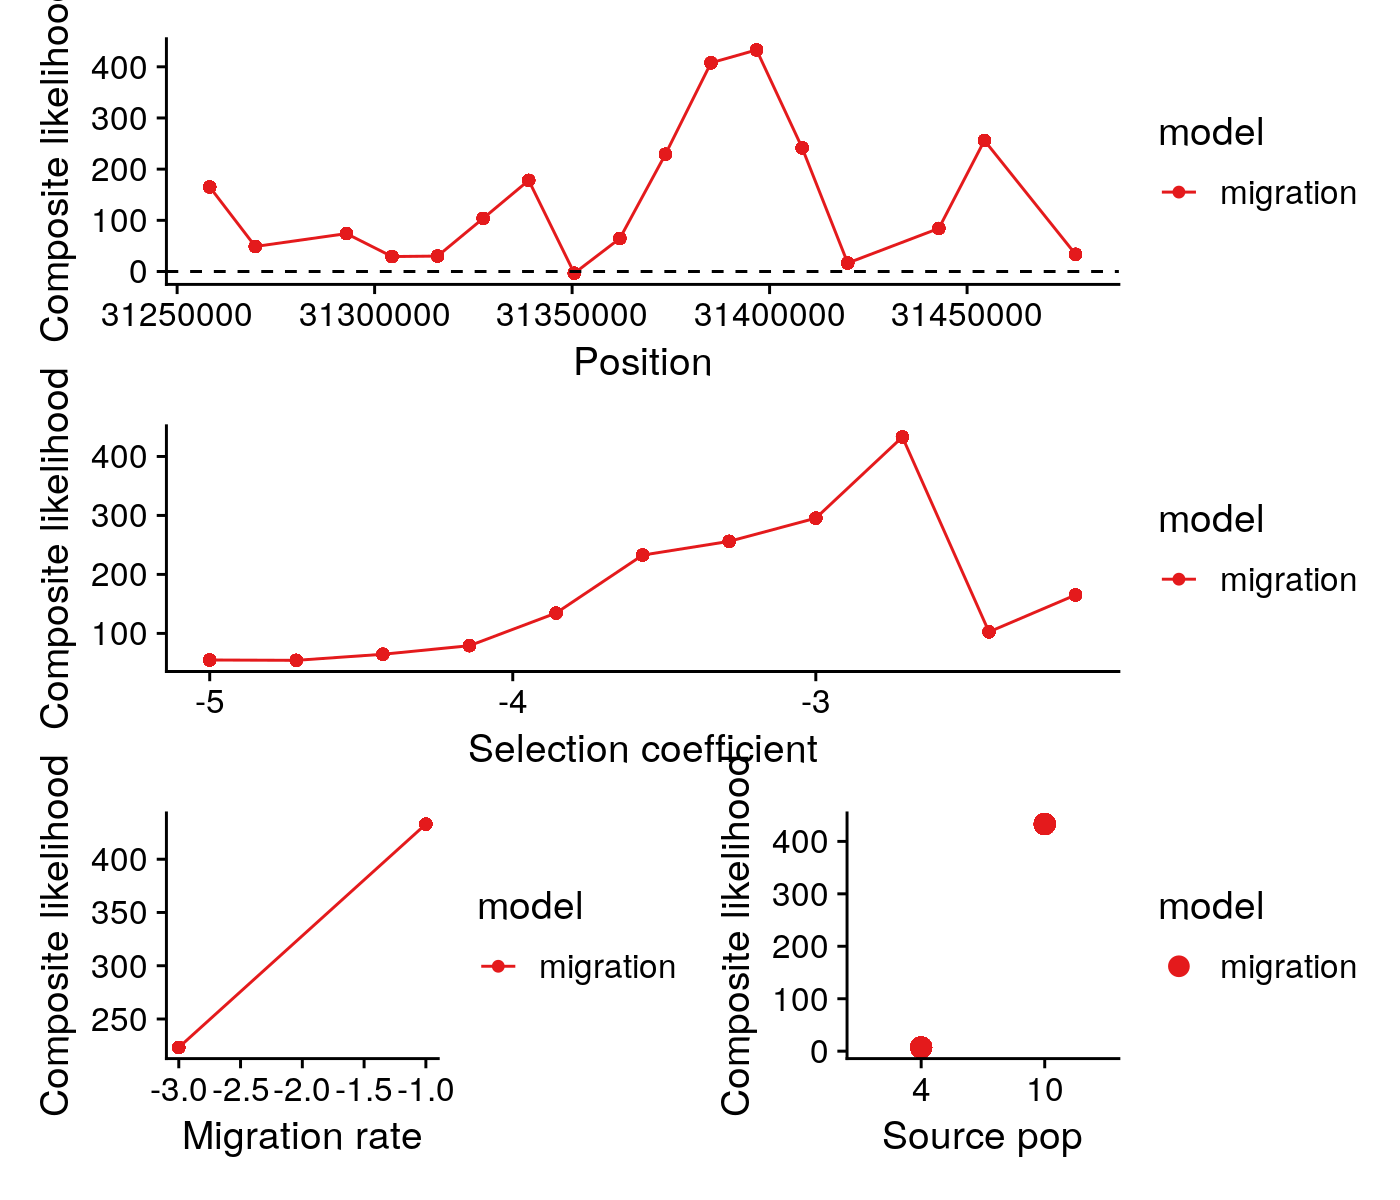

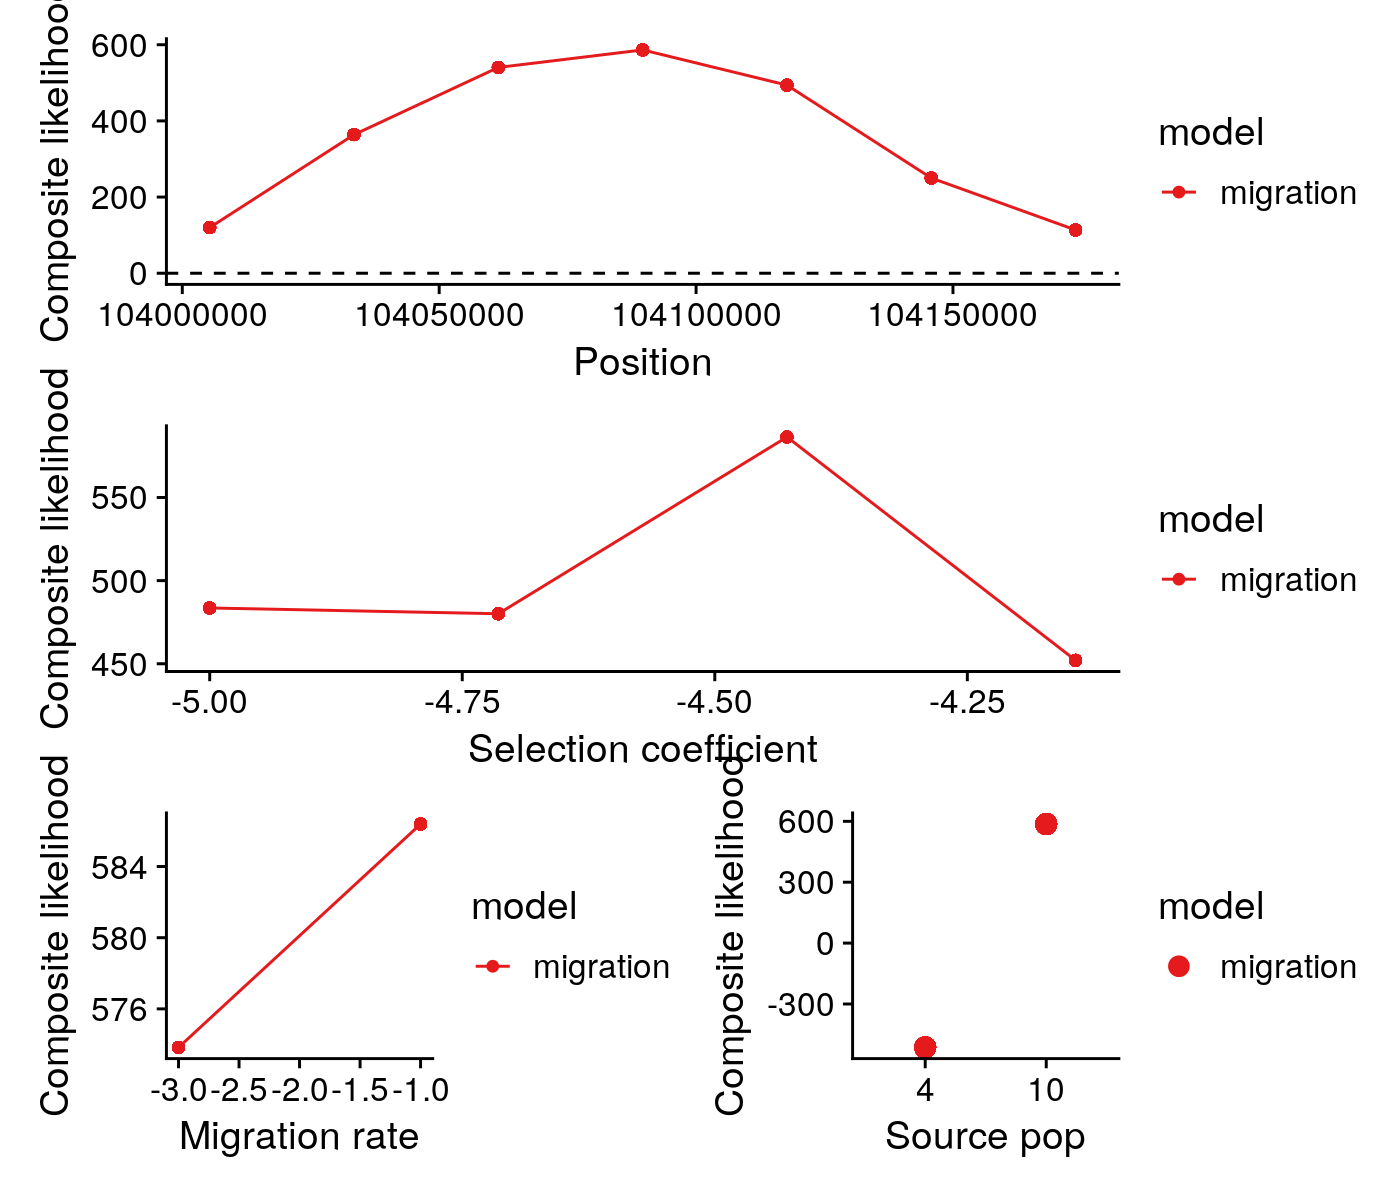

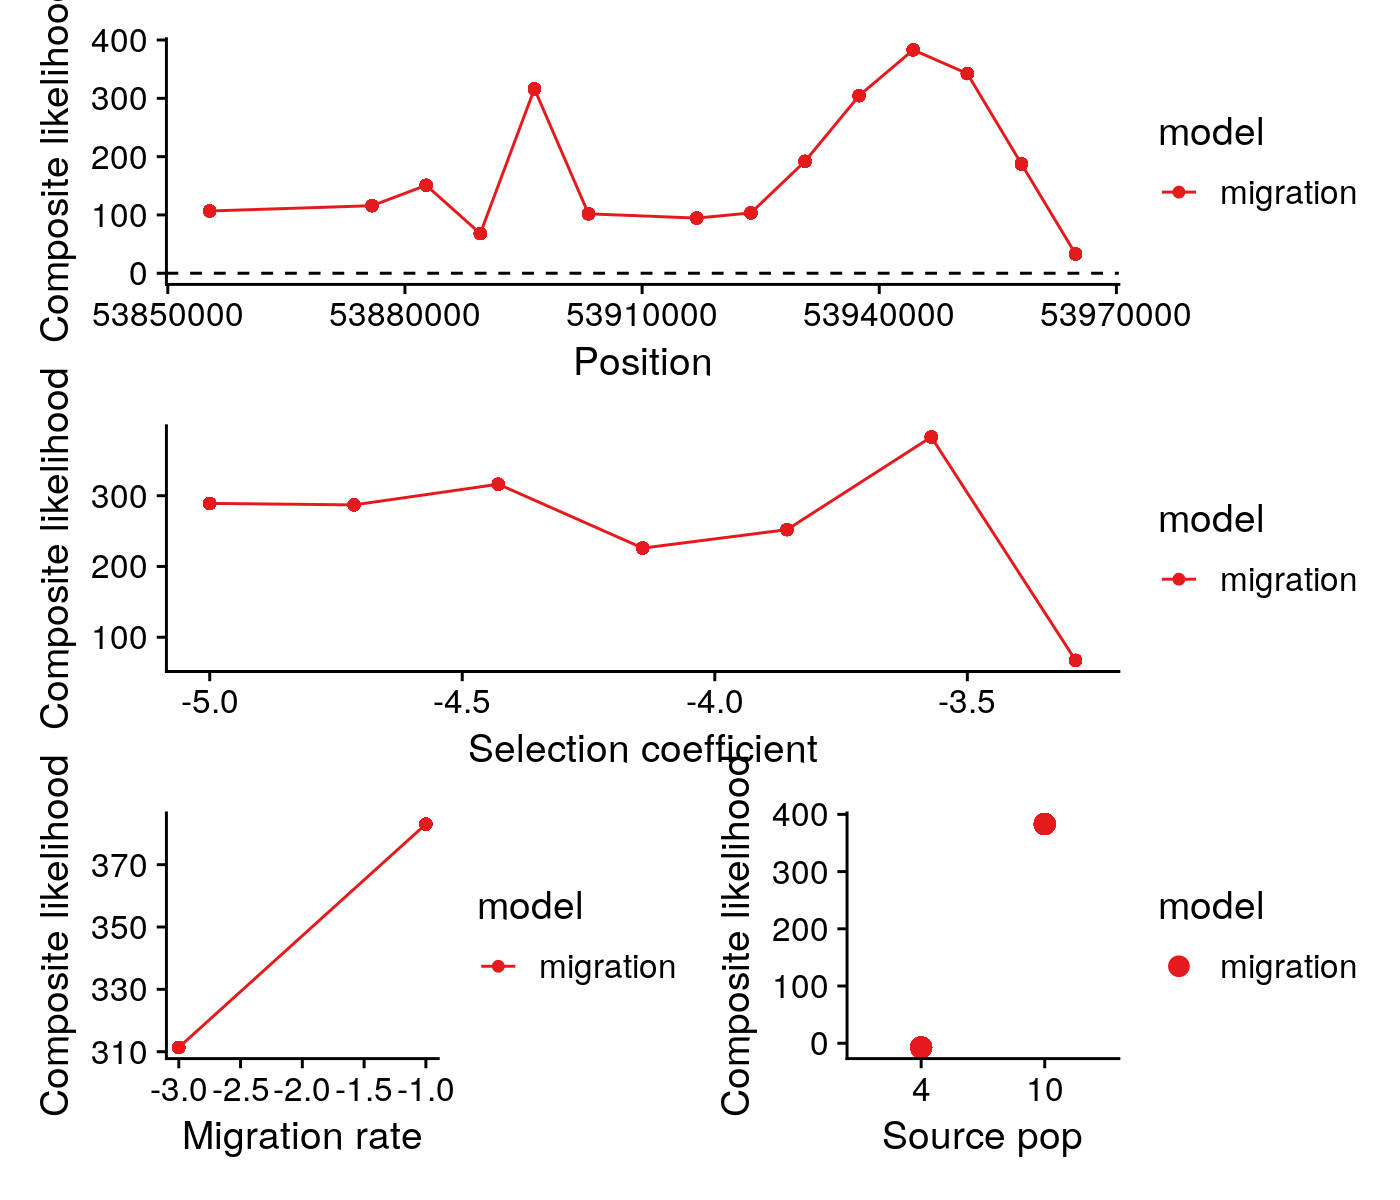

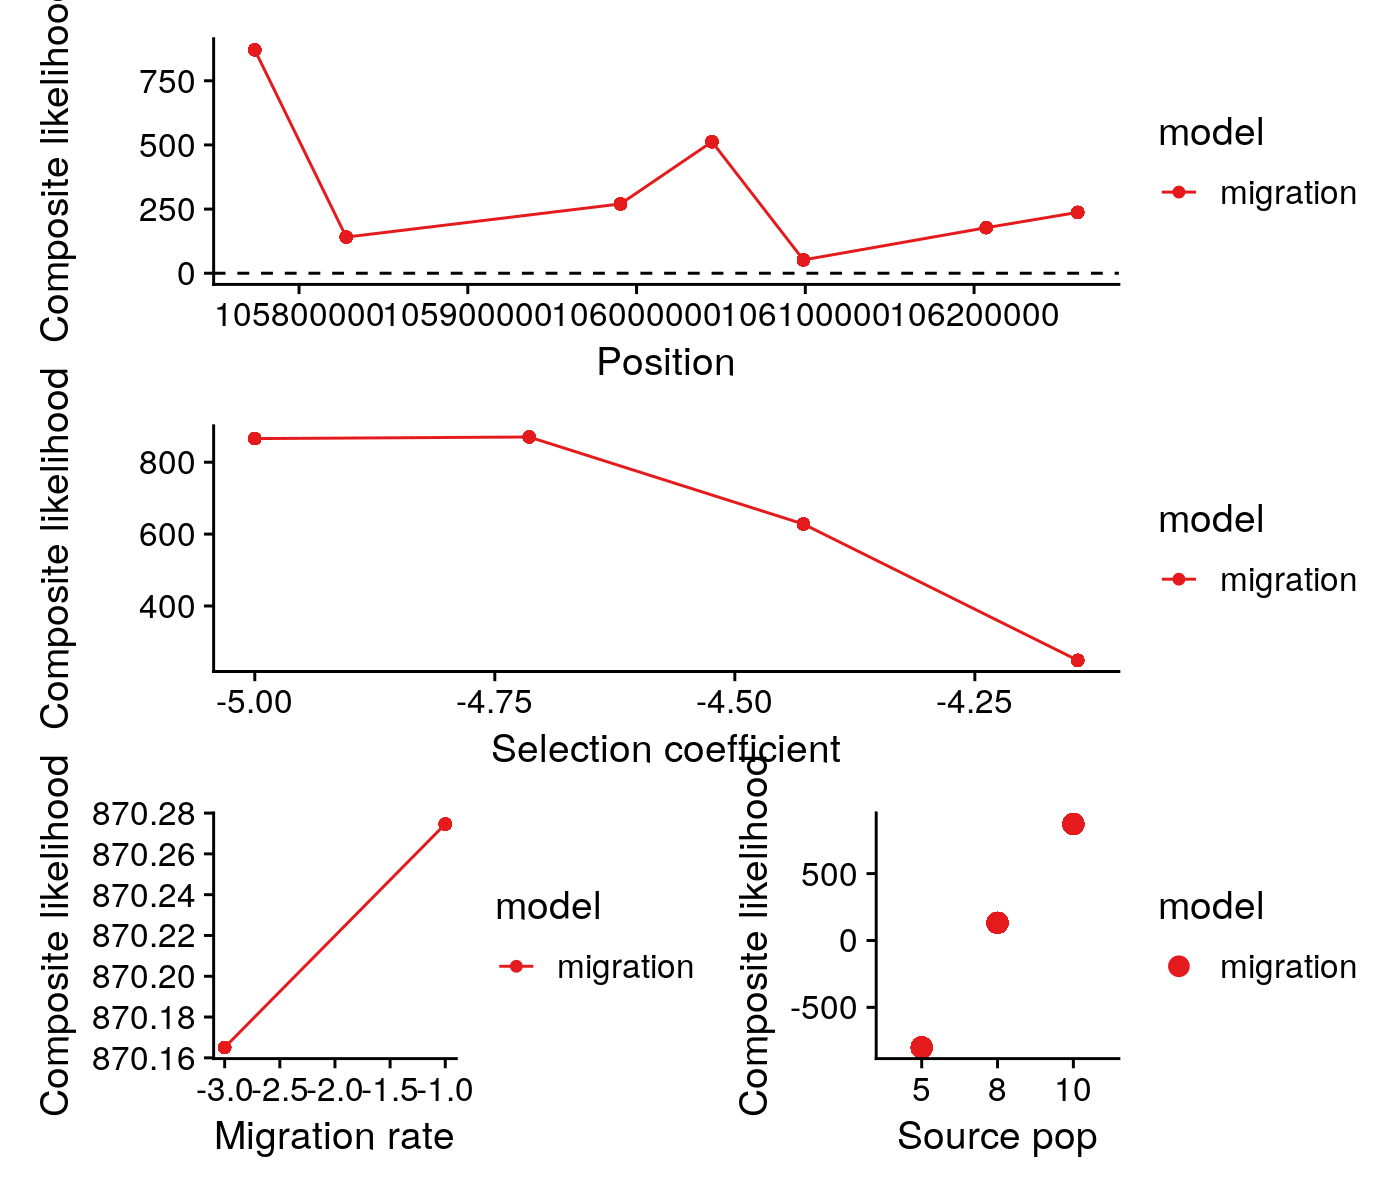

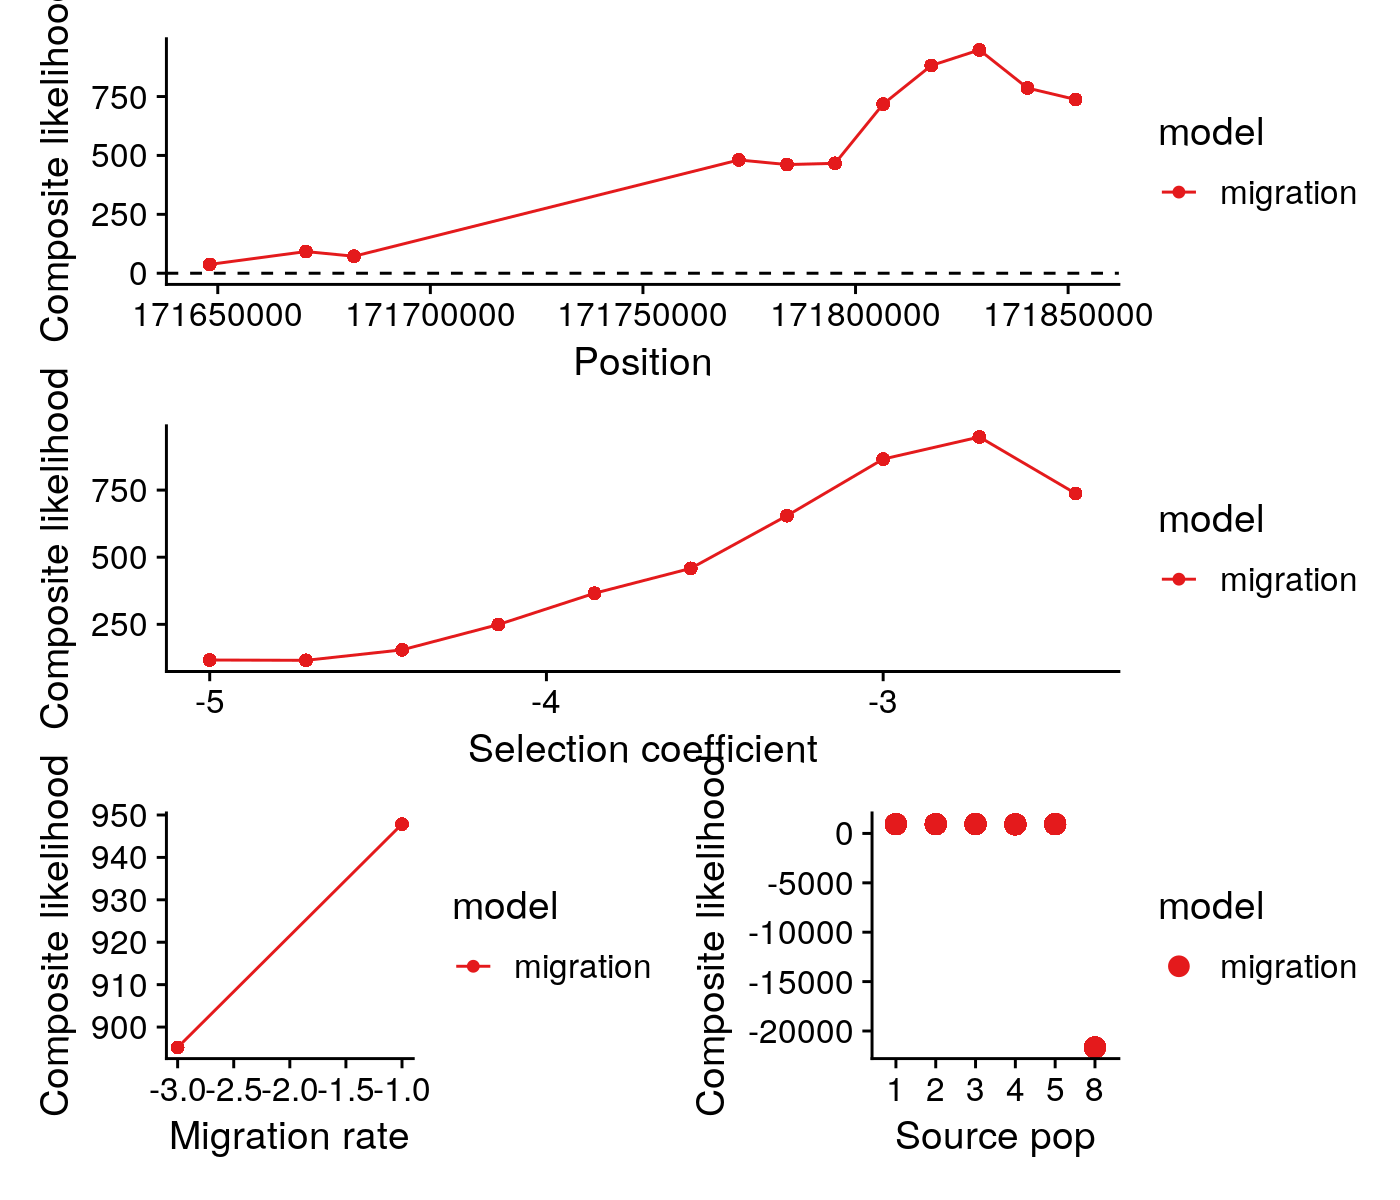

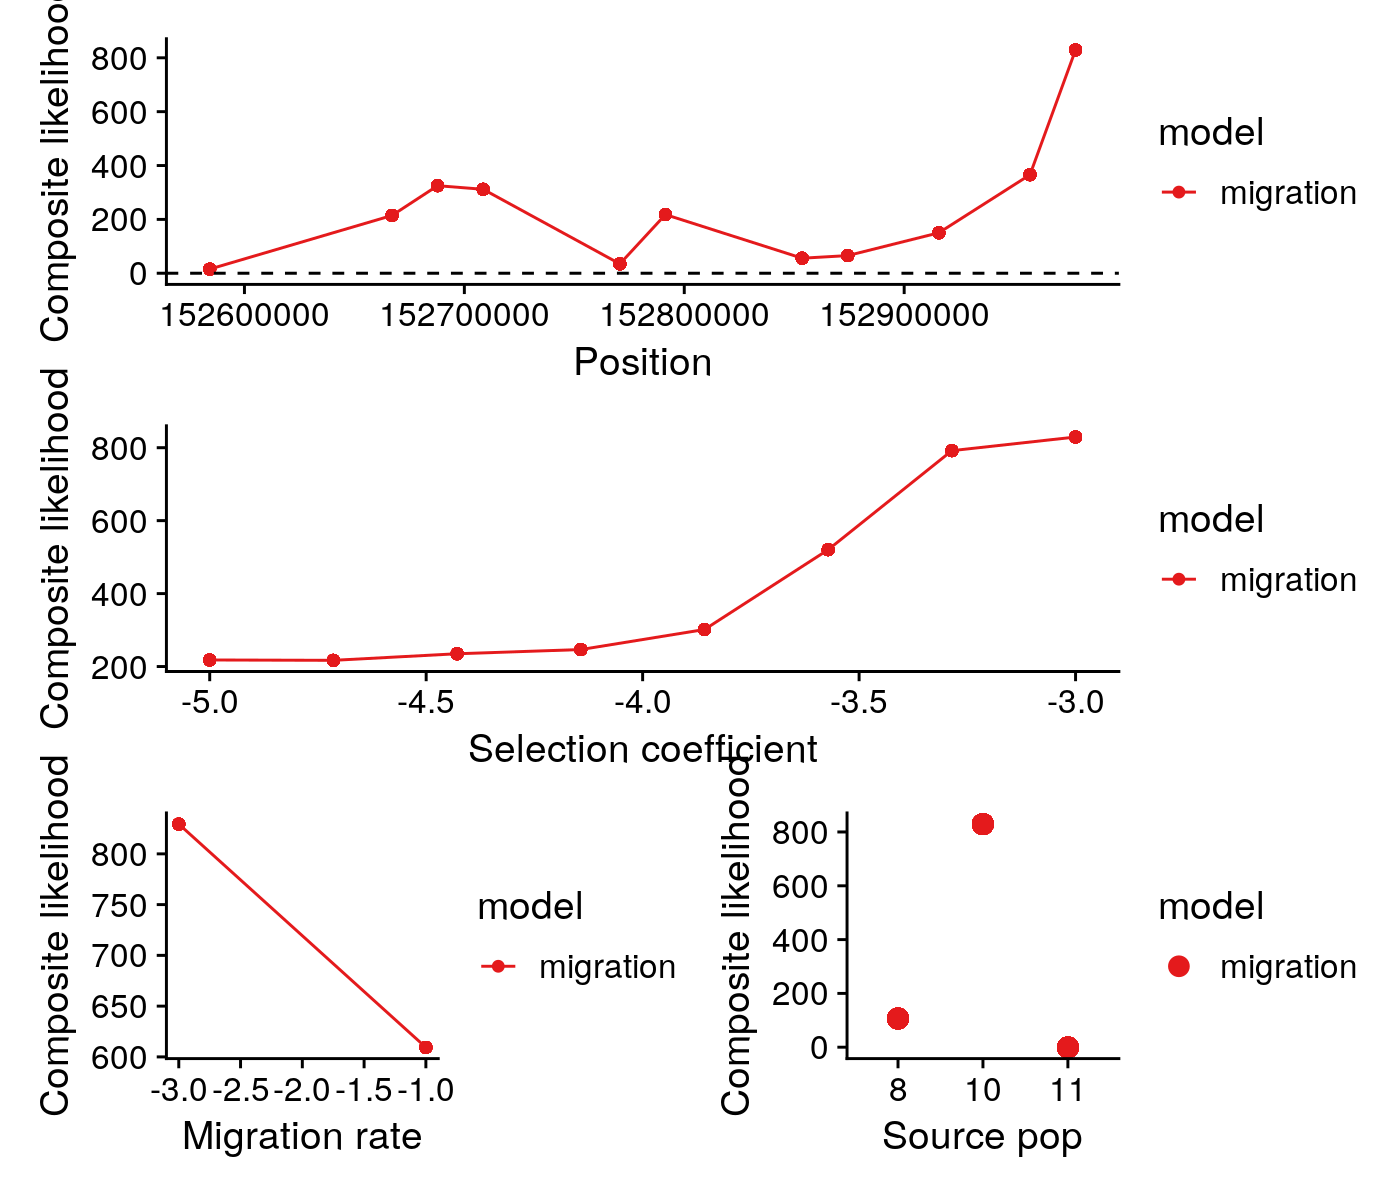

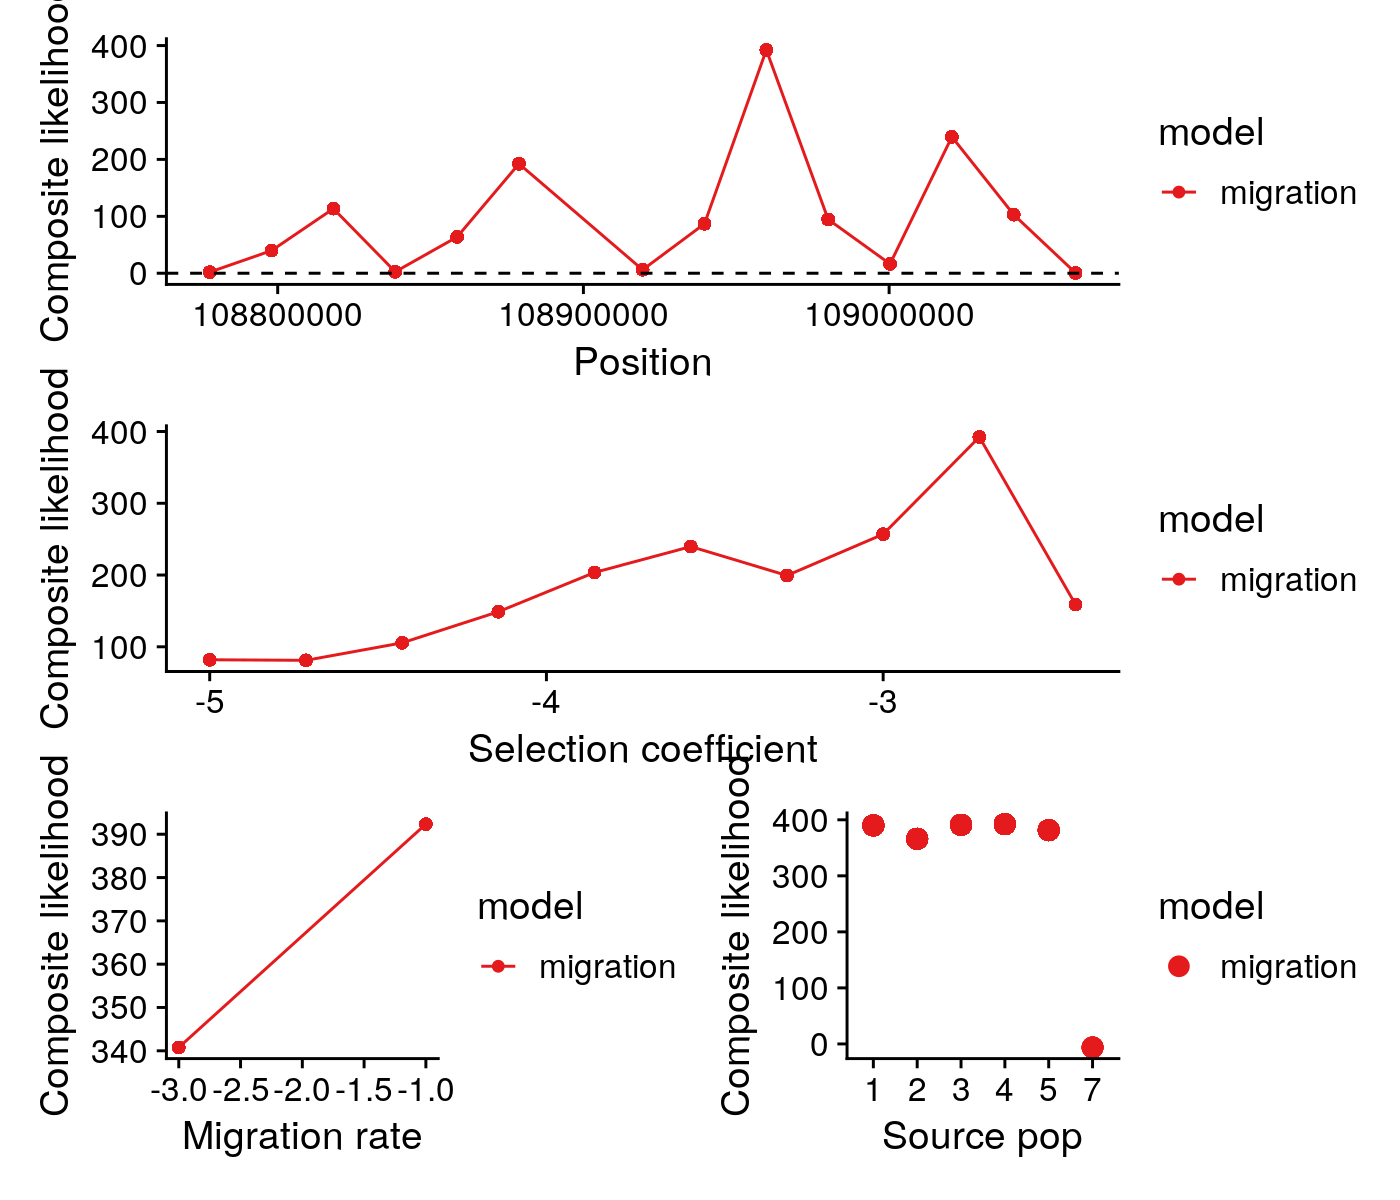

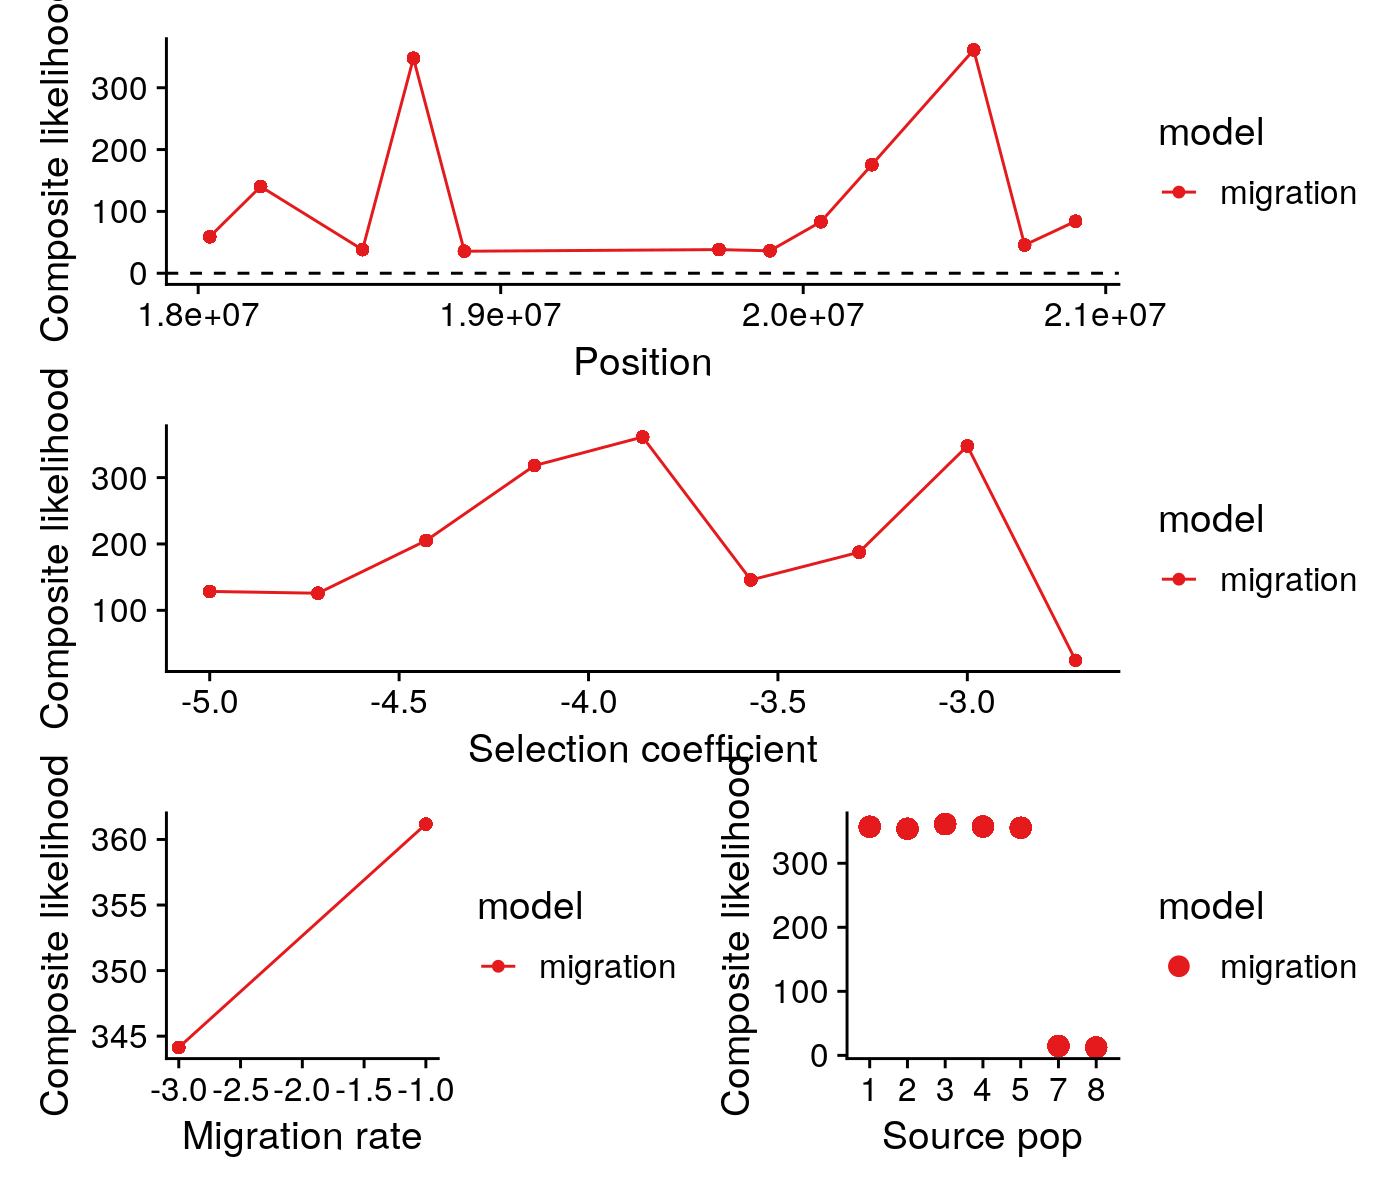

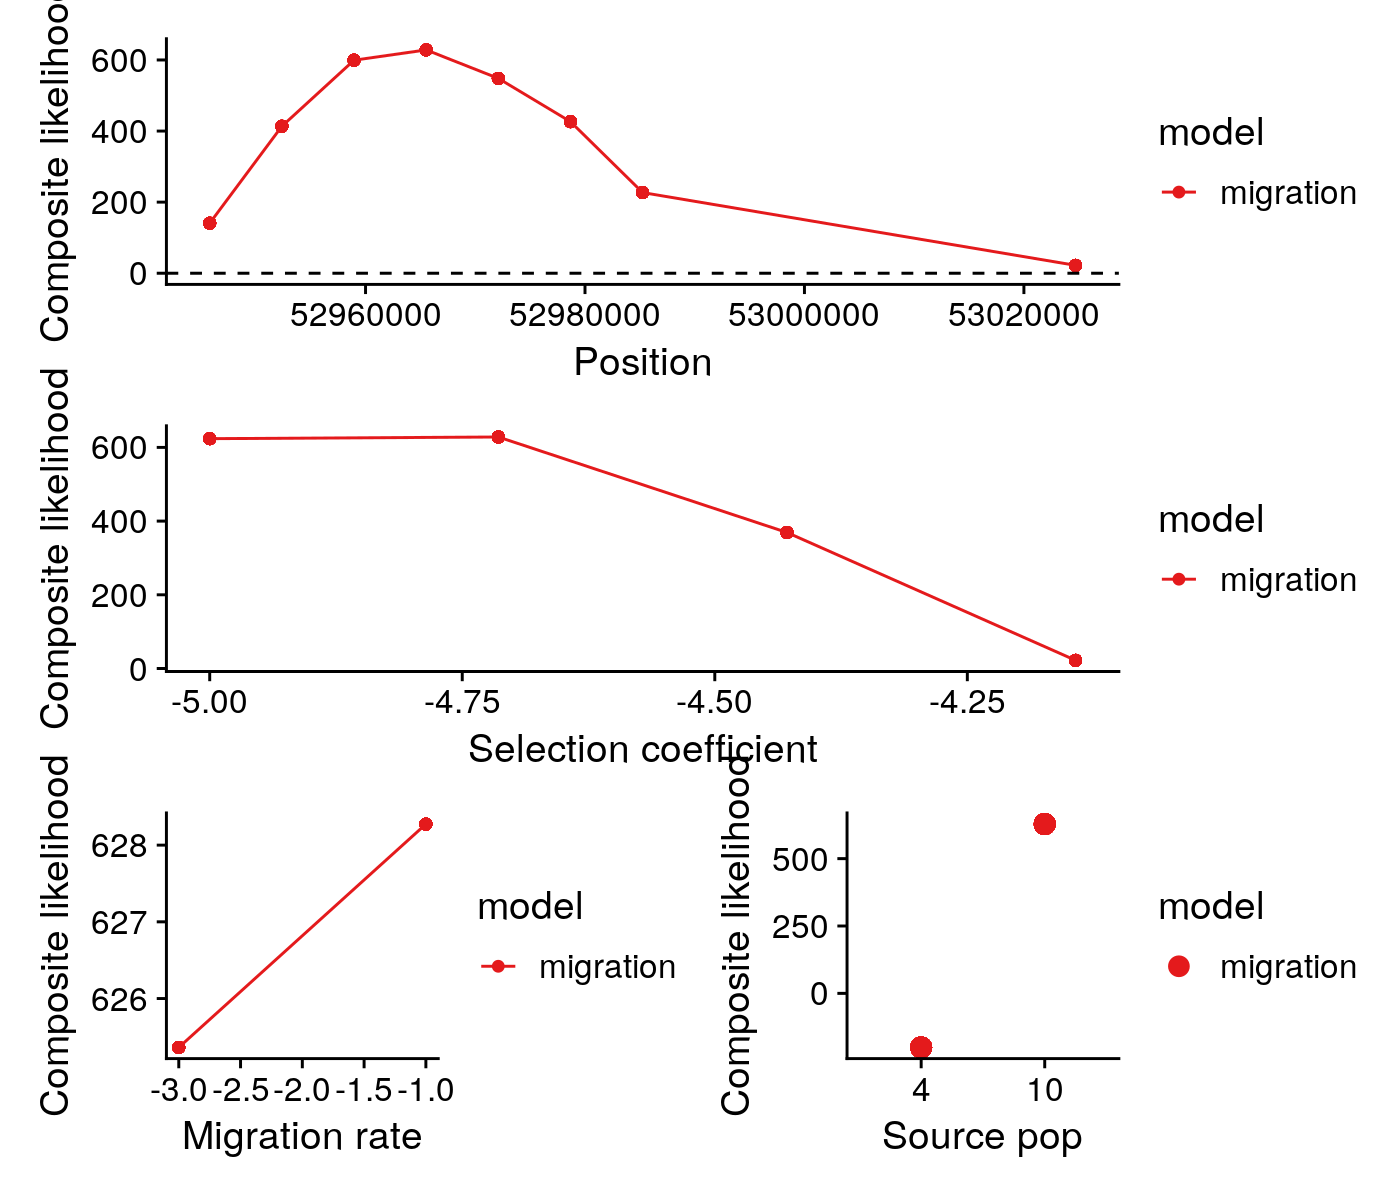

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


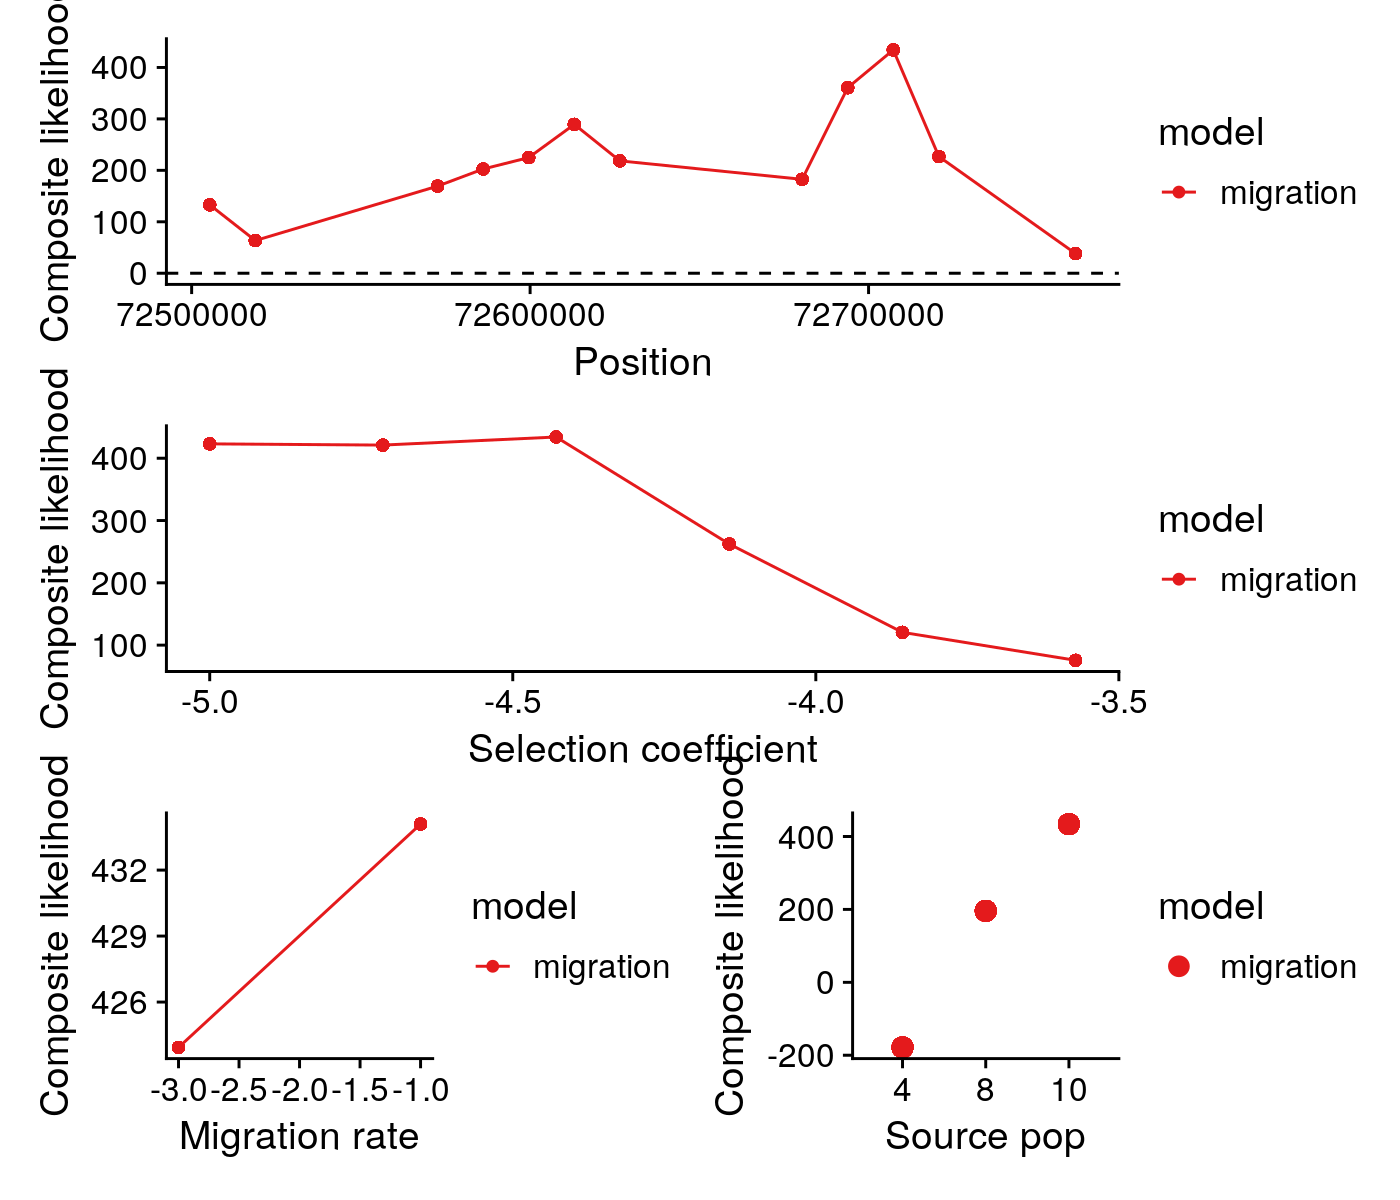

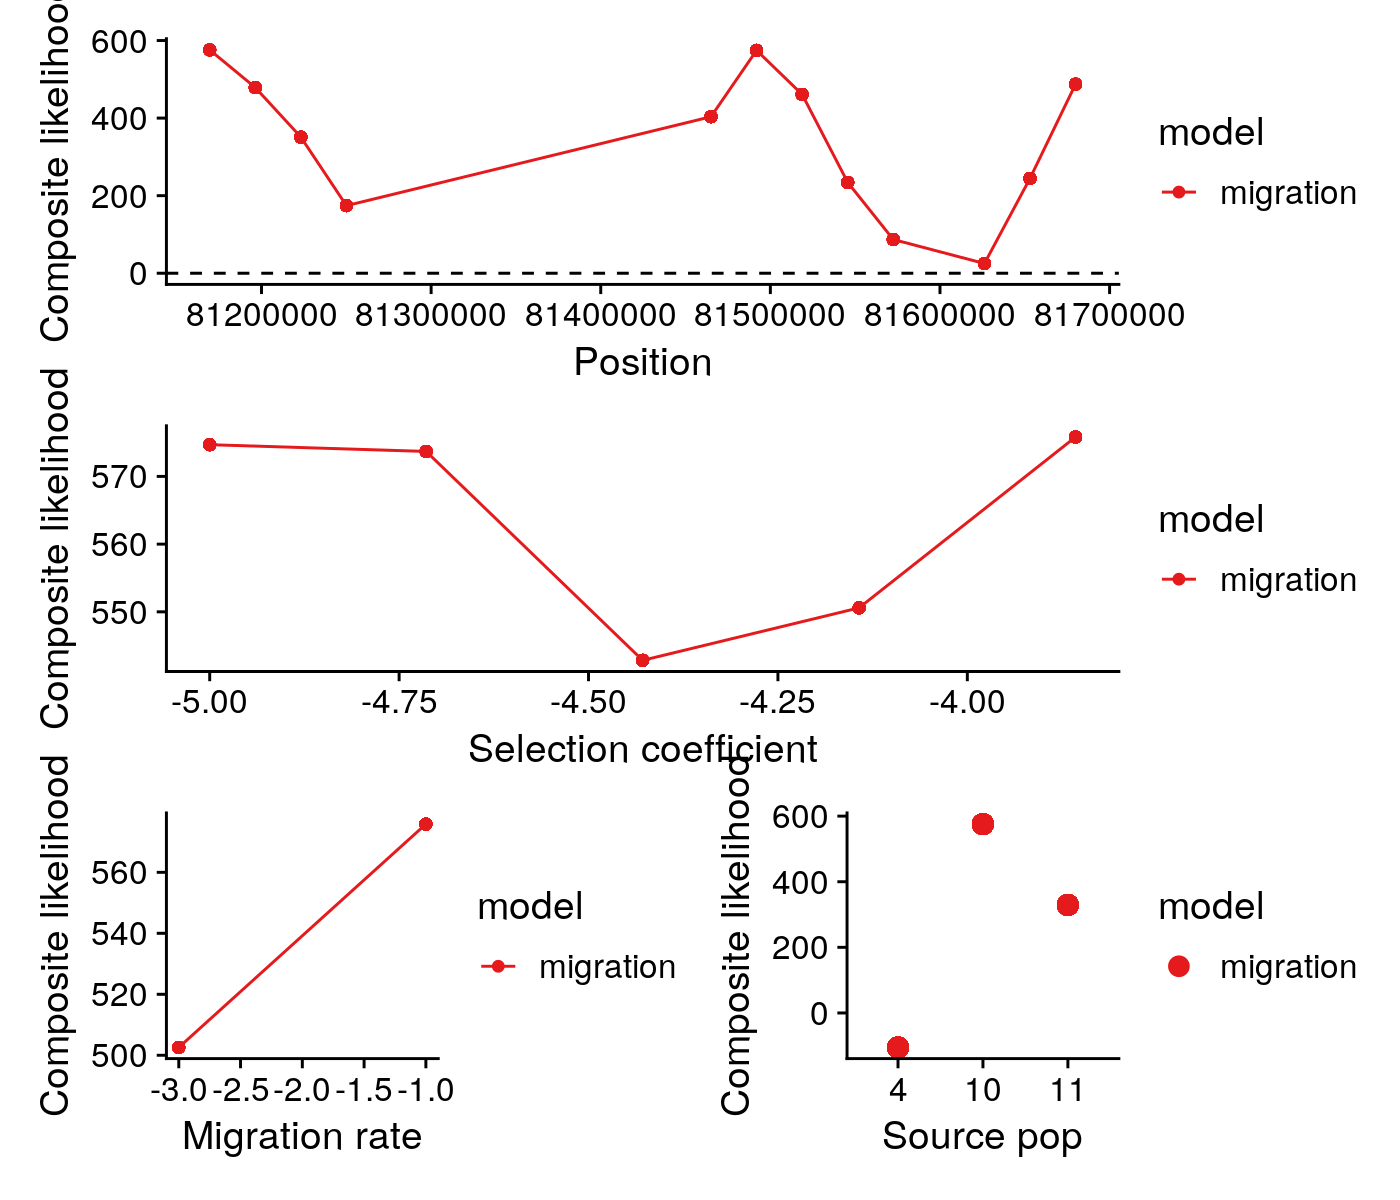

In [236]:
theme_set(cowplot::theme_cowplot())

lr_files <- top_models_df %>% filter(model2 != "neutral", sel_pops == "1-2-3-4-5", mcle > 10) %>% pull(file_name)

q_high <- quantile(top_models_df$mcle, 0.99)
top_files <- top_models_df %>% filter(model2 != "neutral", mcle > q_high) %>% pull(file_name)
length(top_files)
suppressMessages(map(top_files, ~ plot_rdmc(.x, cle_low = -5)))

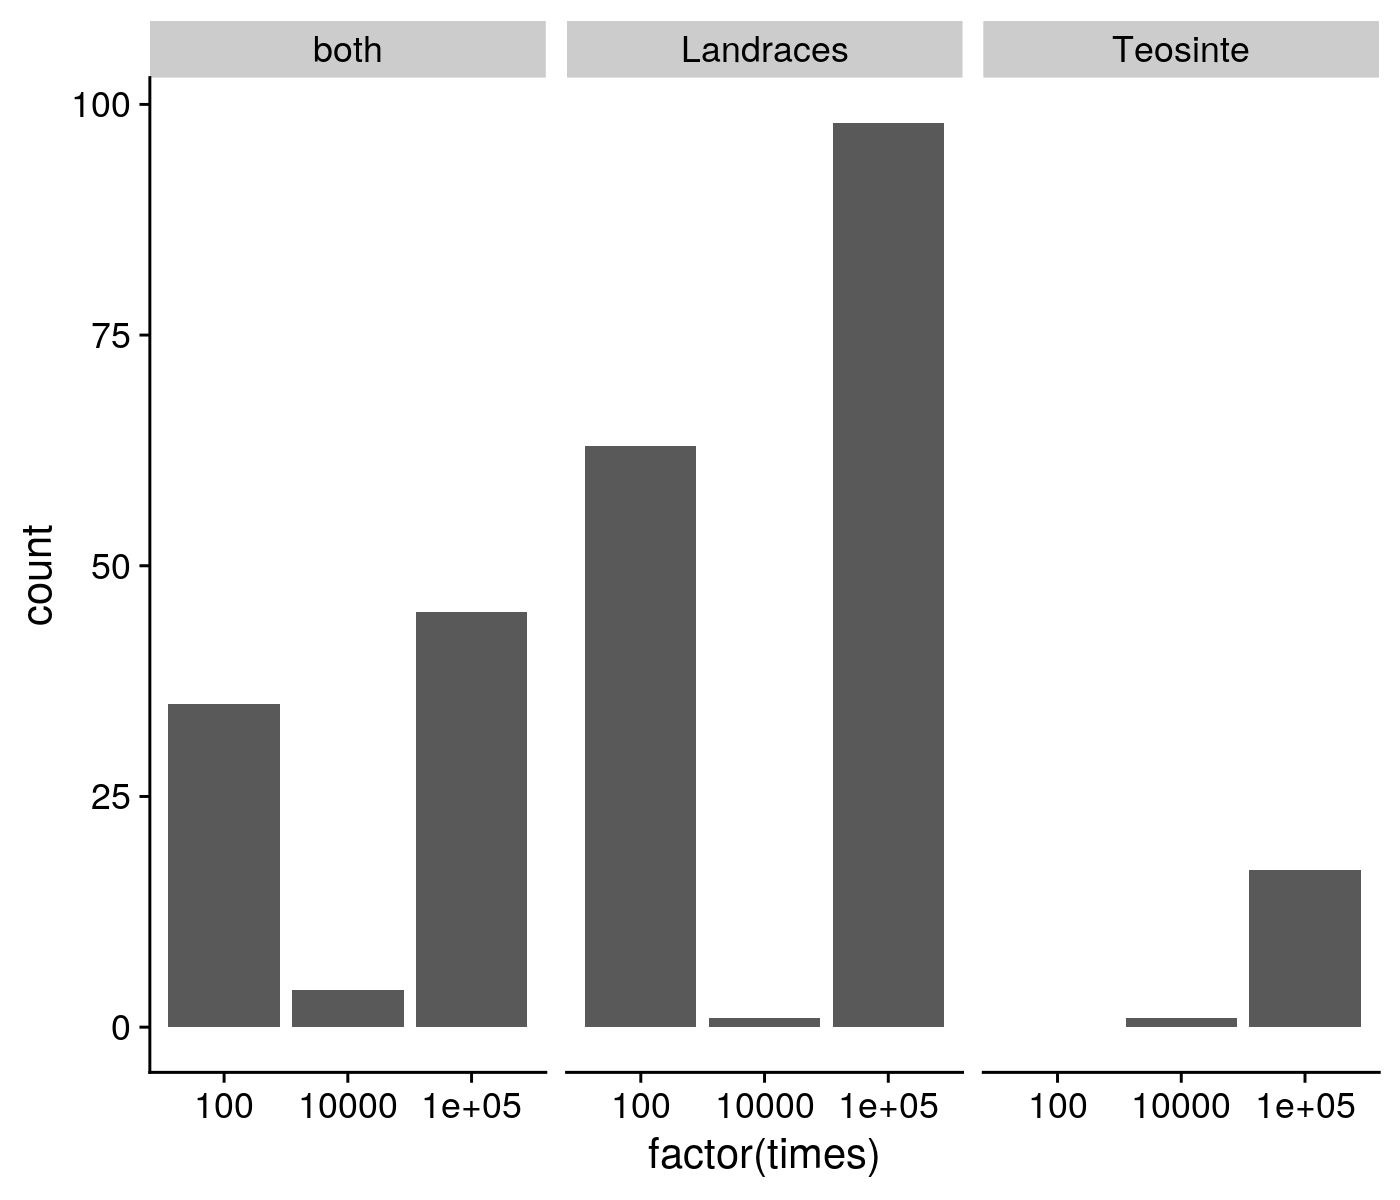

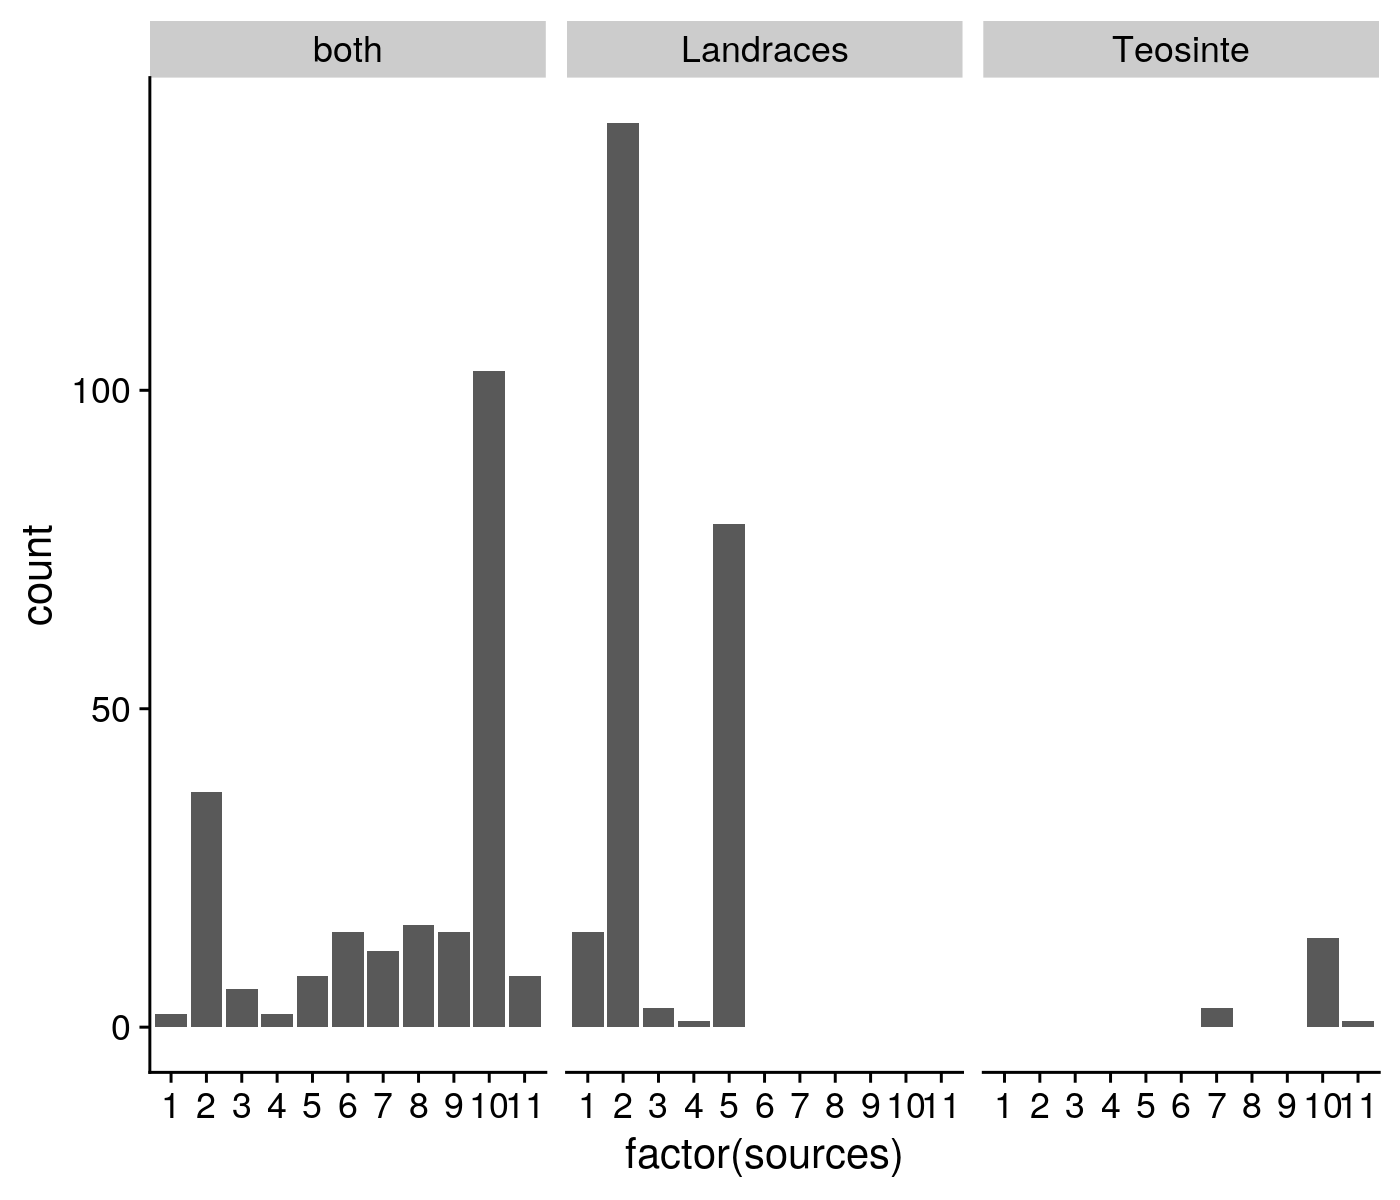

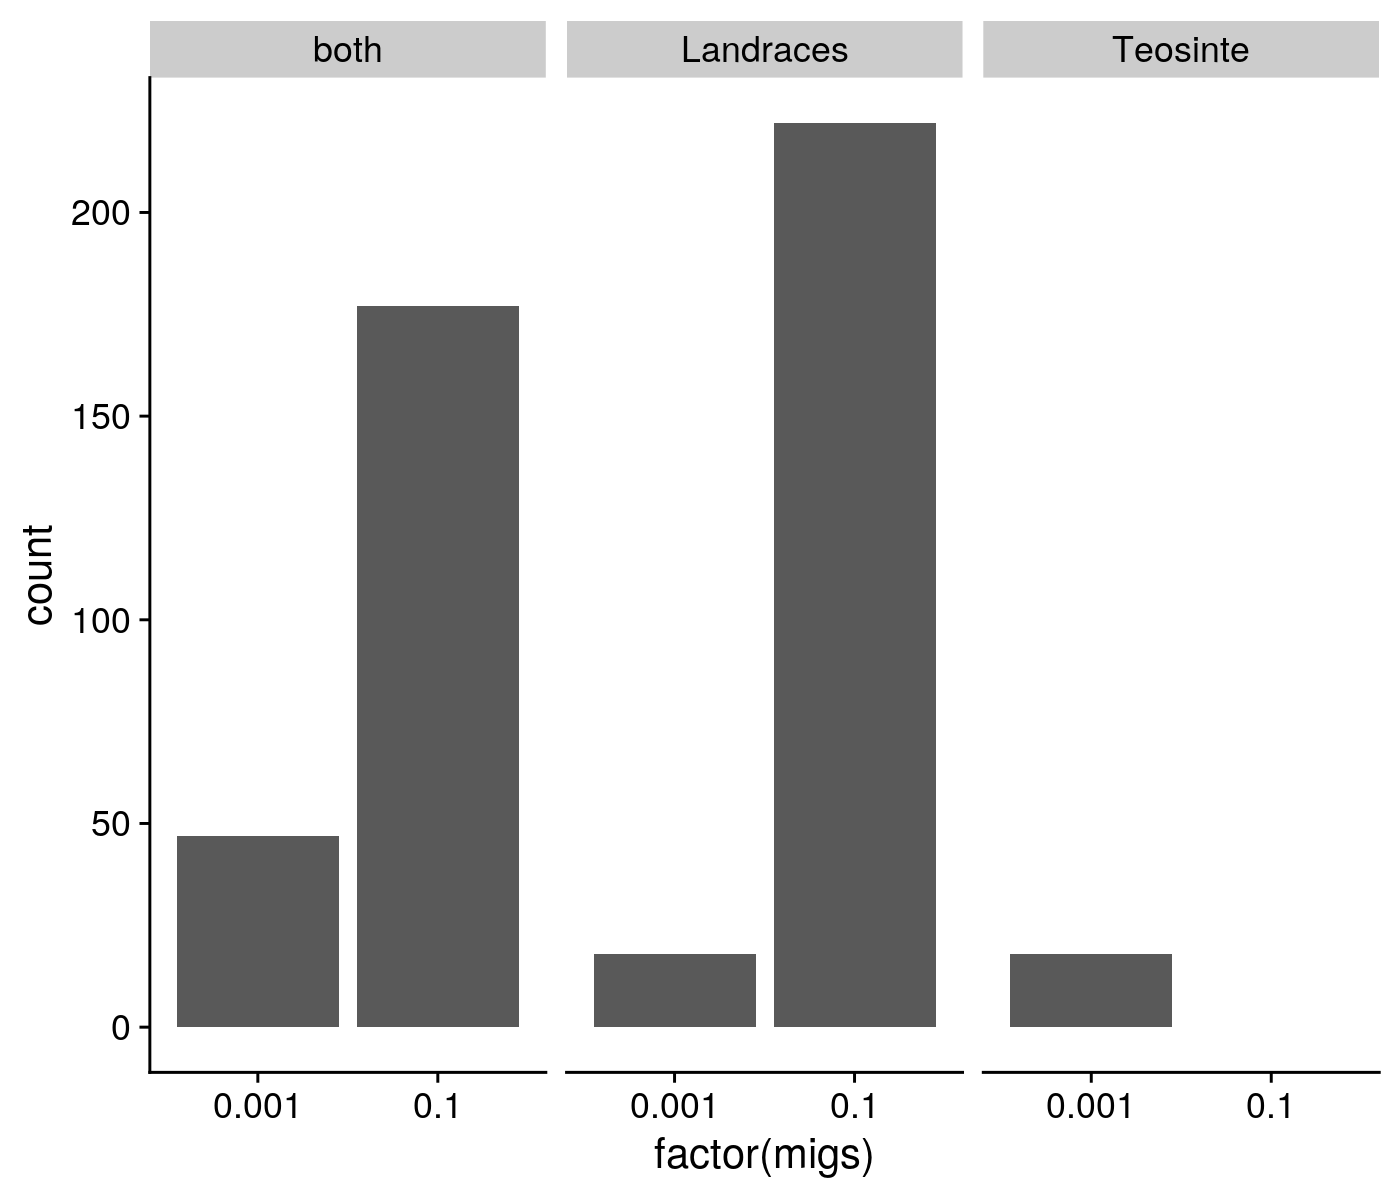

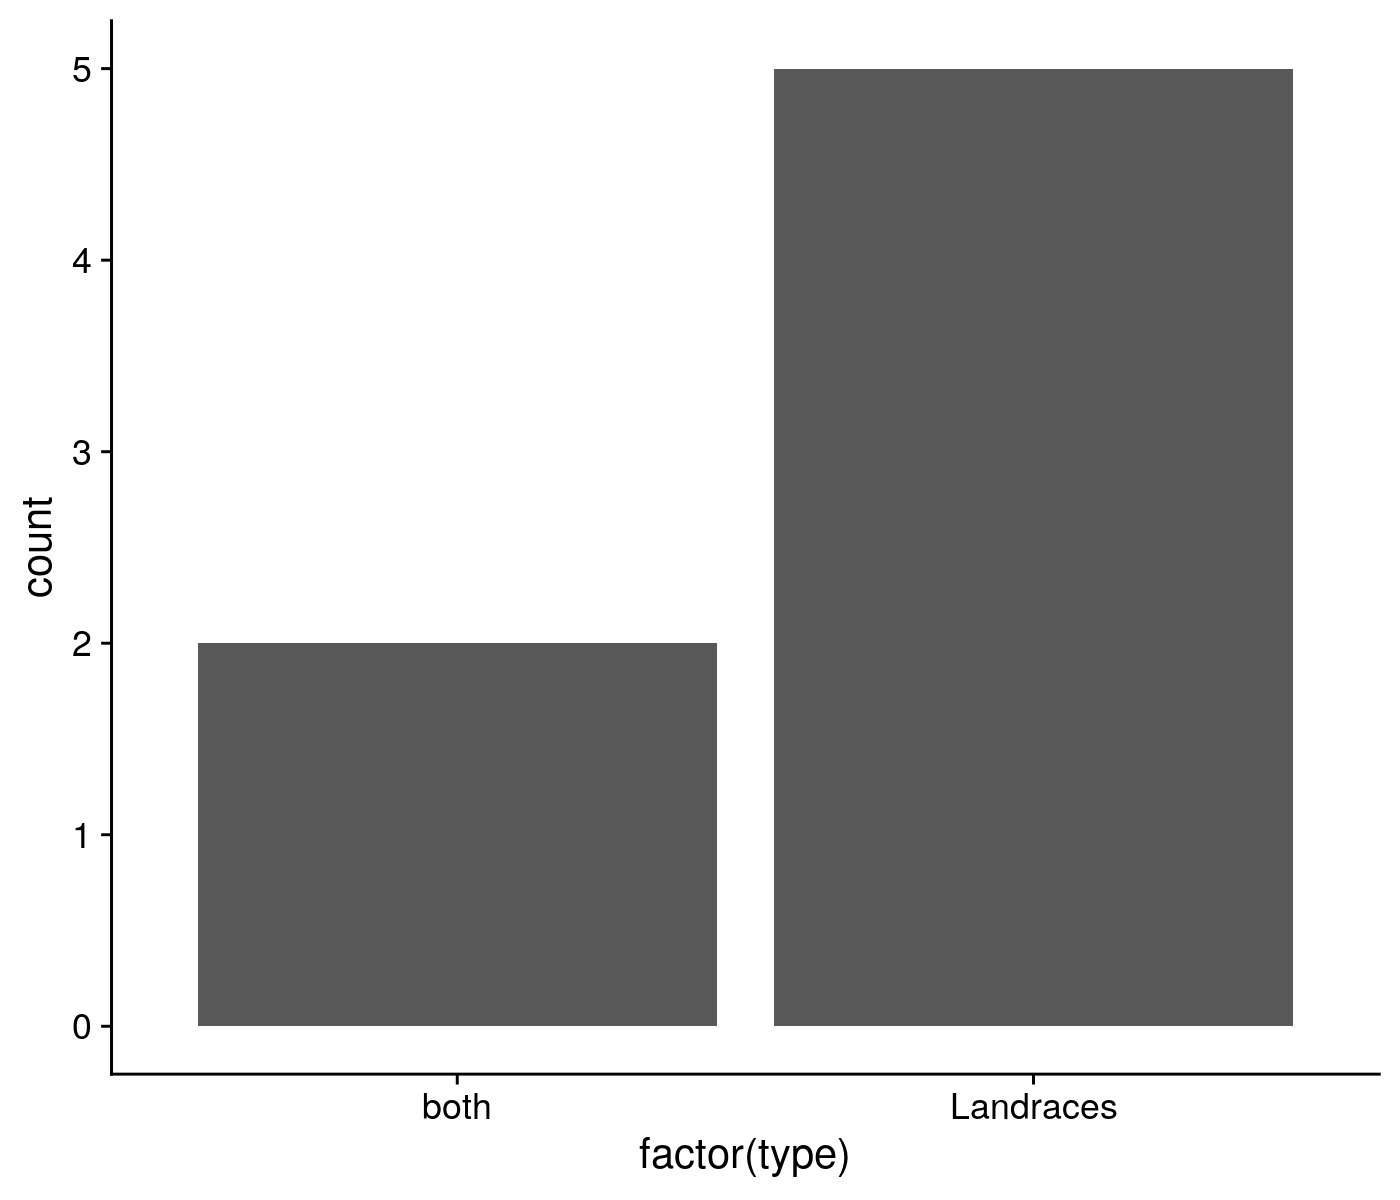

In [212]:
top_models_df %>%
    filter(model2 == "standing") %>% 
    ggplot(aes(factor(times))) +
    geom_bar(stat = "count") +
    facet_wrap(~type)


top_models_df %>%
    filter(model2 == "migration") %>% 
    ggplot(aes(factor(sources))) +
    geom_bar(stat = "count") +
    facet_wrap(~type)


top_models_df %>%
    filter(model2 == "migration") %>% 
    ggplot(aes(factor(migs))) +
    geom_bar(stat = "count") +
    facet_wrap(~type)


top_models_df %>%
    filter(model2 == "independent") %>% 
    ggplot(aes(factor(type))) +
    geom_bar(stat = "count")



`summarise()` has grouped output by 'pop_count', 'times'. You can override using the `.groups` argument.



selected_sites sels         cle      
1 100256512      1.000000e-05  40097.89
2 100501882      1.000000e-05  81872.35
3  10409697      5.179475e-04  51629.09
4 105232307      1.000000e-05  65623.18
5 105783517      3.727594e-05 187694.87
6 113057872      1.000000e-05 130367.31
  locus                                                                                         
1 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start100197055_end100282945_pops2-4-5.txt  
2 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start100393279_end100636254_pops1-4-5.txt  
3 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start10382710_end10518322_pops1-2-3-4-5.txt
4 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start105182522_end105338183_pops3-5.txt    
5 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start105341513_end106181745_pops3-4-5.txt  
6 data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start112913522_end113373779_pops4-5.txt    
  gs    times migs sources sel_pops  model     ⋯ sweep_size_bp mcle         
1 0.001 1e+02  NA  NA      2-4-5     standing  ⋯  85890        -2.123843e-03
2 0.001 1e+02  NA  NA      1-4-5     standing  ⋯ 242975        -2.117842e-06
3    NA    NA 0.1   2      1-2-3-4-5 migration ⋯ 135612         5.571110e+00
4 0.001 1e+02  NA  NA      3-5       standing  ⋯ 155661        -3.473438e+00
5 0.010 1e+02  NA  NA      3-4-5     standing  ⋯ 840232         1.450207e-01
6 0.001 1e+05  NA  NA      4-5       standing  ⋯ 460257         1.039854e-01
  mcle_delta
1 0         
2 0         
3 0         
4 0         
5 0         
6 0         
  file_name                                                                                   
1 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start100197055_end100282945_pops2-4-5.txt  
2 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start100393279_end100636254_pops1-4-5.txt  
3 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start10382710_end10518322_pops1-2-3-4-5.txt
4 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start105182522_end105338183_pops3-5.txt    
5 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start105341513_end106181745_pops3-4-5.txt  
6 ../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start112913522_end113373779_pops4-5.txt    
  populations                                                                                                               
1 v5--LR--Crucero_Lagunitas; v5--LR--RANDOM1_Palmar_Chico; v5--LR--San_Lorenzo                                              
2 v5--LR--Amatlan_de_Canas; v5--LR--RANDOM1_Palmar_Chico; v5--LR--San_Lorenzo                                               
3 v5--LR--Amatlan_de_Canas; v5--LR--Crucero_Lagunitas; v5--LR--Los_Guajes; v5--LR--RANDOM1_Palmar_Chico; v5--LR--San_Lorenzo
4 v5--LR--Los_Guajes; v5--LR--San_Lorenzo                                                                                   
5 v5--LR--Los_Guajes; v5--LR--RANDOM1_Palmar_Chico; v5--LR--San_Lorenzo                                                     
6 v5--LR--RANDOM1_Palmar_Chico; v5--LR--San_Lorenzo                                                                         
  type      pop_count Landraces_count Teosinte_count model2   
1 Landraces 3         3               0              neutral  
2 Landraces 3         3               0              neutral  
3 Landraces 5         5               0              migration
4 Landraces 2         2               0              neutral  
5 Landraces 3         3               0              standing 
6 Landraces 2         2               0              standing

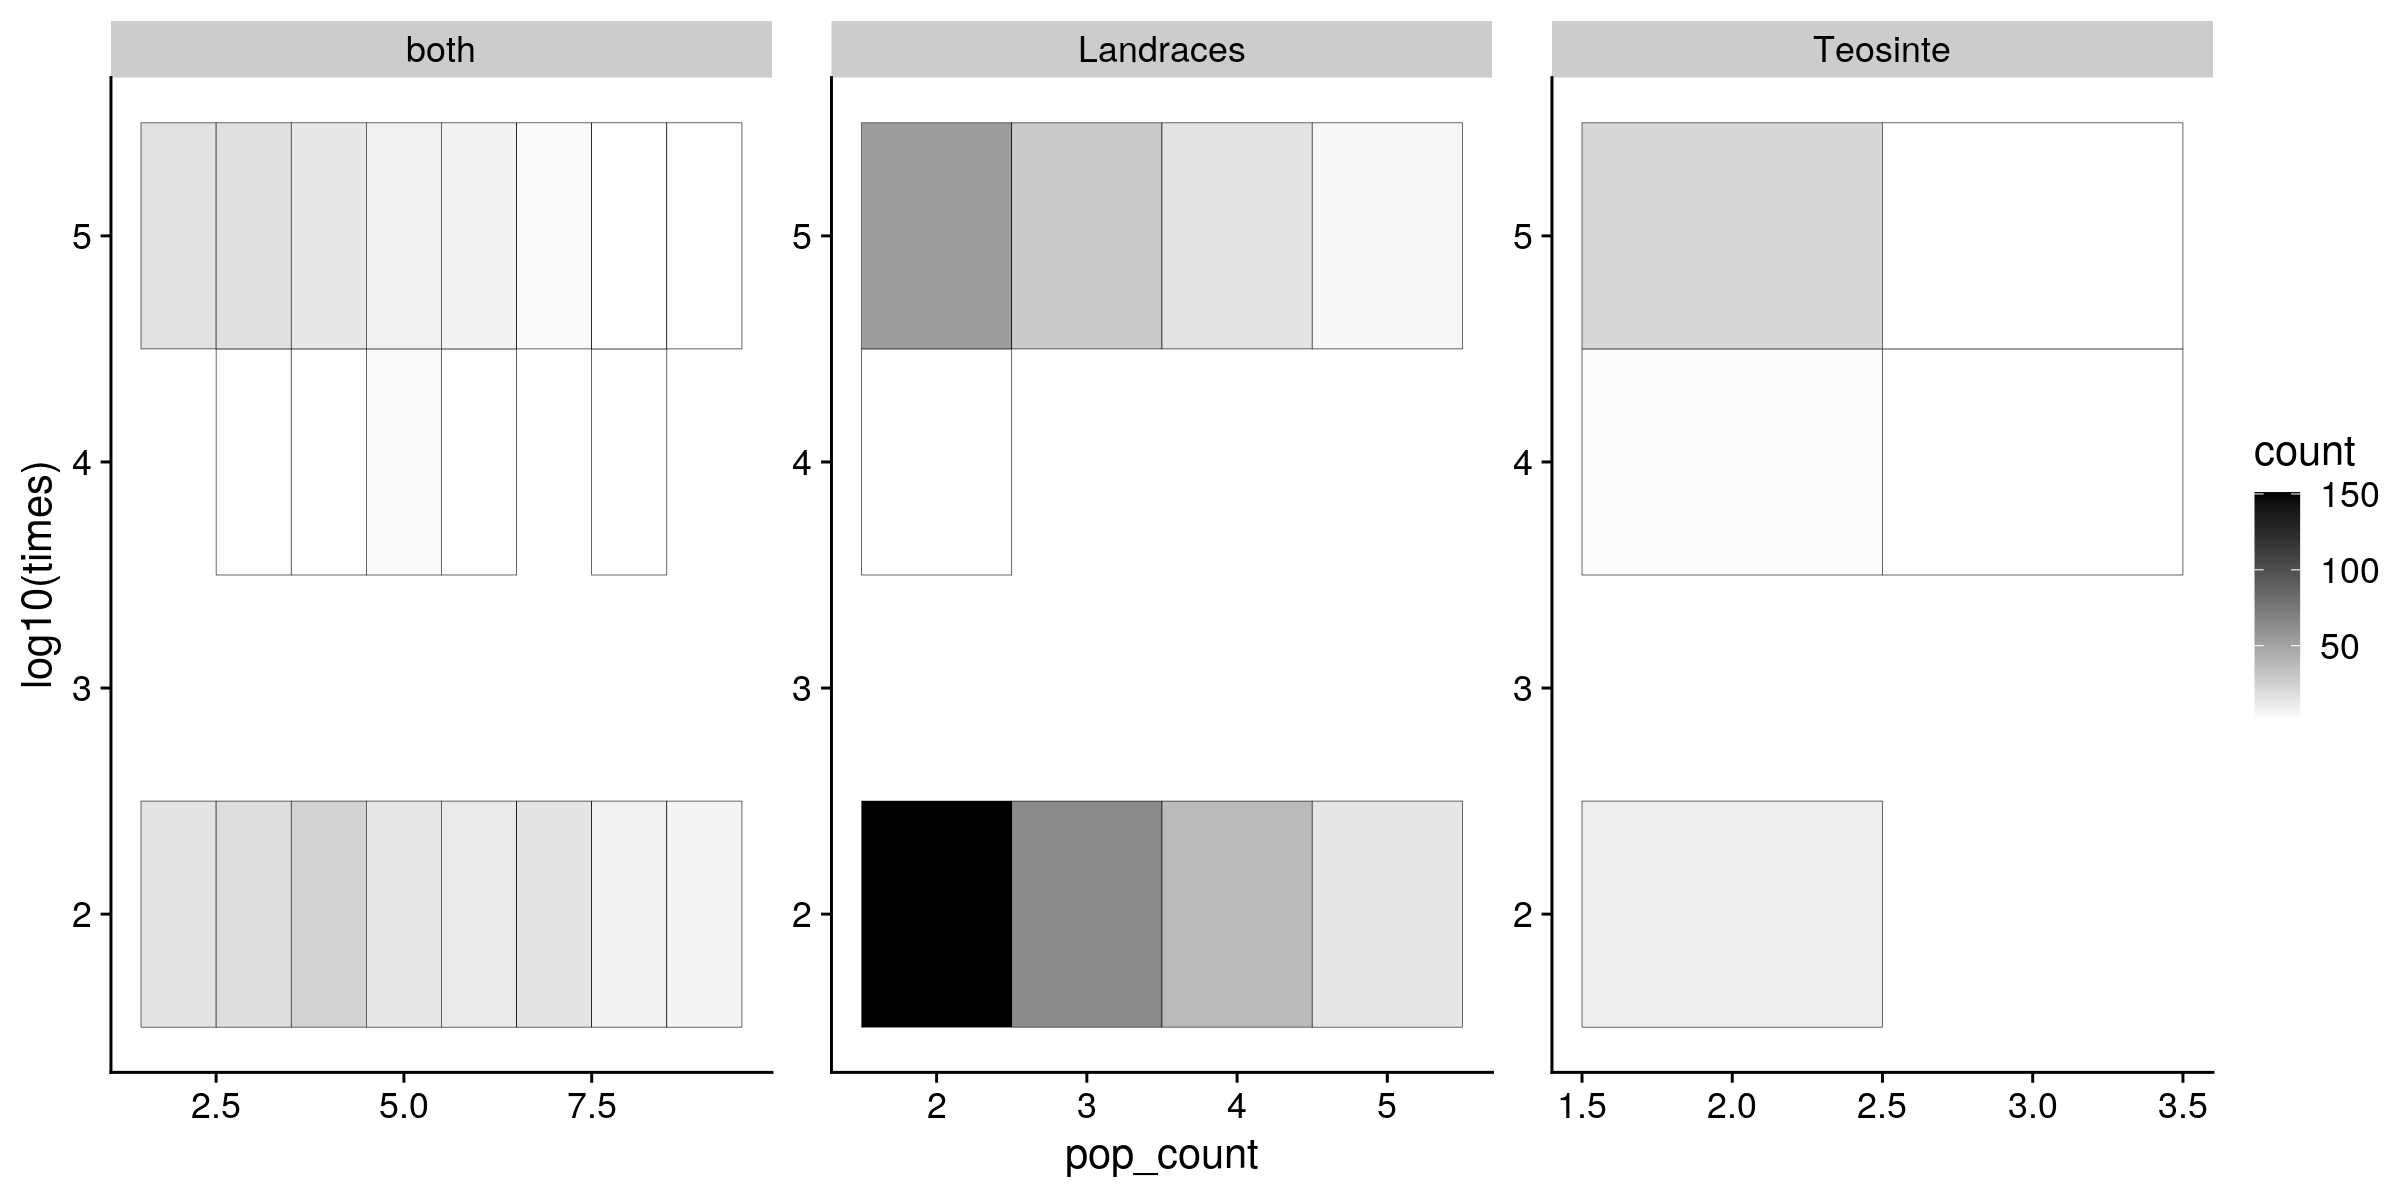

In [180]:
options(repr.plot.width = 12, repr.plot.height = 6 , repr.plot.res = 200)

top_models_df %>% 
    select(pop_count, times, type) %>% 
    drop_na() %>% 
    group_by(pop_count, times, type) %>% 
    summarise(count = n()) %>% 
    ggplot(aes(pop_count, log10(times), fill = count)) +
    geom_tile(color = "black") +
    facet_wrap(~type, scales = "free") +
    scale_fill_gradient(low = "white", high = "black")

head(top_models_df)

In [181]:
grep("RANDOM2", top_models_df$populations)

integer(0)

`summarise()` has grouped output by 'Landraces_count'. You can override using the `.groups` argument.



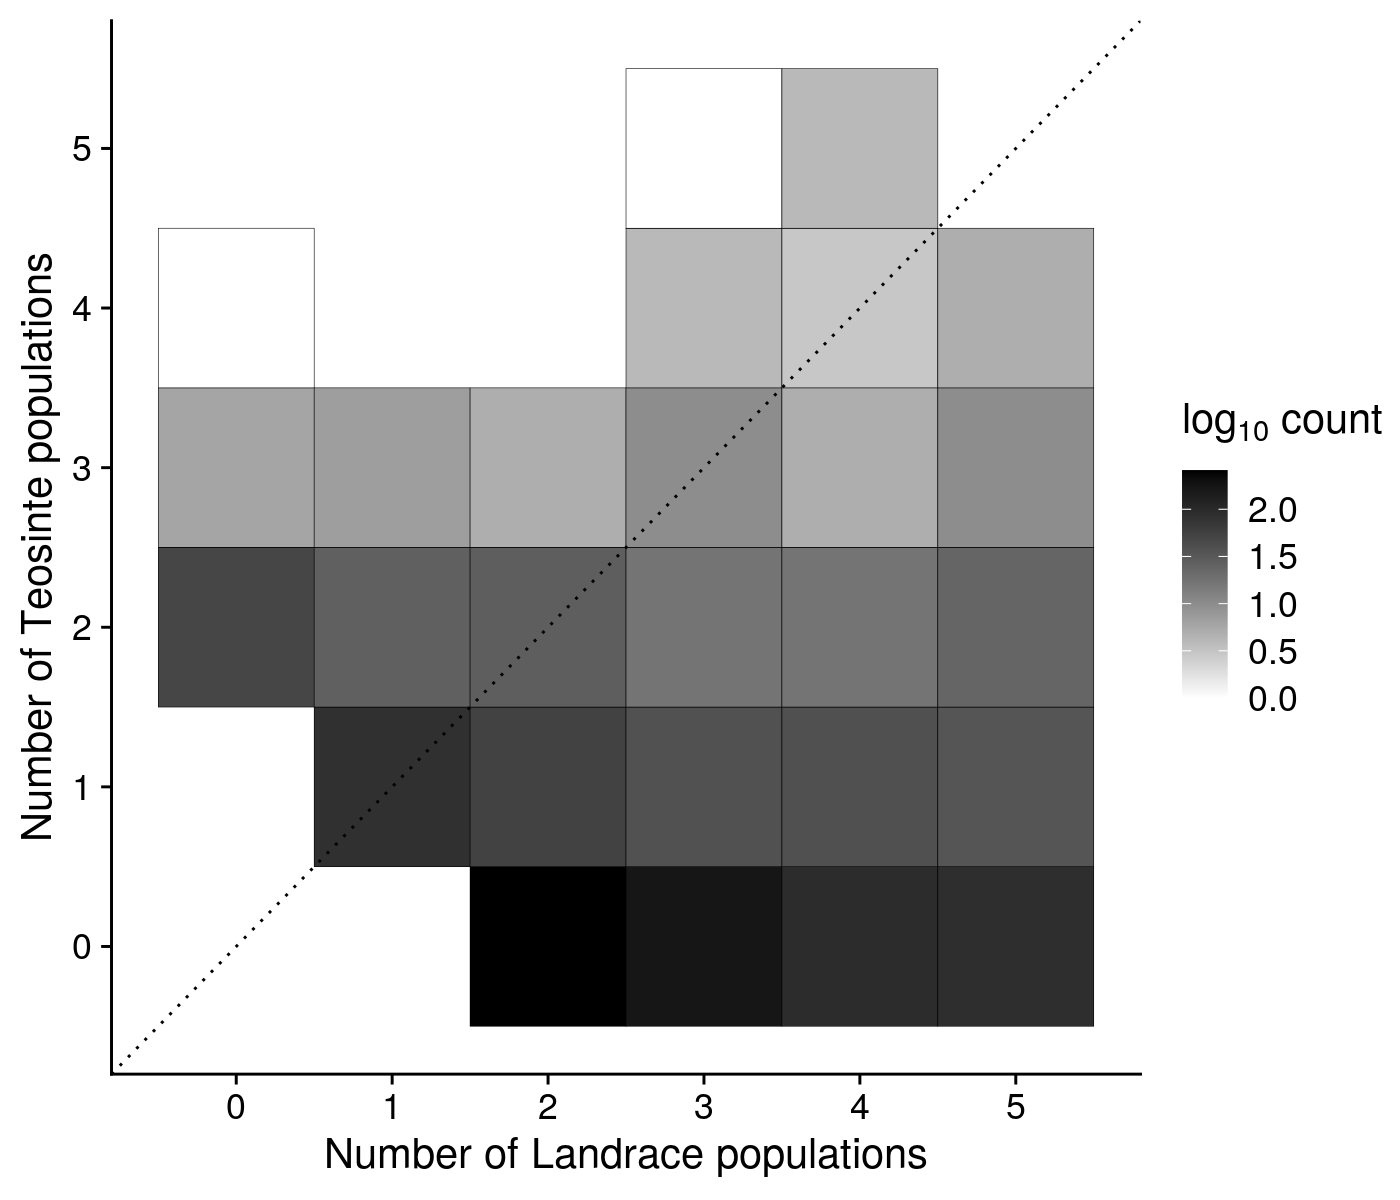

In [182]:
options(repr.plot.width = 7, repr.plot.height = 6 , repr.plot.res = 200)


shareplot <- top_models_df %>%
    mutate(
        pop_count = str_count(populations, ",")+1,
        Landraces_count = str_count(populations, "LR"),
        Teosinte_count =  str_count(populations, "Teo")        
        ) %>% 
    filter(Landraces_count != 0 | Teosinte_count != 0) %>%
    group_by(Landraces_count, Teosinte_count) %>% 
    summarise(type_count = n()) %>% 
    ggplot(aes(Landraces_count, Teosinte_count, fill = log10(type_count))) +
    geom_tile(color = "black") +
    scale_fill_gradient(low = "white", high = "black") +
    scale_y_continuous(breaks = 0:8) +
    scale_x_continuous(breaks = 0:8) +
    geom_abline(intercept = 0, slope = 1, lty = 3) +
    xlab("Number of Landrace populations") +
    ylab("Number of Teosinte populations") +
    labs(fill = expression(paste(log[10], " count")))
    
shareplot

# STILL A MESS BELOW HERE

pop1                     pop2                        
1 v5--LR--Amatlan_de_Canas v5--LR--Crucero_Lagunitas   
2 v5--LR--Amatlan_de_Canas v5--LR--Los_Guajes          
3 v5--LR--Amatlan_de_Canas v5--LR--random1_Palmar_Chico
4 v5--LR--Amatlan_de_Canas v5--LR--San_Lorenzo         
5 v5--LR--Amatlan_de_Canas v5--Teo--Amatlan_de_Canas   
6 v5--LR--Amatlan_de_Canas v5--Teo--Crucero_Lagunitas

pop                          count_pop1 count_pop2
1 v5--LR--Amatlan_de_Canas     621        621       
2 v5--LR--Crucero_Lagunitas    381        381       
3 v5--LR--Los_Guajes           562        562       
4 v5--LR--random1_Palmar_Chico   0          0       
5 v5--LR--San_Lorenzo          752        752       
6 v5--Teo--Amatlan_de_Canas     70         70

pop1 pop2 share_count type

type      total_sweeps
1 both      1092        
2 Landraces  616        
3 Teosinte    57

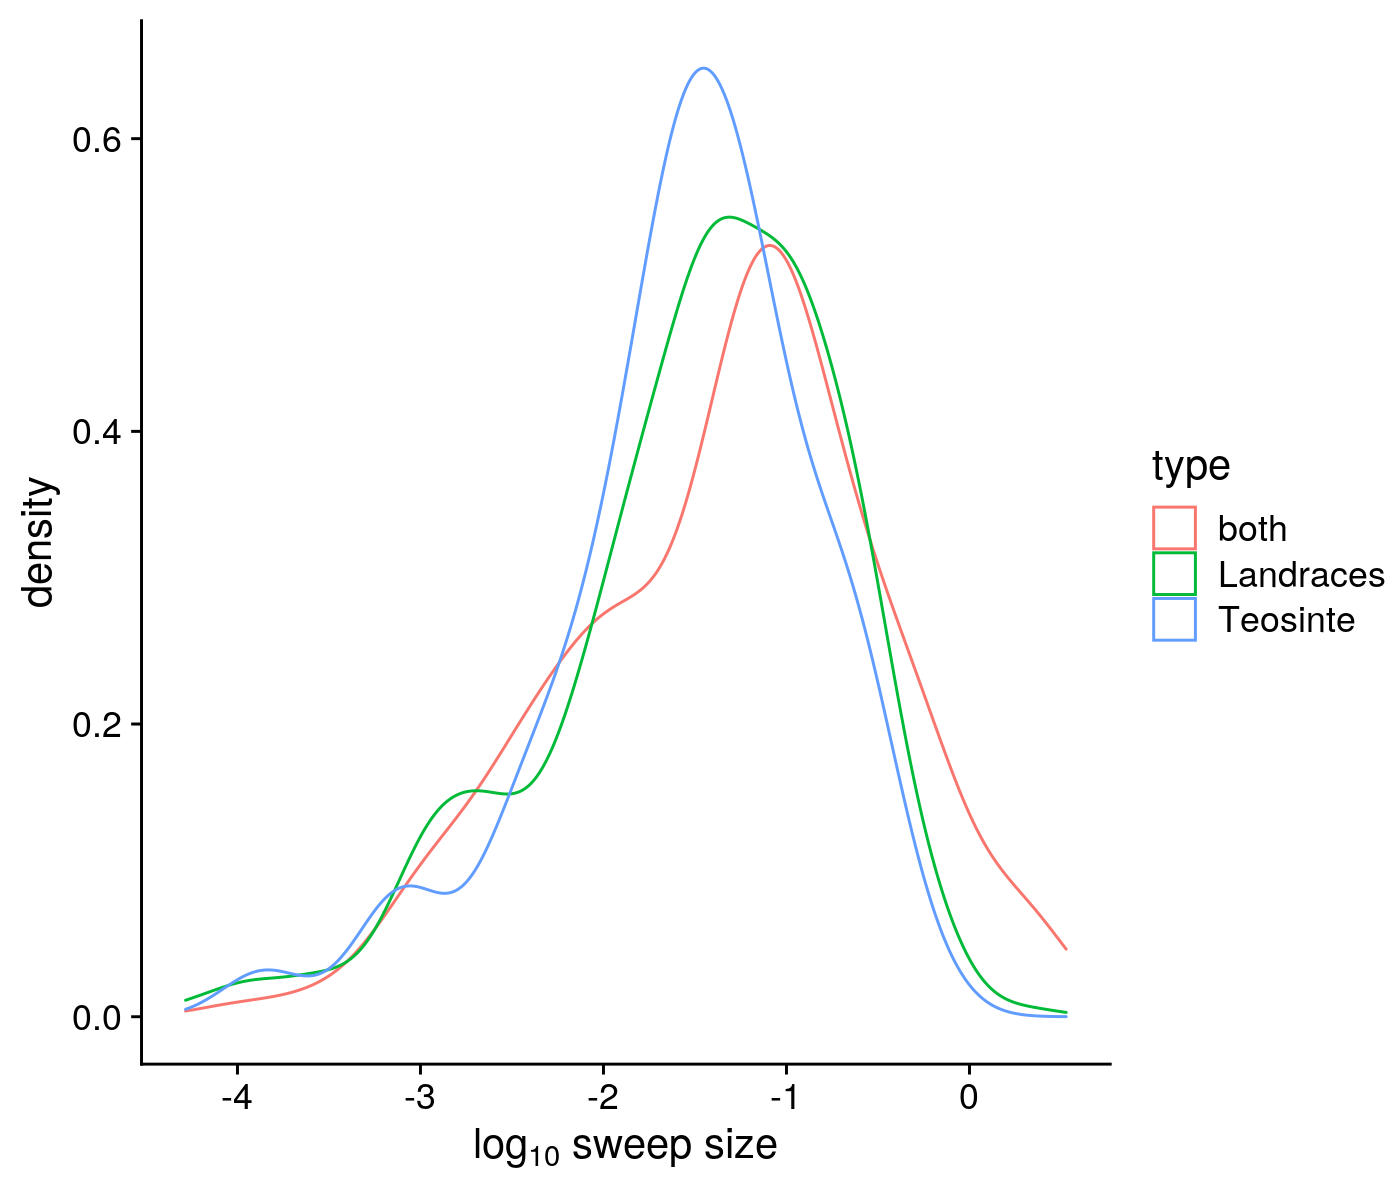

pop                          count_pop1 count_pop2
1 v5--LR--Amatlan_de_Canas     621        621       
2 v5--LR--Crucero_Lagunitas    381        381       
3 v5--LR--Los_Guajes           562        562       
4 v5--LR--random1_Palmar_Chico   0          0       
5 v5--LR--San_Lorenzo          752        752       
6 v5--Teo--Amatlan_de_Canas     70         70

pop1 pop2 share_count type

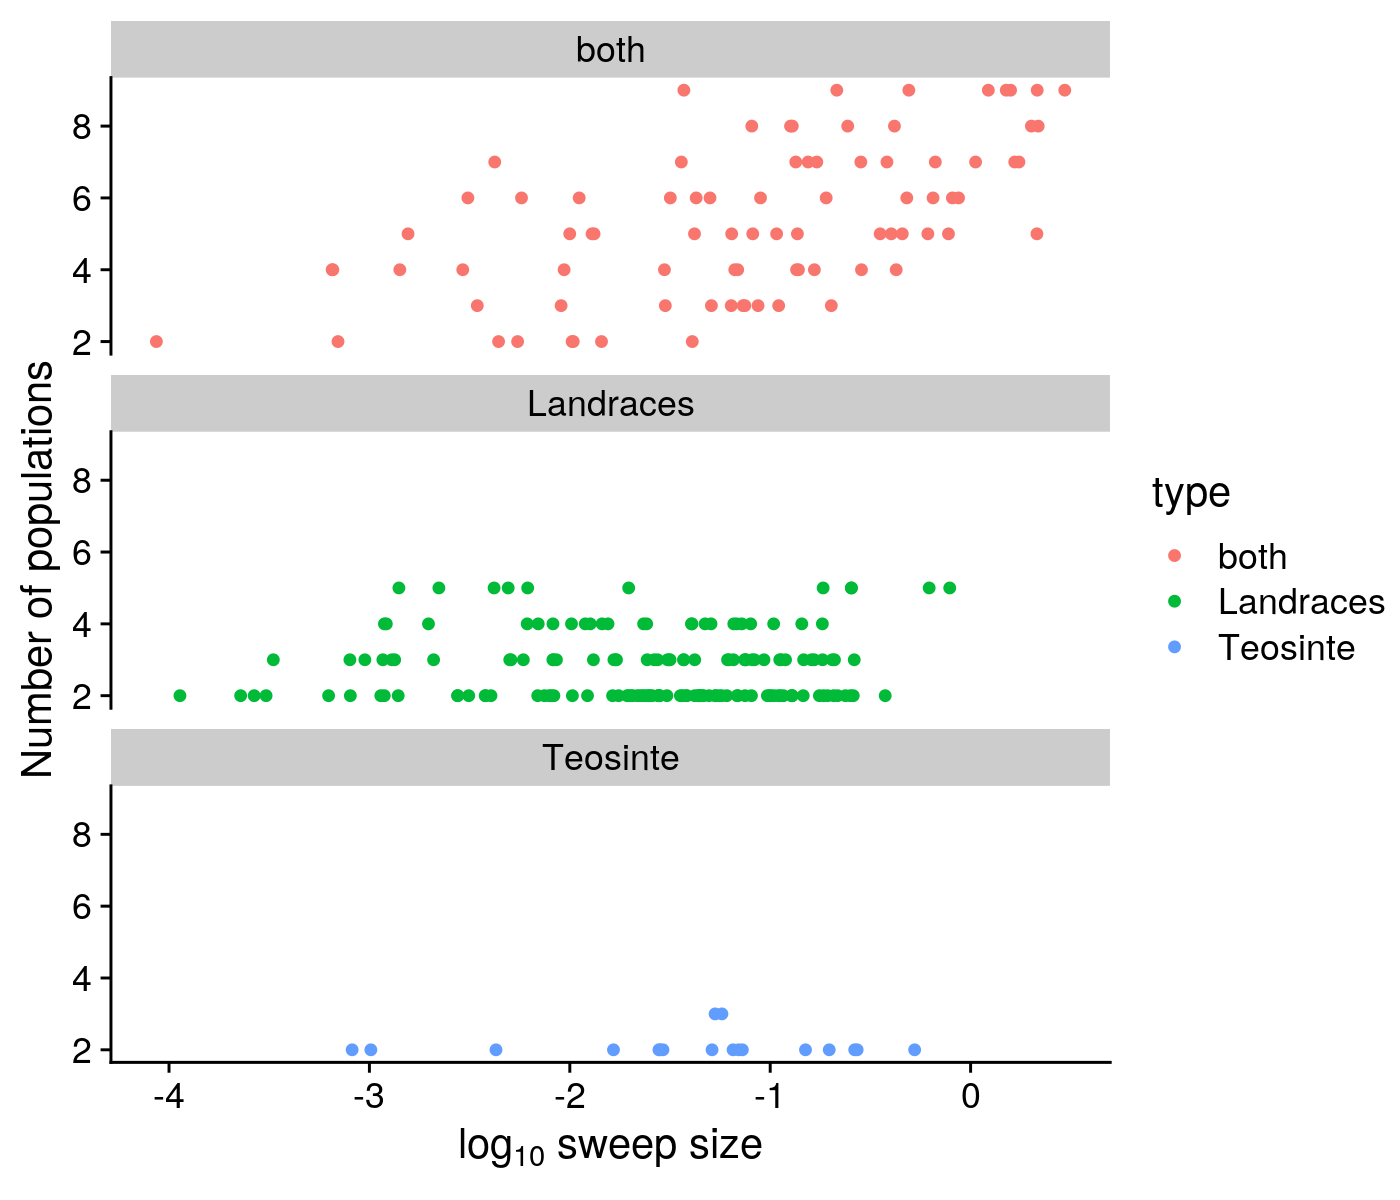

In [183]:
all_pops <- c(
    "v5--LR--Amatlan_de_Canas", 
    "v5--LR--Crucero_Lagunitas", 
    "v5--LR--Los_Guajes", 
    "v5--LR--random1_Palmar_Chico", 
    "v5--LR--San_Lorenzo", 
    "v5--Teo--Amatlan_de_Canas", 
    "v5--Teo--Crucero_Lagunitas", 
    "v5--Teo--El_Rodeo", 
    "v5--Teo--Los_Guajes", 
    "v5--Teo--random1_Palmar_Chico", 
    "v5--Teo--San_Lorenzo"
)

pop_pairs <- 
combn(all_pops, 2) %>% 
    t() %>% 
    data.frame() %>% 
    set_colnames(c("pop1", "pop2")) %>% 
    as_tibble() %>% 
    mutate(pop1 = str_replace_all(pop1, "random1", "RANDOM1"),
           pop2 = str_replace_all(pop2, "random2", "RANDOM2"))
head(pop_pairs)



pair_df <- 

c("both", "Teosinte", "Landraces") %>% 
map_df(~{
    pop_pairs %>%
        rowwise() %>% 
        pmap_df(function(pop1, pop2){

                share_count <- filter(top_models_df, grepl(pop1, populations), 
                                      grepl(pop2, populations), type == .x) %>% 
                nrow()
                if(share_count > 0){
                    tibble(pop1, pop2, share_count, type = .x)
                } else{
                    tibble()
                }
                
        })

    }) %>% 
    arrange(desc(share_count))


pop_count_df <- 
    all_pops %>% 
    map_df(~ {
        pcount <- filter(top_models_df, grepl(.x, populations)) %>% 
            nrow()
        tibble(pop = .x, count_pop1 = pcount, count_pop2 = pcount)
    })

head(pop_count_df)

pair_df %>% 
    filter(type == "Teosinte", grepl("LR", pop1), grepl("LR", pop2))


sweep_counts_df <- top_models_df %>% 
    group_by(type) %>% 
    summarise(total_sweeps = n()) %>%
    ungroup() %>% 
    mutate(total_sweeps = ifelse(type == "both", sum(.$total_sweeps), total_sweeps))
sweep_counts_df


top_models_df %>% 
    filter(pop_count > 1) %>% 
    ggplot(aes(log10(sweepsize_cM), colour = type)) +
    geom_density() +
    xlab(expression(paste(log[10], " sweep size")))


top_models_df %>% 
    filter(pop_count > 1, model2 %in% c("migration, independent", "standing")) %>% 
    ggplot(aes(log10(sweepsize_cM), pop_count, colour = type)) +
    geom_point() +
    facet_wrap(~type, ncol = 1) +
    xlab(expression(paste(log[10], " sweep size"))) +
    ylab("Number of populations")


pair_df <- 

c("both", "Teosinte", "Landraces") %>% 
map_df(~{
    pop_pairs %>%
        rowwise() %>% 
        pmap_df(function(pop1, pop2){

                share_count <- filter(top_models_df, grepl(pop1, populations), 
                                      grepl(pop2, populations), type == .x) %>% 
                nrow()
                if(share_count > 0){
                    tibble(pop1, pop2, share_count, type = .x)
                } else{
                    tibble()
                }
                
        })

    }) %>% 
    arrange(desc(share_count))


pop_count_df <- 
    all_pops %>% 
    map_df(~ {
        pcount <- filter(top_models_df, grepl(.x, populations)) %>% 
            nrow()
        tibble(pop = .x, count_pop1 = pcount, count_pop2 = pcount)
    })

head(pop_count_df)

pair_df %>% 
    filter(type == "Teosinte", grepl("LR", pop1), grepl("LR", pop2))



In [184]:
false_positive <- 0.5

full_pair_df <- pair_df %>% 
    left_join(., dplyr::select(pop_count_df, -count_pop2), by = c("pop1" = "pop")) %>% 
    left_join(., dplyr::select(pop_count_df, -count_pop1), by = c("pop2" = "pop")) %>% 
    mutate(
        populations = paste(pop1, pop2, sep = ","),
        pair_type = case_when(
               grepl("LR", populations) & grepl("Teo", populations) ~ "both",
               grepl("LR", populations) & !grepl("Teo", populations) ~ "Landraces",
               !grepl("LR", populations) & grepl("Teo", populations) ~ "Teosinte",
               TRUE ~ "nan")
    ) %>% 
    separate(pop1, c("ref", "ssp1", "pop1"), "--") %>% 
    separate(pop2, c("ref", "ssp2", "pop2"), "--") %>% 
    mutate(geography = case_when(
        ssp1 != ssp2 & pop1 == pop2 ~ "sympatric",
        TRUE ~ "allopatric"
    )) %>% 
    full_join(., sweep_counts_df, by = "type") %>% 
    arrange(desc(share_count))

false_positive_df <- full_pair_df %>% 
    filter(ssp1 == ssp2, 
           pop1 %in% c("RANDOM1_Palmar_Chico", "RANDOM2_Palmar_Chico"),
           pop2 %in% c("RANDOM1_Palmar_Chico", "RANDOM2_Palmar_Chico")) %>% 
    mutate(false_positive = (share_count/count_pop1 + share_count/count_pop2)/2)

false_positive_df$false_positive

full_pair_df %>% 
    filter(ssp1 == "Teo", ssp2 == "Teo", type == "Landraces")

numeric(0)

ssp1 pop1 share_count ref ssp2 pop2 type count_pop1 count_pop2 populations
     pair_type geography total_sweeps

In [185]:
false_positive <- 0.5

pair_test_df <- 
full_pair_df %>%
    rowwise() %>% 
    mutate(
        p = -phyper(q = as.integer(share_count*false_positive)-1,
           m = as.integer(min(count_pop1, count_pop2)*false_positive),
           n = as.integer(total_sweeps*false_positive - min(count_pop1, count_pop2)*false_positive),
           k = as.integer(max(count_pop1, count_pop2)*false_positive), lower.tail = FALSE, log.p = TRUE),
        p_lower = -phyper(q = as.integer(share_count*false_positive)-1,
           m = as.integer(min(count_pop1, count_pop2)*false_positive),
           n = as.integer(total_sweeps*false_positive - min(count_pop1, count_pop2)*false_positive),
           k = as.integer(max(count_pop1, count_pop2)*false_positive), lower.tail = TRUE, log.p = TRUE),
        age = case_when(type == "both" ~ "old", TRUE ~ "young")
    ) %>% 
    mutate(pop1 = str_remove_all(pop1, "RANDOM1_"),
           pop2 = str_remove_all(pop2, "RANDOM1_")) %>% 
    left_join(., color_df, by = c("pop1" = "pop")) %>% 
    rename(color_pop1 = color) %>% 
    left_join(., color_df, by = c("pop2" = "pop")) %>% 
    rename(color_pop2 = color) 


pair_test_df

Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 1.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 3.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 4.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 7.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 9.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 48.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 51.”
Warning message:
“Problem with `mutate()` input `p`.
ℹ NaNs produced
ℹ Input `p` is `-...`.
ℹ The error occurred in row 54.”
Warni

ssp1 pop1              share_count ref ssp2 pop2              type     
1  LR   Amatlan_de_Canas  318         v5  LR   San_Lorenzo       Landraces
2  LR   Palmar_Chico      300         v5  LR   San_Lorenzo       Landraces
3  LR   Los_Guajes        261         v5  LR   San_Lorenzo       Landraces
4  LR   Amatlan_de_Canas  229         v5  LR   Los_Guajes        Landraces
5  LR   Palmar_Chico      210         v5  LR   San_Lorenzo       both     
6  LR   Amatlan_de_Canas  187         v5  LR   San_Lorenzo       both     
7  LR   Crucero_Lagunitas 167         v5  LR   San_Lorenzo       Landraces
8  LR   Los_Guajes        159         v5  LR   San_Lorenzo       both     
9  LR   Amatlan_de_Canas  149         v5  LR   Crucero_Lagunitas Landraces
10 LR   Crucero_Lagunitas 148         v5  LR   Los_Guajes        Landraces
11 LR   Amatlan_de_Canas  133         v5  LR   Los_Guajes        both     
12 LR   Crucero_Lagunitas 119         v5  LR   San_Lorenzo       both     
13 LR   Amatlan_de_Canas  107         v5  LR   Crucero_Lagunitas both     
14 LR   Crucero_Lagunitas  97         v5  LR   Los_Guajes        both     
15 LR   San_Lorenzo        76         v5  Teo  Los_Guajes        both     
16 LR   Palmar_Chico       73         v5  Teo  Los_Guajes        both     
17 LR   San_Lorenzo        65         v5  Teo  Crucero_Lagunitas both     
18 LR   Amatlan_de_Canas   61         v5  Teo  Los_Guajes        both     
19 LR   Palmar_Chico       58         v5  Teo  Crucero_Lagunitas both     
20 LR   San_Lorenzo        56         v5  Teo  El_Rodeo          both     
21 LR   Amatlan_de_Canas   55         v5  Teo  Crucero_Lagunitas both     
22 LR   Los_Guajes         55         v5  Teo  Los_Guajes        both     
23 LR   Palmar_Chico       53         v5  Teo  El_Rodeo          both     
24 LR   San_Lorenzo        48         v5  Teo  Amatlan_de_Canas  both     
25 LR   Amatlan_de_Canas   45         v5  Teo  Amatlan_de_Canas  both     
26 LR   Los_Guajes         44         v5  Teo  Crucero_Lagunitas both     
27 LR   Palmar_Chico       44         v5  Teo  Amatlan_de_Canas  both     
28 LR   Amatlan_de_Canas   43         v5  Teo  El_Rodeo          both     
29 LR   Crucero_Lagunitas  43         v5  Teo  Los_Guajes        both     
30 LR   Palmar_Chico       40         v5  Teo  San_Lorenzo       both     
31 LR   San_Lorenzo        38         v5  Teo  San_Lorenzo       both     
32 LR   Los_Guajes         37         v5  Teo  El_Rodeo          both     
33 LR   Crucero_Lagunitas  36         v5  Teo  El_Rodeo          both     
34 LR   Los_Guajes         35         v5  Teo  Amatlan_de_Canas  both     
35 LR   Crucero_Lagunitas  32         v5  Teo  Crucero_Lagunitas both     
36 LR   Los_Guajes         28         v5  Teo  San_Lorenzo       both     
37 Teo  Palmar_Chico       26         v5  Teo  San_Lorenzo       both     
38 LR   Crucero_Lagunitas  24         v5  Teo  Amatlan_de_Canas  both     
39 Teo  Crucero_Lagunitas  24         v5  Teo  Los_Guajes        both     
40 LR   Amatlan_de_Canas   23         v5  Teo  San_Lorenzo       both     
41 Teo  Amatlan_de_Canas   20         v5  Teo  Los_Guajes        both     
42 Teo  Amatlan_de_Canas   19         v5  Teo  Crucero_Lagunitas both     
43 Teo  Palmar_Chico       17         v5  Teo  San_Lorenzo       Teosinte 
44 Teo  Crucero_Lagunitas  15         v5  Teo  El_Rodeo          both     
45 LR   Crucero_Lagunitas  14         v5  Teo  San_Lorenzo       both     
46 Teo  El_Rodeo           12         v5  Teo  Los_Guajes        both     
47 Teo  Amatlan_de_Canas    8         v5  Teo  El_Rodeo          both     
48 Teo  Crucero_Lagunitas   8         v5  Teo  El_Rodeo          Teosinte 
49 Teo  Crucero_Lagunitas   6         v5  Teo  San_Lorenzo       both     
50 Teo  Los_Guajes          6         v5  Teo  San_Lorenzo       both     
51 Teo  Crucero_Lagunitas   6         v5  Teo  San_Lorenzo       Teosinte 
52 Teo  Amatlan_de_Canas    5         v5  Teo  San_Lorenzo       both     
53 Teo  El_Rodeo            

Warning message:
“Removed 21 rows containing missing values (geom_point).”


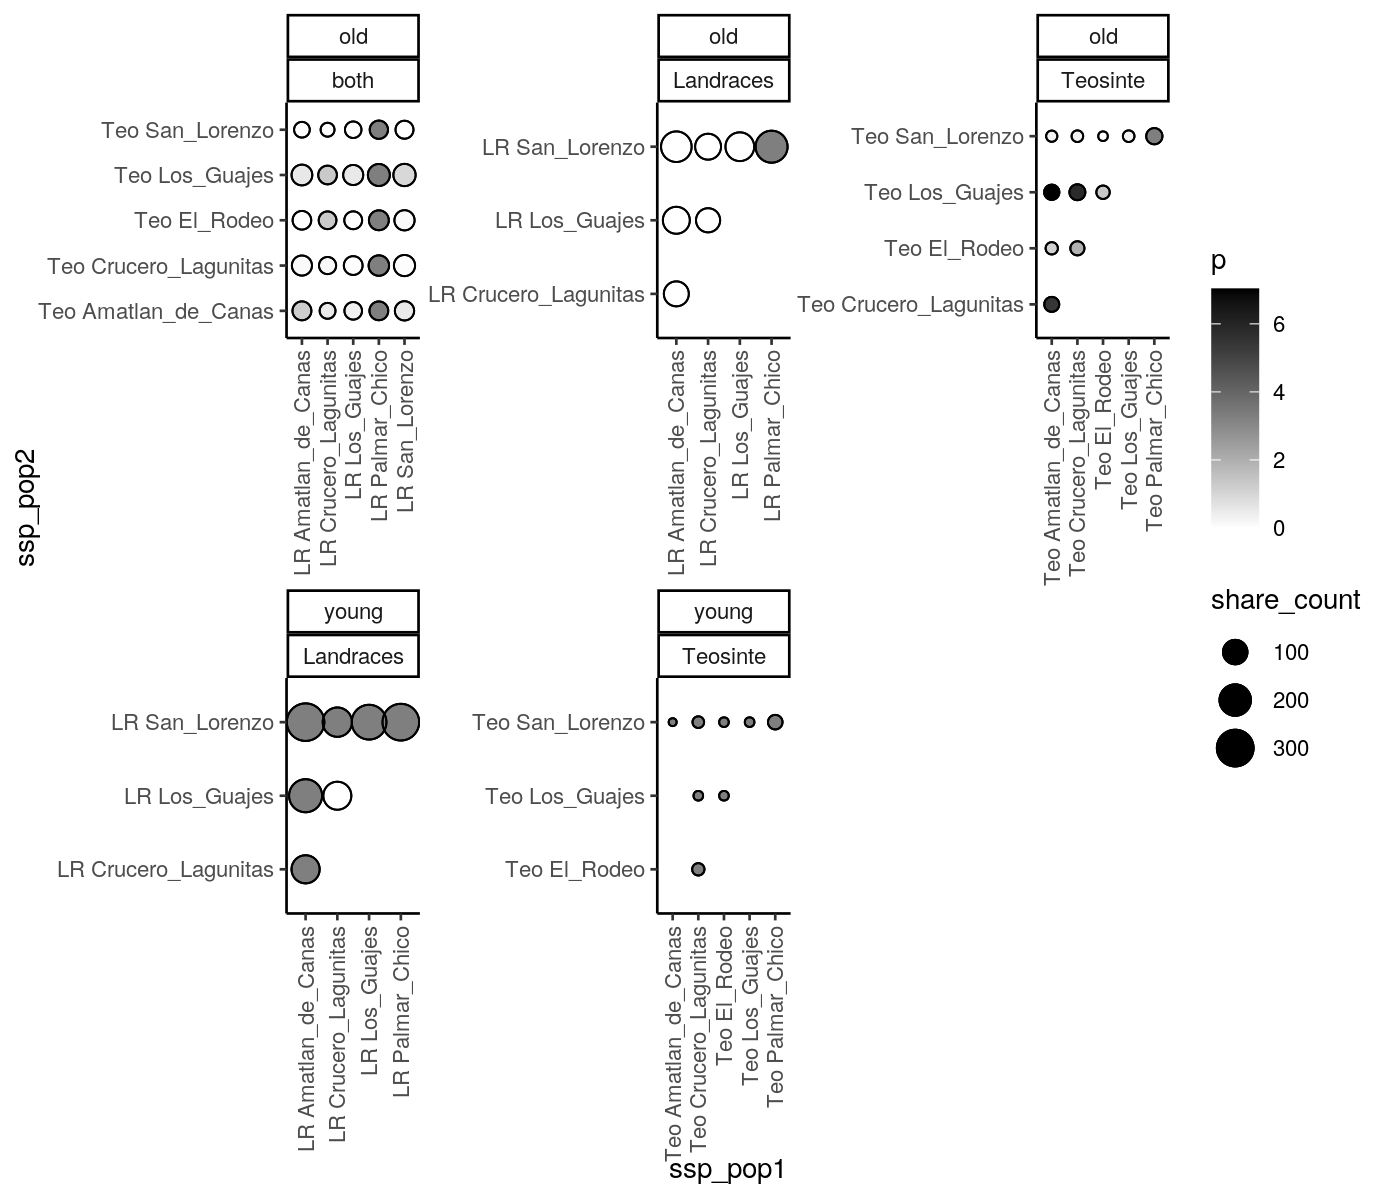

Warning message:
“Removed 21 rows containing missing values (geom_point).”


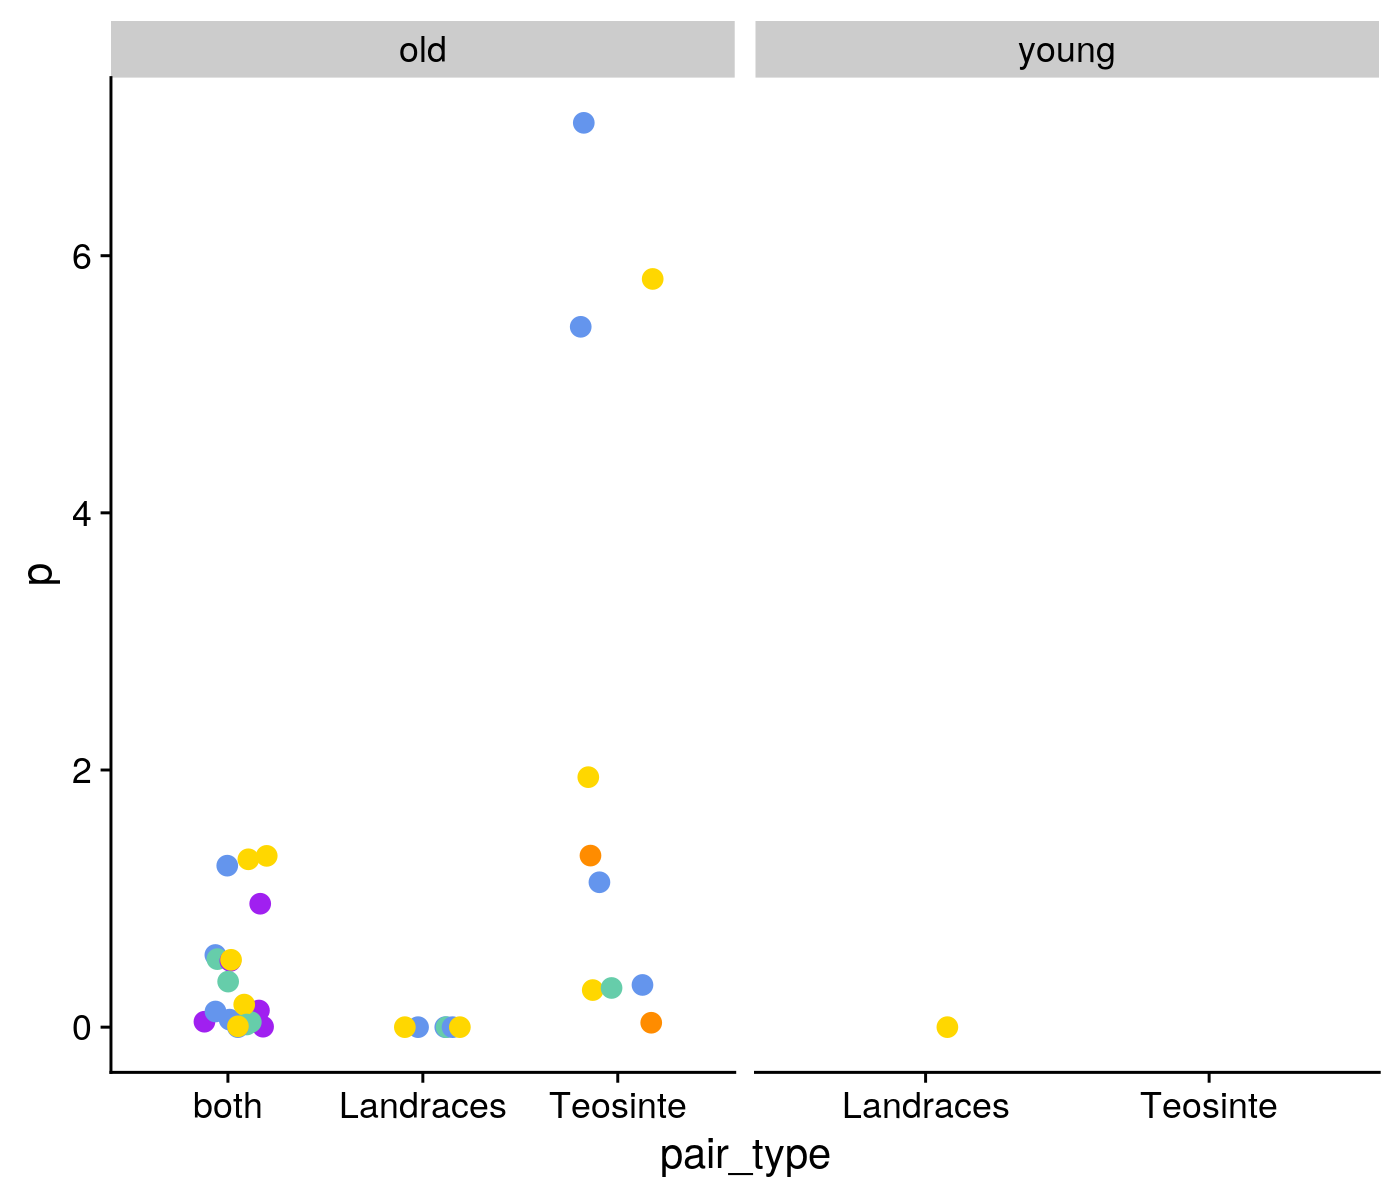

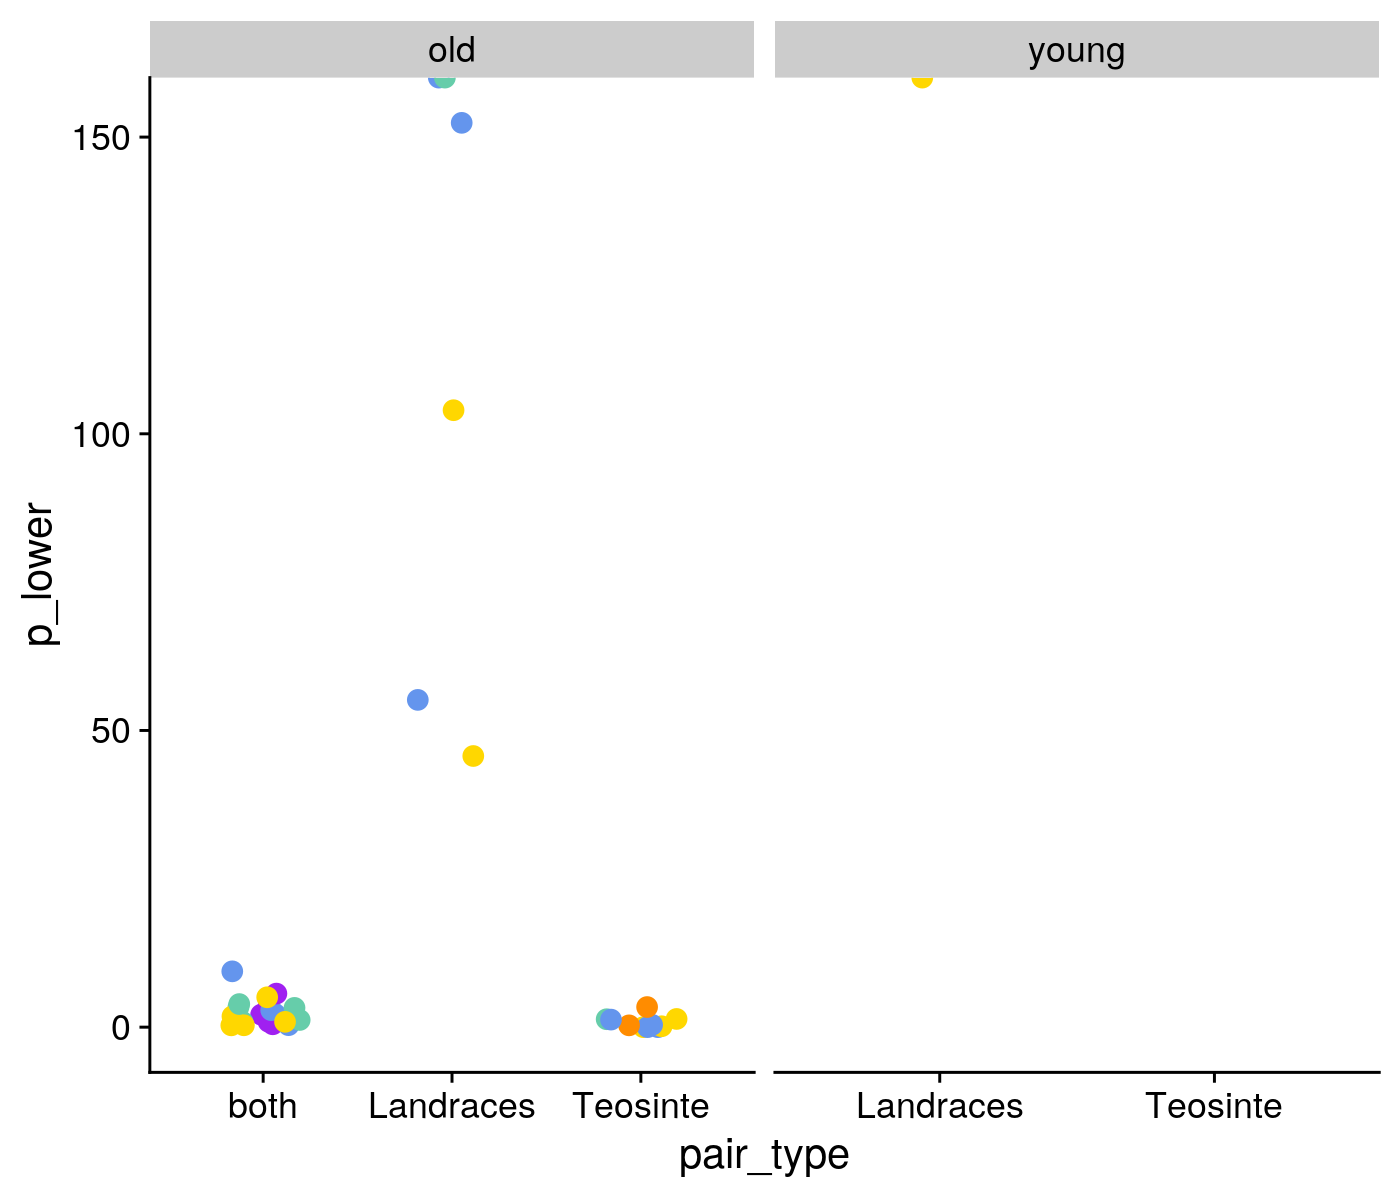

In [186]:
plot_pair_df <- 
pair_test_df %>% 
    filter(pop1 != "RANDOM2_Palmar_Chico", pop2 != "RANDOM2_Palmar_Chico") %>% 
    mutate(pop1 = str_replace_all(pop1, "random", "rangewide"),
           pop2 = str_replace_all(pop2, "random", "rangewide"),
           ssp_pop1 = paste0(ssp1 ," ", pop1),
           ssp_pop2 = paste0(ssp2 ," ", pop2))  %>%  
    ungroup() %>% 
    mutate(pop1_idx = as.numeric(as.factor(pop1))) %>%
    mutate(pop2_idx = as.numeric(as.factor(pop2)))


plot_pair_df %>% 
    ggplot(aes(ssp_pop1, ssp_pop2, color = p, size = share_count)) +
    geom_point() +
    geom_point(aes(ssp_pop1, ssp_pop2, size = share_count), shape = 1, inherit.aes = F) +
    geom_point(aes(ssp_pop1, ssp_pop2, size = share_count), shape = 1, inherit.aes = F) +
    facet_wrap(~age+pair_type, scales = "free") +
    scale_colour_gradient(low = "white", high = "black") +
    theme_classic(base_size = 10) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 



p_top5 <- pair_test_df %>% 
    filter(pop1 != "RANDOM2_Palmar_Chico", pop2 != "RANDOM2_Palmar_Chico") %>% 
    filter(p > 5)
    #group_by(type) %>% 
    #arrange(p_lower) %>% 
    #slice(1:6) %>% 
    #filter(type !="Teosinte")

p_low_top5 <- pair_test_df %>% 
    filter(pop1 != "RANDOM2_Palmar_Chico", pop2 != "RANDOM2_Palmar_Chico") %>% 
    filter(p_lower > 5)
    #group_by(type) %>% 
    #arrange(desc(p_lower)) %>% 
    #slice(1:6) 


pair_test_df %>% 
    filter(pop1 != "RANDOM2_Palmar_Chico", pop2 != "RANDOM2_Palmar_Chico") %>% 
    ggplot(aes(pair_type, p)) +
    #geom_jitter(aes(colour = color_pop1, bg = color_pop2), stroke = 2, shape = 21, width = 0.2, height = 0, size = 3) +
    geom_jitter(aes(colour = color_pop1), width = 0.2, height = 0, size = 3) +
    facet_wrap(~age, scales = "free_x") +
    scale_color_identity()


pair_test_df %>% 
    filter(pop1 != "RANDOM2_Palmar_Chico", pop2 != "RANDOM2_Palmar_Chico") %>% 
    ggplot(aes(pair_type, p_lower)) +
    #geom_jitter(aes(colour = pop1, bg = pop2), stroke = 2, shape = 21, width = 0.2, height = 0, size = 3) +
    geom_jitter(aes(colour = color_pop1), width = 0.2, height = 0, size = 3) +    
    facet_wrap(~age, scales = "free_x") +
    scale_color_identity()

